# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 23:45:41.437738: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T23:45:44.846895
2025-04-14 23:45:44.846895


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 23:45:39"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

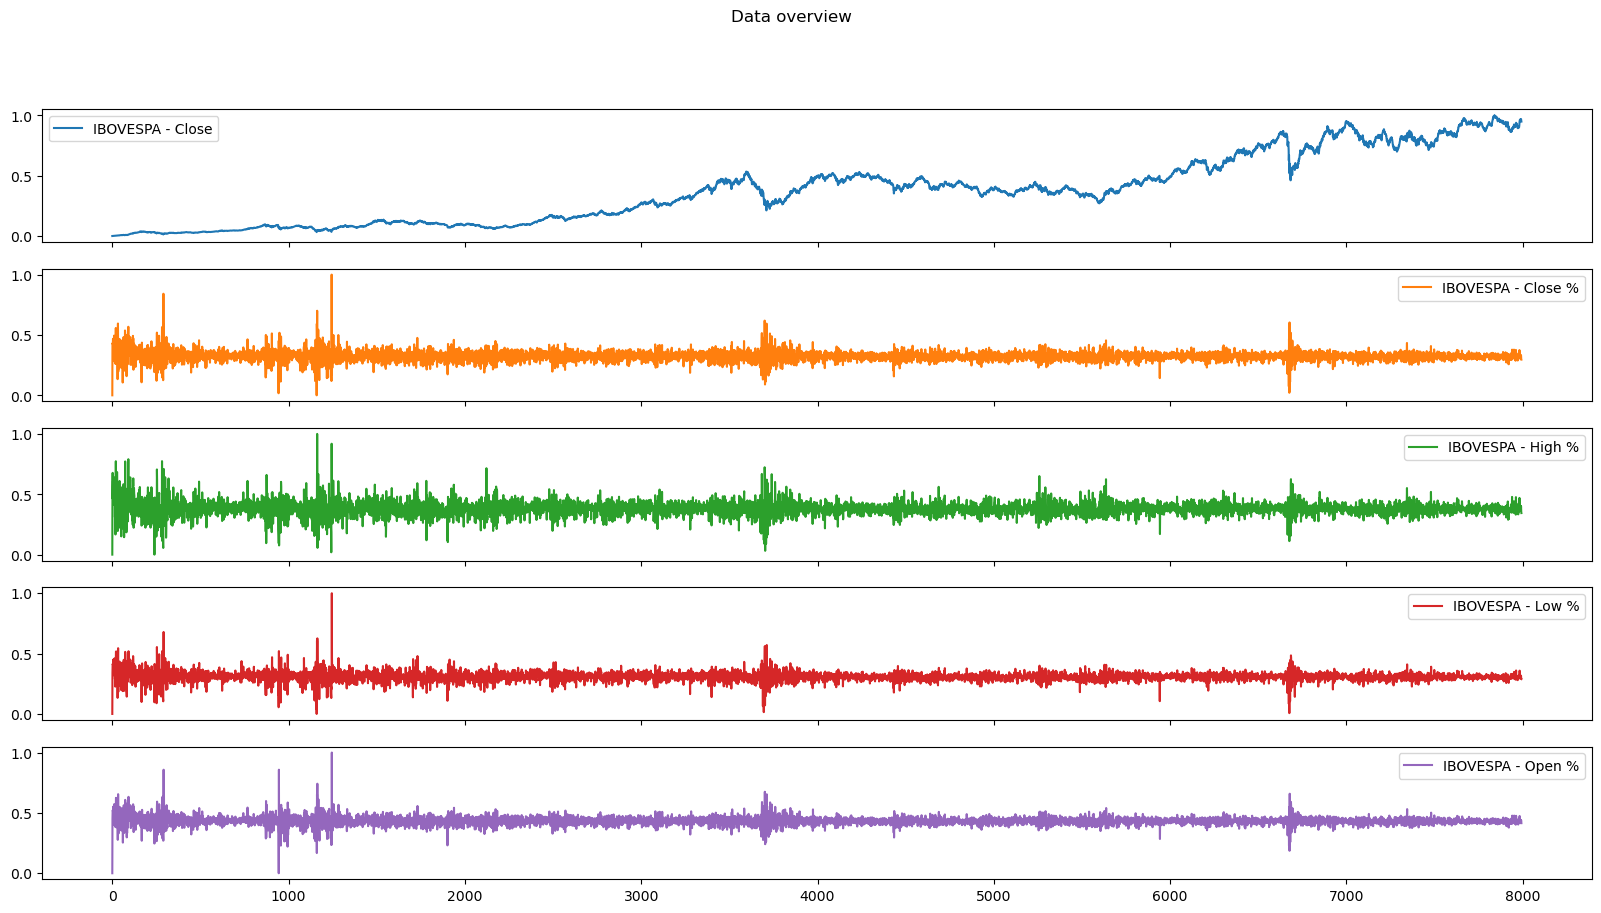

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

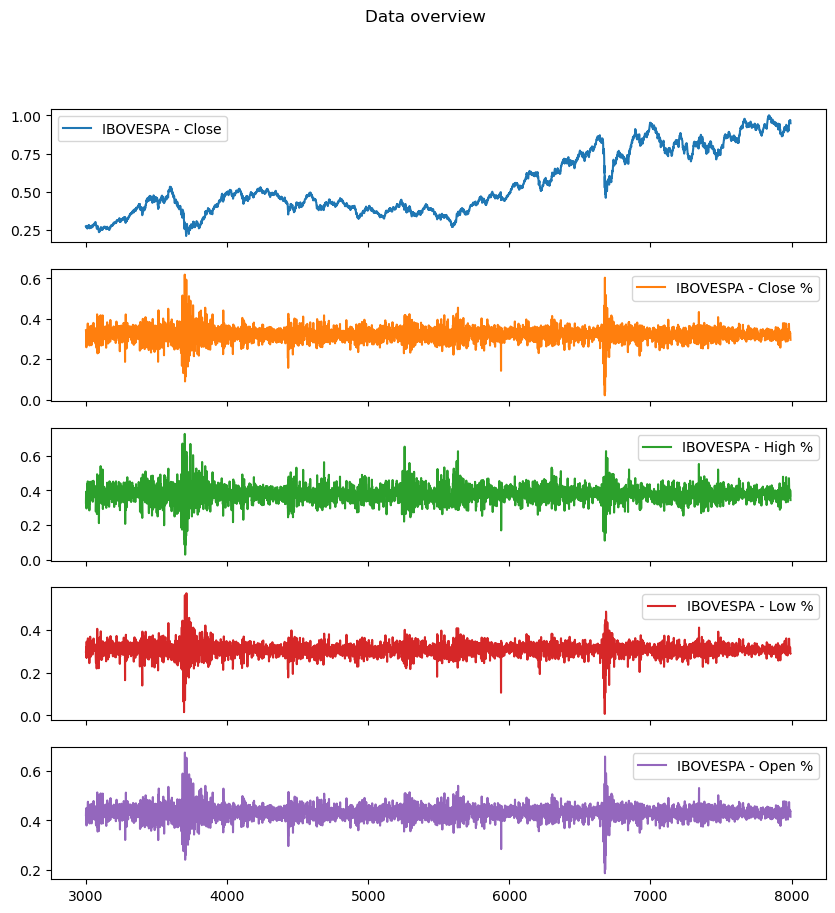

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

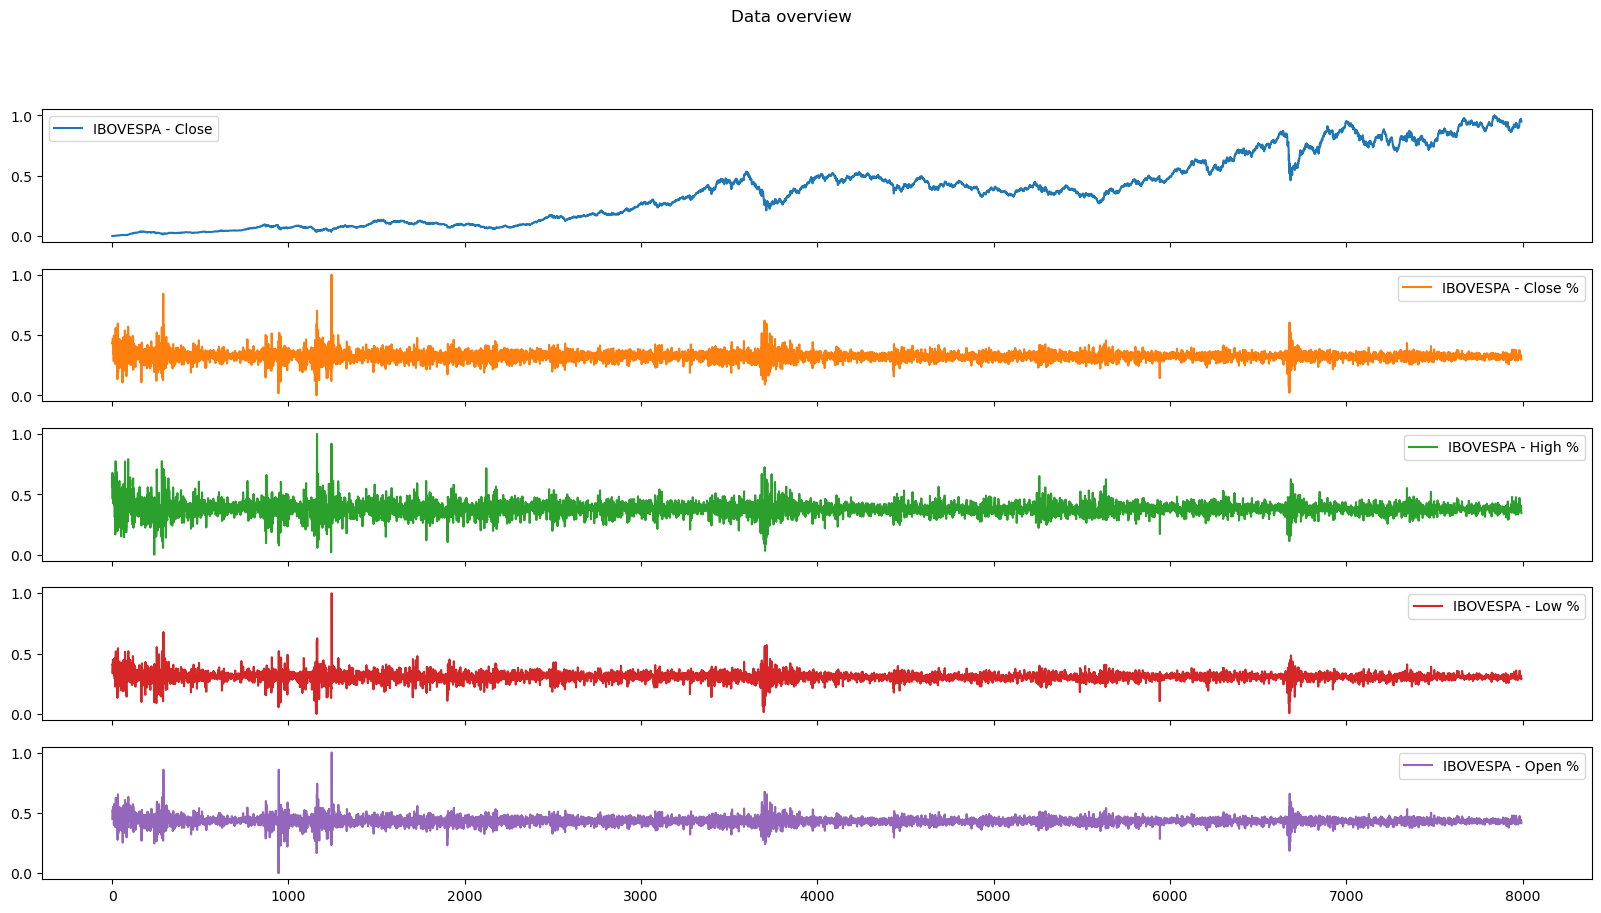

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

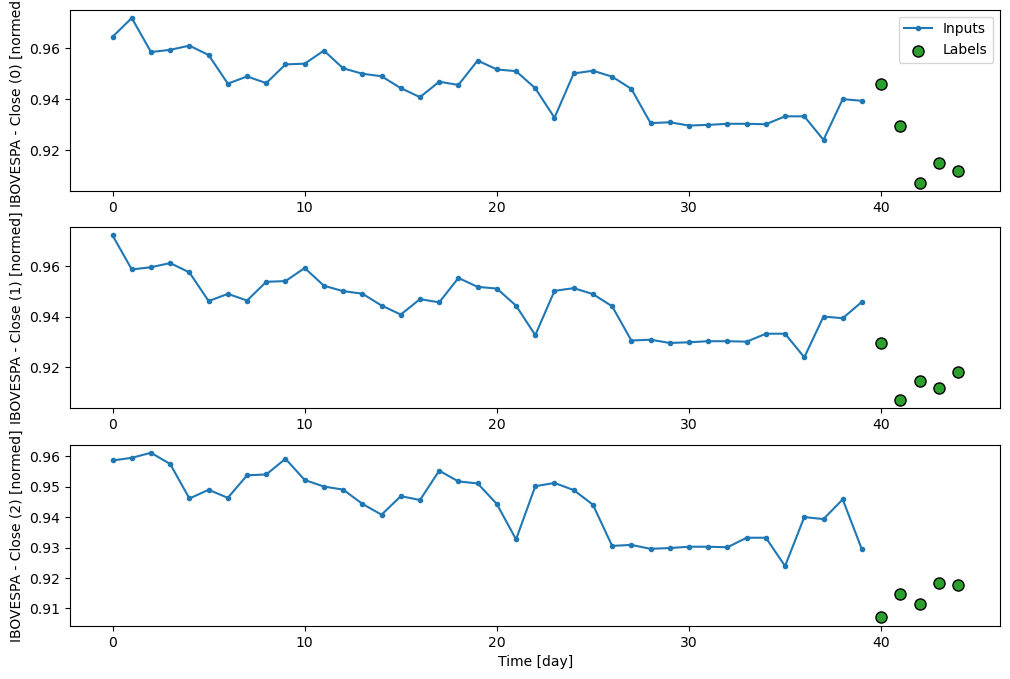

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

5

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21:06 5s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 123.4645 - mean_squared_error: 1.9619e-04 - root_mean_squared_error: 0.0134 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 112.8757 - mean_squared_error: 2.2402e-04 - root_mean_squared_error: 0.0146

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 105.2216 - mean_squared_error: 2.4981e-04 - root_mean_squared_error: 0.0155

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 99.3701 - mean_squared_error: 2.5712e-04 - root_mean_squared_error: 0.0158 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 93.8439 - mean_squared_error: 2.5387e-04 - root_mean_squared_error: 0.0157

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 88.7722 - mean_squared_error: 2.4680e-04 - root_mean_squared_error: 0.0155

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 84.5321 - mean_squared_error: 2.3970e-04 - root_mean_squared_error: 0.0153

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 80.6383 - mean_squared_error: 2.3177e-04 - root_mean_squared_error: 0.0150

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 77.1018 - mean_squared_error: 2.2384e-04 - root_mean_squared_error: 0.0148

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 73.9193 - mean_squared_error: 2.1634e-04 - root_mean_squared_error: 0.0145

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 71.0451 - mean_squared_error: 2.0956e-04 - root_mean_squared_error: 0.0143

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 68.5592 - mean_squared_error: 2.0567e-04 - root_mean_squared_error: 0.0141

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 66.3875 - mean_squared_error: 2.0543e-04 - root_mean_squared_error: 0.0142

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 64.4201 - mean_squared_error: 2.0594e-04 - root_mean_squared_error: 0.0142

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 62.6869 - mean_squared_error: 2.0798e-04 - root_mean_squared_error: 0.0143

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 61.0685 - mean_squared_error: 2.0929e-04 - root_mean_squared_error: 0.0143

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 59.5657 - mean_squared_error: 2.1020e-04 - root_mean_squared_error: 0.0144

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 58.2605 - mean_squared_error: 2.1197e-04 - root_mean_squared_error: 0.0144

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 57.0574 - mean_squared_error: 2.1347e-04 - root_mean_squared_error: 0.0145

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 55.9834 - mean_squared_error: 2.1674e-04 - root_mean_squared_error: 0.0146

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.9978 - mean_squared_error: 2.2044e-04 - root_mean_squared_error: 0.0147

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.0641 - mean_squared_error: 2.2377e-04 - root_mean_squared_error: 0.0148

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 53.1807 - mean_squared_error: 2.2723e-04 - root_mean_squared_error: 0.0149

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.3462 - mean_squared_error: 2.3093e-04 - root_mean_squared_error: 0.0151

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 51.5416 - mean_squared_error: 2.3411e-04 - root_mean_squared_error: 0.0152

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 50.7639 - mean_squared_error: 2.3675e-04 - root_mean_squared_error: 0.0152

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 50.0118 - mean_squared_error: 2.3892e-04 - root_mean_squared_error: 0.0153

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 49.2879 - mean_squared_error: 2.4073e-04 - root_mean_squared_error: 0.0154

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 48.5974 - mean_squared_error: 2.4235e-04 - root_mean_squared_error: 0.0154

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 47.9355 - mean_squared_error: 2.4376e-04 - root_mean_squared_error: 0.0155

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 47.3026 - mean_squared_error: 2.4504e-04 - root_mean_squared_error: 0.0155

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 46.6930 - mean_squared_error: 2.4610e-04 - root_mean_squared_error: 0.0156

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 46.1244 - mean_squared_error: 2.4729e-04 - root_mean_squared_error: 0.0156

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 45.5833 - mean_squared_error: 2.4842e-04 - root_mean_squared_error: 0.0156

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 45.0573 - mean_squared_error: 2.4931e-04 - root_mean_squared_error: 0.0157

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 44.5585 - mean_squared_error: 2.5038e-04 - root_mean_squared_error: 0.0157

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 44.0920 - mean_squared_error: 2.5240e-04 - root_mean_squared_error: 0.0158

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 43.6612 - mean_squared_error: 2.5704e-04 - root_mean_squared_error: 0.0159

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 43.2592 - mean_squared_error: 2.6366e-04 - root_mean_squared_error: 0.0161

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 42.8708 - mean_squared_error: 2.7017e-04 - root_mean_squared_error: 0.0162

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 42.4933 - mean_squared_error: 2.7644e-04 - root_mean_squared_error: 0.0164

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 42.1248 - mean_squared_error: 2.8240e-04 - root_mean_squared_error: 0.0166

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 41.7675 - mean_squared_error: 2.8839e-04 - root_mean_squared_error: 0.0167

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 41.4149 - mean_squared_error: 2.9389e-04 - root_mean_squared_error: 0.0169

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 41.0672 - mean_squared_error: 2.9894e-04 - root_mean_squared_error: 0.0170

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 40.7239 - mean_squared_error: 3.0357e-04 - root_mean_squared_error: 0.0171

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 40.3883 - mean_squared_error: 3.0821e-04 - root_mean_squared_error: 0.0172

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 40.0595 - mean_squared_error: 3.1267e-04 - root_mean_squared_error: 0.0173

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 39.7384 - mean_squared_error: 3.1721e-04 - root_mean_squared_error: 0.0175

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 39.4286 - mean_squared_error: 3.2303e-04 - root_mean_squared_error: 0.0176

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 39.1283 - mean_squared_error: 3.2970e-04 - root_mean_squared_error: 0.0178

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 38.8350 - mean_squared_error: 3.3676e-04 - root_mean_squared_error: 0.0179

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 38.5475 - mean_squared_error: 3.4397e-04 - root_mean_squared_error: 0.0181

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 38.2639 - mean_squared_error: 3.5085e-04 - root_mean_squared_error: 0.0183

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 37.9851 - mean_squared_error: 3.5767e-04 - root_mean_squared_error: 0.0184

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 37.7124 - mean_squared_error: 3.6505e-04 - root_mean_squared_error: 0.0186

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 37.4527 - mean_squared_error: 3.7650e-04 - root_mean_squared_error: 0.0188

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 37.2132 - mean_squared_error: 3.9554e-04 - root_mean_squared_error: 0.0192

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 36.9830 - mean_squared_error: 4.1573e-04 - root_mean_squared_error: 0.0195

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 36.7580 - mean_squared_error: 4.3585e-04 - root_mean_squared_error: 0.0199

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 36.5421 - mean_squared_error: 4.5952e-04 - root_mean_squared_error: 0.0202

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 36.3374 - mean_squared_error: 4.9166e-04 - root_mean_squared_error: 0.0207

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 36.1430 - mean_squared_error: 5.3171e-04 - root_mean_squared_error: 0.0212

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 35.9566 - mean_squared_error: 5.7551e-04 - root_mean_squared_error: 0.0218

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 35.7767 - mean_squared_error: 6.2153e-04 - root_mean_squared_error: 0.0224

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 35.6013 - mean_squared_error: 6.6792e-04 - root_mean_squared_error: 0.0230

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 35.5143 - mean_squared_error: 6.9044e-04 - root_mean_squared_error: 0.0233

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 35.3423 - mean_squared_error: 7.3453e-04 - root_mean_squared_error: 0.0238

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 35.1738 - mean_squared_error: 7.7774e-04 - root_mean_squared_error: 0.0243

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 35.0082 - mean_squared_error: 8.1978e-04 - root_mean_squared_error: 0.0249

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 34.8439 - mean_squared_error: 8.6023e-04 - root_mean_squared_error: 0.0254

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 34.6824 - mean_squared_error: 8.9981e-04 - root_mean_squared_error: 0.0259

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 34.5216 - mean_squared_error: 9.3771e-04 - root_mean_squared_error: 0.0263

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 34.3619 - mean_squared_error: 9.7403e-04 - root_mean_squared_error: 0.0268

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 34.2030 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0272    

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 34.0460 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0277

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 33.8932 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0281

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 33.7430 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0285

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 33.5947 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 33.4481 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 33.3033 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0297

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 33.1612 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0300

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 33.0206 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0304

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 32.8810 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0307

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 32.7427 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0310

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 32.6063 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 32.4731 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0317

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 32.3425 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0320

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 32.2127 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 32.0849 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 31.9595 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 31.8369 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0332

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 31.7165 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 31.5984 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 31.4827 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 31.3694 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0343

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 31.2574 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0346

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 31.1461 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 31.0352 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 30.9249 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0354

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 30.8153 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0357

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 30.7060 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0359

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 30.5973 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 30.4904 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 30.3880 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0367

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 30.2869 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0370

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 30.1866 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 30.0882 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 29.9918 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0379

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 29.8974 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 29.8036 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 29.7102 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0389

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 29.6174 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0392

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 29.5259 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 29.4349 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0399

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 29.3442 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0402

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 29.2540 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0404

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 29.1650 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0407

237/237 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 29.0774 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0410 - val_loss: 0.2027 - val_mean_absolute_error: 0.2027 - val_mean_absolute_percentage_error: 21.6058 - val_mean_squared_error: 0.0419 - val_root_mean_squared_error: 0.2046 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.7213 - mean_absolute_error: 0.7213 - mean_absolute_percentage_error: 9578.7949 - mean_squared_error: 0.5203 - root_mean_squared_error: 0.7213

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7176 - mean_absolute_error: 0.7176 - mean_absolute_percentage_error: 7972.6641 - mean_squared_error: 0.5150 - root_mean_squared_error: 0.7176 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7108 - mean_absolute_error: 0.7108 - mean_absolute_percentage_error: 6759.8408 - mean_squared_error: 0.5055 - root_mean_squared_error: 0.7109

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7036 - mean_absolute_error: 0.7036 - mean_absolute_percentage_error: 5987.6338 - mean_squared_error: 0.4956 - root_mean_squared_error: 0.7038

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6961 - mean_absolute_error: 0.6961 - mean_absolute_percentage_error: 5496.7944 - mean_squared_error: 0.4855 - root_mean_squared_error: 0.6966

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6880 - mean_absolute_error: 0.6880 - mean_absolute_percentage_error: 5134.8276 - mean_squared_error: 0.4749 - root_mean_squared_error: 0.6887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6791 - mean_absolute_error: 0.6791 - mean_absolute_percentage_error: 4842.6211 - mean_squared_error: 0.4637 - root_mean_squared_error: 0.6803

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6694 - mean_absolute_error: 0.6694 - mean_absolute_percentage_error: 4597.5991 - mean_squared_error: 0.4519 - root_mean_squared_error: 0.6713

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6595 - mean_absolute_error: 0.6595 - mean_absolute_percentage_error: 4385.3618 - mean_squared_error: 0.4404 - root_mean_squared_error: 0.6624

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6486 - mean_absolute_error: 0.6486 - mean_absolute_percentage_error: 4195.4204 - mean_squared_error: 0.4295 - root_mean_squared_error: 0.6537

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6371 - mean_absolute_error: 0.6371 - mean_absolute_percentage_error: 4023.2729 - mean_squared_error: 0.4186 - root_mean_squared_error: 0.6449

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.6257 - mean_absolute_error: 0.6257 - mean_absolute_percentage_error: 3866.9829 - mean_squared_error: 0.4077 - root_mean_squared_error: 0.6359

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6142 - mean_absolute_error: 0.6142 - mean_absolute_percentage_error: 3723.4131 - mean_squared_error: 0.3970 - root_mean_squared_error: 0.6269

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.6023 - mean_absolute_error: 0.6023 - mean_absolute_percentage_error: 3590.1677 - mean_squared_error: 0.3864 - root_mean_squared_error: 0.6178

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5902 - mean_absolute_error: 0.5902 - mean_absolute_percentage_error: 3466.5762 - mean_squared_error: 0.3761 - root_mean_squared_error: 0.6088

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5783 - mean_absolute_error: 0.5783 - mean_absolute_percentage_error: 3351.8882 - mean_squared_error: 0.3662 - root_mean_squared_error: 0.5999

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5665 - mean_absolute_error: 0.5665 - mean_absolute_percentage_error: 3244.9810 - mean_squared_error: 0.3566 - root_mean_squared_error: 0.5912

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5551 - mean_absolute_error: 0.5551 - mean_absolute_percentage_error: 3145.5288 - mean_squared_error: 0.3475 - root_mean_squared_error: 0.5828

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5441 - mean_absolute_error: 0.5441 - mean_absolute_percentage_error: 3053.0911 - mean_squared_error: 0.3388 - root_mean_squared_error: 0.5746

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5336 - mean_absolute_error: 0.5336 - mean_absolute_percentage_error: 2966.6846 - mean_squared_error: 0.3305 - root_mean_squared_error: 0.5668

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5233 - mean_absolute_error: 0.5233 - mean_absolute_percentage_error: 2885.5381 - mean_squared_error: 0.3226 - root_mean_squared_error: 0.5592

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5135 - mean_absolute_error: 0.5135 - mean_absolute_percentage_error: 2809.2615 - mean_squared_error: 0.3151 - root_mean_squared_error: 0.5518

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.5039 - mean_absolute_error: 0.5039 - mean_absolute_percentage_error: 2737.3672 - mean_squared_error: 0.3080 - root_mean_squared_error: 0.5447

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4947 - mean_absolute_error: 0.4947 - mean_absolute_percentage_error: 2669.4368 - mean_squared_error: 0.3011 - root_mean_squared_error: 0.5379

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4858 - mean_absolute_error: 0.4858 - mean_absolute_percentage_error: 2605.2021 - mean_squared_error: 0.2946 - root_mean_squared_error: 0.5313

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4773 - mean_absolute_error: 0.4773 - mean_absolute_percentage_error: 2544.3752 - mean_squared_error: 0.2884 - root_mean_squared_error: 0.5249

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4691 - mean_absolute_error: 0.4691 - mean_absolute_percentage_error: 2486.6951 - mean_squared_error: 0.2824 - root_mean_squared_error: 0.5187

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4611 - mean_absolute_error: 0.4611 - mean_absolute_percentage_error: 2431.8752 - mean_squared_error: 0.2767 - root_mean_squared_error: 0.5128

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4535 - mean_absolute_error: 0.4535 - mean_absolute_percentage_error: 2379.7104 - mean_squared_error: 0.2713 - root_mean_squared_error: 0.5070

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4461 - mean_absolute_error: 0.4461 - mean_absolute_percentage_error: 2330.0200 - mean_squared_error: 0.2661 - root_mean_squared_error: 0.5015

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4389 - mean_absolute_error: 0.4389 - mean_absolute_percentage_error: 2282.6106 - mean_squared_error: 0.2611 - root_mean_squared_error: 0.4961

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.4320 - mean_absolute_error: 0.4320 - mean_absolute_percentage_error: 2237.3264 - mean_squared_error: 0.2563 - root_mean_squared_error: 0.4908

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4254 - mean_absolute_error: 0.4254 - mean_absolute_percentage_error: 2194.0488 - mean_squared_error: 0.2517 - root_mean_squared_error: 0.4858

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4189 - mean_absolute_error: 0.4189 - mean_absolute_percentage_error: 2152.6550 - mean_squared_error: 0.2472 - root_mean_squared_error: 0.4809

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4127 - mean_absolute_error: 0.4127 - mean_absolute_percentage_error: 2112.9980 - mean_squared_error: 0.2430 - root_mean_squared_error: 0.4761

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4067 - mean_absolute_error: 0.4067 - mean_absolute_percentage_error: 2074.9836 - mean_squared_error: 0.2389 - root_mean_squared_error: 0.4715

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4009 - mean_absolute_error: 0.4009 - mean_absolute_percentage_error: 2038.5154 - mean_squared_error: 0.2350 - root_mean_squared_error: 0.4670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3953 - mean_absolute_error: 0.3953 - mean_absolute_percentage_error: 2003.4888 - mean_squared_error: 0.2312 - root_mean_squared_error: 0.4627

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3899 - mean_absolute_error: 0.3899 - mean_absolute_percentage_error: 1969.8091 - mean_squared_error: 0.2275 - root_mean_squared_error: 0.4585

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3847 - mean_absolute_error: 0.3847 - mean_absolute_percentage_error: 1937.3870 - mean_squared_error: 0.2240 - root_mean_squared_error: 0.4544

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3796 - mean_absolute_error: 0.3796 - mean_absolute_percentage_error: 1906.1592 - mean_squared_error: 0.2205 - root_mean_squared_error: 0.4504

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3747 - mean_absolute_error: 0.3747 - mean_absolute_percentage_error: 1876.0573 - mean_squared_error: 0.2172 - root_mean_squared_error: 0.4465

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3700 - mean_absolute_error: 0.3700 - mean_absolute_percentage_error: 1847.0137 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4427

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3653 - mean_absolute_error: 0.3653 - mean_absolute_percentage_error: 1818.9673 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4390

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3608 - mean_absolute_error: 0.3608 - mean_absolute_percentage_error: 1791.8647 - mean_squared_error: 0.2080 - root_mean_squared_error: 0.4354

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3565 - mean_absolute_error: 0.3565 - mean_absolute_percentage_error: 1765.6633 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4319

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3522 - mean_absolute_error: 0.3522 - mean_absolute_percentage_error: 1740.3223 - mean_squared_error: 0.2023 - root_mean_squared_error: 0.4285

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.3482 - mean_absolute_error: 0.3482 - mean_absolute_percentage_error: 1715.8000 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4252

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3442 - mean_absolute_error: 0.3442 - mean_absolute_percentage_error: 1692.0518 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4220

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3404 - mean_absolute_error: 0.3404 - mean_absolute_percentage_error: 1669.0371 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4188

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3366 - mean_absolute_error: 0.3366 - mean_absolute_percentage_error: 1646.7222 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.4157

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3330 - mean_absolute_error: 0.3330 - mean_absolute_percentage_error: 1625.0732 - mean_squared_error: 0.1895 - root_mean_squared_error: 0.4127

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3295 - mean_absolute_error: 0.3295 - mean_absolute_percentage_error: 1604.0616 - mean_squared_error: 0.1871 - root_mean_squared_error: 0.4097

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3261 - mean_absolute_error: 0.3261 - mean_absolute_percentage_error: 1583.6583 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.4069

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3227 - mean_absolute_error: 0.3227 - mean_absolute_percentage_error: 1563.8362 - mean_squared_error: 0.1827 - root_mean_squared_error: 0.4041

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3195 - mean_absolute_error: 0.3195 - mean_absolute_percentage_error: 1544.5680 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.4013

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3164 - mean_absolute_error: 0.3164 - mean_absolute_percentage_error: 1525.8297 - mean_squared_error: 0.1784 - root_mean_squared_error: 0.3986

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3133 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 1507.6058 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3960

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3104 - mean_absolute_error: 0.3104 - mean_absolute_percentage_error: 1489.8881 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3934

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3076 - mean_absolute_error: 0.3076 - mean_absolute_percentage_error: 1472.6504 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3910

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3049 - mean_absolute_error: 0.3049 - mean_absolute_percentage_error: 1455.8636 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3886

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3022 - mean_absolute_error: 0.3022 - mean_absolute_percentage_error: 1439.5043 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3862

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2996 - mean_absolute_error: 0.2996 - mean_absolute_percentage_error: 1423.5552 - mean_squared_error: 0.1670 - root_mean_squared_error: 0.3839

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1408.0010 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3816

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.2946 - mean_absolute_error: 0.2946 - mean_absolute_percentage_error: 1392.8258 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3793

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2922 - mean_absolute_error: 0.2922 - mean_absolute_percentage_error: 1378.0155 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3772

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2898 - mean_absolute_error: 0.2898 - mean_absolute_percentage_error: 1363.5571 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3750

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2875 - mean_absolute_error: 0.2875 - mean_absolute_percentage_error: 1349.4363 - mean_squared_error: 0.1588 - root_mean_squared_error: 0.3729

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2852 - mean_absolute_error: 0.2852 - mean_absolute_percentage_error: 1335.6414 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3708

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2830 - mean_absolute_error: 0.2830 - mean_absolute_percentage_error: 1322.1639 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3688

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1308.9926 - mean_squared_error: 0.1543 - root_mean_squared_error: 0.3668

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2787 - mean_absolute_error: 0.2787 - mean_absolute_percentage_error: 1296.1138 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3648

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 1283.5189 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3629

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2745 - mean_absolute_error: 0.2745 - mean_absolute_percentage_error: 1271.1981 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3610

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 1259.1410 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1247.3384 - mean_squared_error: 0.1473 - root_mean_squared_error: 0.3573

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1235.7828 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3554

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1224.4668 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3537

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - mean_absolute_percentage_error: 1213.3811 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3519

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2639 - mean_absolute_error: 0.2639 - mean_absolute_percentage_error: 1207.9226 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3510

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 1197.1697 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3493

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2603 - mean_absolute_error: 0.2603 - mean_absolute_percentage_error: 1186.6307 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3477

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2586 - mean_absolute_error: 0.2586 - mean_absolute_percentage_error: 1176.2999 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3460

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1166.1697 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3444

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2551 - mean_absolute_error: 0.2551 - mean_absolute_percentage_error: 1156.2340 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3428

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 1146.4874 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3412

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1136.9238 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3396

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2502 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 1127.5388 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3381

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1118.3274 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3366

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2471 - mean_absolute_error: 0.2471 - mean_absolute_percentage_error: 1109.2833 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3351

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2456 - mean_absolute_error: 0.2456 - mean_absolute_percentage_error: 1100.4032 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3336

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 1091.6827 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3321

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2426 - mean_absolute_error: 0.2426 - mean_absolute_percentage_error: 1083.1180 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3307

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1074.7043 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3293

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 1066.4381 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3279

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2383 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 1058.3154 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3265

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2370 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 1050.3333 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3252

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2357 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 1042.4871 - mean_squared_error: 0.1242 - root_mean_squared_error: 0.3239

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2344 - mean_absolute_error: 0.2344 - mean_absolute_percentage_error: 1034.7727 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3226

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1027.1874 - mean_squared_error: 0.1224 - root_mean_squared_error: 0.3213

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1019.7280 - mean_squared_error: 0.1216 - root_mean_squared_error: 0.3201

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1012.3914 - mean_squared_error: 0.1208 - root_mean_squared_error: 0.3189

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1005.1743 - mean_squared_error: 0.1200 - root_mean_squared_error: 0.3177

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2285 - mean_absolute_error: 0.2285 - mean_absolute_percentage_error: 998.0741 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3165 

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 991.0875 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.3154

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 984.2100 - mean_squared_error: 0.1177 - root_mean_squared_error: 0.3142

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 977.4396 - mean_squared_error: 0.1169 - root_mean_squared_error: 0.3131

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 970.7737 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3120

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 964.2106 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3109

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2222 - mean_absolute_error: 0.2222 - mean_absolute_percentage_error: 957.7477 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3099

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 951.3825 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.3088

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 945.1117 - mean_squared_error: 0.1134 - root_mean_squared_error: 0.3078

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2194 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 938.9329 - mean_squared_error: 0.1127 - root_mean_squared_error: 0.3068

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 932.8439 - mean_squared_error: 0.1120 - root_mean_squared_error: 0.3058

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 926.8430 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.3048

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2166 - mean_absolute_error: 0.2166 - mean_absolute_percentage_error: 920.9279 - mean_squared_error: 0.1107 - root_mean_squared_error: 0.3038

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 915.0968 - mean_squared_error: 0.1101 - root_mean_squared_error: 0.3028

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2148 - mean_absolute_error: 0.2148 - mean_absolute_percentage_error: 909.3482 - mean_squared_error: 0.1094 - root_mean_squared_error: 0.3019

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 903.6799 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.3009

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 898.1011 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.3000 - val_loss: 0.1130 - val_mean_absolute_error: 0.1130 - val_mean_absolute_percentage_error: 12.0048 - val_mean_squared_error: 0.0136 - val_root_mean_squared_error: 0.1165 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.8110 - mean_absolute_error: 0.8110 - mean_absolute_percentage_error: 10769.1621 - mean_squared_error: 0.6577 - root_mean_squared_error: 0.8110

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.8074 - mean_absolute_error: 0.8074 - mean_absolute_percentage_error: 8965.9375 - mean_squared_error: 0.6519 - root_mean_squared_error: 0.8074  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8019 - mean_absolute_error: 0.8019 - mean_absolute_percentage_error: 7609.1284 - mean_squared_error: 0.6432 - root_mean_squared_error: 0.8020

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7970 - mean_absolute_error: 0.7970 - mean_absolute_percentage_error: 6751.5698 - mean_squared_error: 0.6355 - root_mean_squared_error: 0.7971

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7927 - mean_absolute_error: 0.7927 - mean_absolute_percentage_error: 6217.4380 - mean_squared_error: 0.6288 - root_mean_squared_error: 0.7929

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7885 - mean_absolute_error: 0.7885 - mean_absolute_percentage_error: 5830.8501 - mean_squared_error: 0.6222 - root_mean_squared_error: 0.7887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7840 - mean_absolute_error: 0.7840 - mean_absolute_percentage_error: 5523.4409 - mean_squared_error: 0.6153 - root_mean_squared_error: 0.7842

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7793 - mean_absolute_error: 0.7793 - mean_absolute_percentage_error: 5270.5020 - mean_squared_error: 0.6083 - root_mean_squared_error: 0.7797

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7744 - mean_absolute_error: 0.7744 - mean_absolute_percentage_error: 5052.9780 - mean_squared_error: 0.6011 - root_mean_squared_error: 0.7750

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7694 - mean_absolute_error: 0.7694 - mean_absolute_percentage_error: 4860.6118 - mean_squared_error: 0.5937 - root_mean_squared_error: 0.7701

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7642 - mean_absolute_error: 0.7642 - mean_absolute_percentage_error: 4687.6919 - mean_squared_error: 0.5862 - root_mean_squared_error: 0.7651

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7589 - mean_absolute_error: 0.7589 - mean_absolute_percentage_error: 4530.4648 - mean_squared_error: 0.5787 - root_mean_squared_error: 0.7600

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7534 - mean_absolute_error: 0.7534 - mean_absolute_percentage_error: 4385.0952 - mean_squared_error: 0.5710 - root_mean_squared_error: 0.7548

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7477 - mean_absolute_error: 0.7477 - mean_absolute_percentage_error: 4249.5469 - mean_squared_error: 0.5632 - root_mean_squared_error: 0.7495

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7419 - mean_absolute_error: 0.7419 - mean_absolute_percentage_error: 4123.3271 - mean_squared_error: 0.5554 - root_mean_squared_error: 0.7441

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7360 - mean_absolute_error: 0.7360 - mean_absolute_percentage_error: 4006.1208 - mean_squared_error: 0.5477 - root_mean_squared_error: 0.7386

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7301 - mean_absolute_error: 0.7301 - mean_absolute_percentage_error: 3896.6836 - mean_squared_error: 0.5401 - root_mean_squared_error: 0.7332

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7243 - mean_absolute_error: 0.7243 - mean_absolute_percentage_error: 3794.7009 - mean_squared_error: 0.5325 - root_mean_squared_error: 0.7278

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7185 - mean_absolute_error: 0.7185 - mean_absolute_percentage_error: 3700.1294 - mean_squared_error: 0.5252 - root_mean_squared_error: 0.7225

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7127 - mean_absolute_error: 0.7127 - mean_absolute_percentage_error: 3611.8516 - mean_squared_error: 0.5180 - root_mean_squared_error: 0.7173

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7070 - mean_absolute_error: 0.7070 - mean_absolute_percentage_error: 3528.5977 - mean_squared_error: 0.5109 - root_mean_squared_error: 0.7121

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7013 - mean_absolute_error: 0.7013 - mean_absolute_percentage_error: 3449.9082 - mean_squared_error: 0.5039 - root_mean_squared_error: 0.7069

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6955 - mean_absolute_error: 0.6955 - mean_absolute_percentage_error: 3375.2976 - mean_squared_error: 0.4970 - root_mean_squared_error: 0.7017

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6897 - mean_absolute_error: 0.6897 - mean_absolute_percentage_error: 3304.2063 - mean_squared_error: 0.4902 - root_mean_squared_error: 0.6966

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6838 - mean_absolute_error: 0.6838 - mean_absolute_percentage_error: 3236.4146 - mean_squared_error: 0.4835 - root_mean_squared_error: 0.6915

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6779 - mean_absolute_error: 0.6779 - mean_absolute_percentage_error: 3171.6658 - mean_squared_error: 0.4769 - root_mean_squared_error: 0.6864

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6719 - mean_absolute_error: 0.6719 - mean_absolute_percentage_error: 3109.7737 - mean_squared_error: 0.4704 - root_mean_squared_error: 0.6813

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6658 - mean_absolute_error: 0.6658 - mean_absolute_percentage_error: 3050.4944 - mean_squared_error: 0.4640 - root_mean_squared_error: 0.6762

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6597 - mean_absolute_error: 0.6597 - mean_absolute_percentage_error: 2993.6372 - mean_squared_error: 0.4577 - root_mean_squared_error: 0.6712

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6534 - mean_absolute_error: 0.6534 - mean_absolute_percentage_error: 2939.0264 - mean_squared_error: 0.4514 - root_mean_squared_error: 0.6662

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6471 - mean_absolute_error: 0.6471 - mean_absolute_percentage_error: 2886.5664 - mean_squared_error: 0.4453 - root_mean_squared_error: 0.6612

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6408 - mean_absolute_error: 0.6408 - mean_absolute_percentage_error: 2836.1677 - mean_squared_error: 0.4393 - root_mean_squared_error: 0.6563

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6345 - mean_absolute_error: 0.6345 - mean_absolute_percentage_error: 2787.6948 - mean_squared_error: 0.4335 - root_mean_squared_error: 0.6515

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6283 - mean_absolute_error: 0.6283 - mean_absolute_percentage_error: 2741.0234 - mean_squared_error: 0.4278 - root_mean_squared_error: 0.6467

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6220 - mean_absolute_error: 0.6220 - mean_absolute_percentage_error: 2696.0464 - mean_squared_error: 0.4222 - root_mean_squared_error: 0.6420

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6158 - mean_absolute_error: 0.6158 - mean_absolute_percentage_error: 2652.6753 - mean_squared_error: 0.4167 - root_mean_squared_error: 0.6373

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6097 - mean_absolute_error: 0.6097 - mean_absolute_percentage_error: 2610.8181 - mean_squared_error: 0.4113 - root_mean_squared_error: 0.6328

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6036 - mean_absolute_error: 0.6036 - mean_absolute_percentage_error: 2570.4028 - mean_squared_error: 0.4061 - root_mean_squared_error: 0.6283

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5976 - mean_absolute_error: 0.5976 - mean_absolute_percentage_error: 2531.3669 - mean_squared_error: 0.4010 - root_mean_squared_error: 0.6239

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5917 - mean_absolute_error: 0.5917 - mean_absolute_percentage_error: 2493.6367 - mean_squared_error: 0.3961 - root_mean_squared_error: 0.6195

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5859 - mean_absolute_error: 0.5859 - mean_absolute_percentage_error: 2457.1423 - mean_squared_error: 0.3912 - root_mean_squared_error: 0.6153

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5801 - mean_absolute_error: 0.5801 - mean_absolute_percentage_error: 2421.8210 - mean_squared_error: 0.3865 - root_mean_squared_error: 0.6111

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5773 - mean_absolute_error: 0.5773 - mean_absolute_percentage_error: 2404.5818 - mean_squared_error: 0.3842 - root_mean_squared_error: 0.6090

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5745 - mean_absolute_error: 0.5745 - mean_absolute_percentage_error: 2387.6140 - mean_squared_error: 0.3819 - root_mean_squared_error: 0.6070

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5689 - mean_absolute_error: 0.5689 - mean_absolute_percentage_error: 2354.4692 - mean_squared_error: 0.3774 - root_mean_squared_error: 0.6029

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5634 - mean_absolute_error: 0.5634 - mean_absolute_percentage_error: 2322.3374 - mean_squared_error: 0.3730 - root_mean_squared_error: 0.5990

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5580 - mean_absolute_error: 0.5580 - mean_absolute_percentage_error: 2291.1733 - mean_squared_error: 0.3687 - root_mean_squared_error: 0.5951

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5528 - mean_absolute_error: 0.5528 - mean_absolute_percentage_error: 2260.9360 - mean_squared_error: 0.3645 - root_mean_squared_error: 0.5913

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5476 - mean_absolute_error: 0.5476 - mean_absolute_percentage_error: 2231.5862 - mean_squared_error: 0.3604 - root_mean_squared_error: 0.5875

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5425 - mean_absolute_error: 0.5425 - mean_absolute_percentage_error: 2203.0798 - mean_squared_error: 0.3564 - root_mean_squared_error: 0.5838

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5375 - mean_absolute_error: 0.5375 - mean_absolute_percentage_error: 2175.3789 - mean_squared_error: 0.3525 - root_mean_squared_error: 0.5802

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5326 - mean_absolute_error: 0.5326 - mean_absolute_percentage_error: 2148.4492 - mean_squared_error: 0.3487 - root_mean_squared_error: 0.5766

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5278 - mean_absolute_error: 0.5278 - mean_absolute_percentage_error: 2122.2583 - mean_squared_error: 0.3450 - root_mean_squared_error: 0.5731

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5230 - mean_absolute_error: 0.5230 - mean_absolute_percentage_error: 2096.7771 - mean_squared_error: 0.3414 - root_mean_squared_error: 0.5697

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5184 - mean_absolute_error: 0.5184 - mean_absolute_percentage_error: 2071.9763 - mean_squared_error: 0.3378 - root_mean_squared_error: 0.5663

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5139 - mean_absolute_error: 0.5139 - mean_absolute_percentage_error: 2047.8285 - mean_squared_error: 0.3343 - root_mean_squared_error: 0.5630

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5094 - mean_absolute_error: 0.5094 - mean_absolute_percentage_error: 2024.3054 - mean_squared_error: 0.3309 - root_mean_squared_error: 0.5597

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5050 - mean_absolute_error: 0.5050 - mean_absolute_percentage_error: 2001.3840 - mean_squared_error: 0.3276 - root_mean_squared_error: 0.5565

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5008 - mean_absolute_error: 0.5008 - mean_absolute_percentage_error: 1979.0516 - mean_squared_error: 0.3244 - root_mean_squared_error: 0.5534

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4946 - mean_absolute_error: 0.4946 - mean_absolute_percentage_error: 1946.6318 - mean_squared_error: 0.3197 - root_mean_squared_error: 0.5488

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4907 - mean_absolute_error: 0.4907 - mean_absolute_percentage_error: 1925.6946 - mean_squared_error: 0.3166 - root_mean_squared_error: 0.5458

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4868 - mean_absolute_error: 0.4868 - mean_absolute_percentage_error: 1905.2648 - mean_squared_error: 0.3137 - root_mean_squared_error: 0.5429

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4830 - mean_absolute_error: 0.4830 - mean_absolute_percentage_error: 1885.3185 - mean_squared_error: 0.3108 - root_mean_squared_error: 0.5400

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4793 - mean_absolute_error: 0.4793 - mean_absolute_percentage_error: 1865.8386 - mean_squared_error: 0.3079 - root_mean_squared_error: 0.5372

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4757 - mean_absolute_error: 0.4757 - mean_absolute_percentage_error: 1846.8086 - mean_squared_error: 0.3051 - root_mean_squared_error: 0.5344

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4721 - mean_absolute_error: 0.4721 - mean_absolute_percentage_error: 1828.2117 - mean_squared_error: 0.3024 - root_mean_squared_error: 0.5317

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4685 - mean_absolute_error: 0.4685 - mean_absolute_percentage_error: 1810.0334 - mean_squared_error: 0.2997 - root_mean_squared_error: 0.5290

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4651 - mean_absolute_error: 0.4651 - mean_absolute_percentage_error: 1792.2585 - mean_squared_error: 0.2970 - root_mean_squared_error: 0.5263

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4617 - mean_absolute_error: 0.4617 - mean_absolute_percentage_error: 1774.8728 - mean_squared_error: 0.2945 - root_mean_squared_error: 0.5237

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4583 - mean_absolute_error: 0.4583 - mean_absolute_percentage_error: 1757.8661 - mean_squared_error: 0.2919 - root_mean_squared_error: 0.5211

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4550 - mean_absolute_error: 0.4550 - mean_absolute_percentage_error: 1741.2278 - mean_squared_error: 0.2895 - root_mean_squared_error: 0.5186

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4518 - mean_absolute_error: 0.4518 - mean_absolute_percentage_error: 1724.9429 - mean_squared_error: 0.2870 - root_mean_squared_error: 0.5161

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4486 - mean_absolute_error: 0.4486 - mean_absolute_percentage_error: 1708.9984 - mean_squared_error: 0.2846 - root_mean_squared_error: 0.5137

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4455 - mean_absolute_error: 0.4455 - mean_absolute_percentage_error: 1693.3845 - mean_squared_error: 0.2823 - root_mean_squared_error: 0.5112

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4425 - mean_absolute_error: 0.4425 - mean_absolute_percentage_error: 1678.0892 - mean_squared_error: 0.2800 - root_mean_squared_error: 0.5089

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4394 - mean_absolute_error: 0.4394 - mean_absolute_percentage_error: 1663.1025 - mean_squared_error: 0.2777 - root_mean_squared_error: 0.5065

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4365 - mean_absolute_error: 0.4365 - mean_absolute_percentage_error: 1648.4146 - mean_squared_error: 0.2755 - root_mean_squared_error: 0.5042

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4335 - mean_absolute_error: 0.4335 - mean_absolute_percentage_error: 1634.0171 - mean_squared_error: 0.2733 - root_mean_squared_error: 0.5019

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4306 - mean_absolute_error: 0.4306 - mean_absolute_percentage_error: 1619.9006 - mean_squared_error: 0.2712 - root_mean_squared_error: 0.4996

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4278 - mean_absolute_error: 0.4278 - mean_absolute_percentage_error: 1606.0565 - mean_squared_error: 0.2691 - root_mean_squared_error: 0.4974

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4236 - mean_absolute_error: 0.4236 - mean_absolute_percentage_error: 1585.7841 - mean_squared_error: 0.2660 - root_mean_squared_error: 0.4941

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4209 - mean_absolute_error: 0.4209 - mean_absolute_percentage_error: 1572.5881 - mean_squared_error: 0.2640 - root_mean_squared_error: 0.4920

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4182 - mean_absolute_error: 0.4182 - mean_absolute_percentage_error: 1559.6381 - mean_squared_error: 0.2620 - root_mean_squared_error: 0.4899

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4155 - mean_absolute_error: 0.4155 - mean_absolute_percentage_error: 1546.9263 - mean_squared_error: 0.2600 - root_mean_squared_error: 0.4878

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4129 - mean_absolute_error: 0.4129 - mean_absolute_percentage_error: 1534.4460 - mean_squared_error: 0.2581 - root_mean_squared_error: 0.4857

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4103 - mean_absolute_error: 0.4103 - mean_absolute_percentage_error: 1522.1910 - mean_squared_error: 0.2562 - root_mean_squared_error: 0.4837

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4078 - mean_absolute_error: 0.4078 - mean_absolute_percentage_error: 1510.1564 - mean_squared_error: 0.2544 - root_mean_squared_error: 0.4817

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4053 - mean_absolute_error: 0.4053 - mean_absolute_percentage_error: 1498.3369 - mean_squared_error: 0.2526 - root_mean_squared_error: 0.4797

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4028 - mean_absolute_error: 0.4028 - mean_absolute_percentage_error: 1486.7244 - mean_squared_error: 0.2508 - root_mean_squared_error: 0.4777

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4004 - mean_absolute_error: 0.4004 - mean_absolute_percentage_error: 1475.3135 - mean_squared_error: 0.2490 - root_mean_squared_error: 0.4758

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3980 - mean_absolute_error: 0.3980 - mean_absolute_percentage_error: 1464.1002 - mean_squared_error: 0.2473 - root_mean_squared_error: 0.4739

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3957 - mean_absolute_error: 0.3957 - mean_absolute_percentage_error: 1453.0795 - mean_squared_error: 0.2456 - root_mean_squared_error: 0.4720

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3934 - mean_absolute_error: 0.3934 - mean_absolute_percentage_error: 1442.2458 - mean_squared_error: 0.2439 - root_mean_squared_error: 0.4701

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3911 - mean_absolute_error: 0.3911 - mean_absolute_percentage_error: 1431.5940 - mean_squared_error: 0.2422 - root_mean_squared_error: 0.4683

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3889 - mean_absolute_error: 0.3889 - mean_absolute_percentage_error: 1421.1199 - mean_squared_error: 0.2406 - root_mean_squared_error: 0.4665

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3867 - mean_absolute_error: 0.3867 - mean_absolute_percentage_error: 1410.8186 - mean_squared_error: 0.2390 - root_mean_squared_error: 0.4647

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3846 - mean_absolute_error: 0.3846 - mean_absolute_percentage_error: 1400.6858 - mean_squared_error: 0.2374 - root_mean_squared_error: 0.4629

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3824 - mean_absolute_error: 0.3824 - mean_absolute_percentage_error: 1390.7159 - mean_squared_error: 0.2359 - root_mean_squared_error: 0.4612

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3804 - mean_absolute_error: 0.3804 - mean_absolute_percentage_error: 1380.9047 - mean_squared_error: 0.2343 - root_mean_squared_error: 0.4595

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3783 - mean_absolute_error: 0.3783 - mean_absolute_percentage_error: 1371.2485 - mean_squared_error: 0.2328 - root_mean_squared_error: 0.4578

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3763 - mean_absolute_error: 0.3763 - mean_absolute_percentage_error: 1361.7438 - mean_squared_error: 0.2313 - root_mean_squared_error: 0.4561

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3743 - mean_absolute_error: 0.3743 - mean_absolute_percentage_error: 1352.3865 - mean_squared_error: 0.2299 - root_mean_squared_error: 0.4544

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3723 - mean_absolute_error: 0.3723 - mean_absolute_percentage_error: 1343.1729 - mean_squared_error: 0.2284 - root_mean_squared_error: 0.4528

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3703 - mean_absolute_error: 0.3703 - mean_absolute_percentage_error: 1334.0999 - mean_squared_error: 0.2270 - root_mean_squared_error: 0.4512

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3684 - mean_absolute_error: 0.3684 - mean_absolute_percentage_error: 1325.1663 - mean_squared_error: 0.2256 - root_mean_squared_error: 0.4496

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3665 - mean_absolute_error: 0.3665 - mean_absolute_percentage_error: 1316.3682 - mean_squared_error: 0.2242 - root_mean_squared_error: 0.4480

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3647 - mean_absolute_error: 0.3647 - mean_absolute_percentage_error: 1307.7017 - mean_squared_error: 0.2229 - root_mean_squared_error: 0.4464

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3629 - mean_absolute_error: 0.3629 - mean_absolute_percentage_error: 1299.1627 - mean_squared_error: 0.2215 - root_mean_squared_error: 0.4449

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3611 - mean_absolute_error: 0.3611 - mean_absolute_percentage_error: 1290.7483 - mean_squared_error: 0.2202 - root_mean_squared_error: 0.4434

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3593 - mean_absolute_error: 0.3593 - mean_absolute_percentage_error: 1282.4558 - mean_squared_error: 0.2189 - root_mean_squared_error: 0.4419

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3575 - mean_absolute_error: 0.3575 - mean_absolute_percentage_error: 1274.2823 - mean_squared_error: 0.2176 - root_mean_squared_error: 0.4404

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3558 - mean_absolute_error: 0.3558 - mean_absolute_percentage_error: 1266.2260 - mean_squared_error: 0.2164 - root_mean_squared_error: 0.4389

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3541 - mean_absolute_error: 0.3541 - mean_absolute_percentage_error: 1258.2834 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4374

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3524 - mean_absolute_error: 0.3524 - mean_absolute_percentage_error: 1250.4526 - mean_squared_error: 0.2139 - root_mean_squared_error: 0.4360

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3508 - mean_absolute_error: 0.3508 - mean_absolute_percentage_error: 1242.7310 - mean_squared_error: 0.2127 - root_mean_squared_error: 0.4346

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 1235.1156 - mean_squared_error: 0.2114 - root_mean_squared_error: 0.4332

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3475 - mean_absolute_error: 0.3475 - mean_absolute_percentage_error: 1227.6045 - mean_squared_error: 0.2103 - root_mean_squared_error: 0.4318

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3459 - mean_absolute_error: 0.3459 - mean_absolute_percentage_error: 1220.1956 - mean_squared_error: 0.2091 - root_mean_squared_error: 0.4304

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.3435 - mean_absolute_error: 0.3435 - mean_absolute_percentage_error: 1209.2855 - mean_squared_error: 0.2074 - root_mean_squared_error: 0.4283 - val_loss: 0.1692 - val_mean_absolute_error: 0.1692 - val_mean_absolute_percentage_error: 18.0265 - val_mean_squared_error: 0.0294 - val_root_mean_squared_error: 0.1716 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7580 - mean_absolute_error: 0.7580 - mean_absolute_percentage_error: 10066.0547 - mean_squared_error: 0.5746 - root_mean_squared_error: 0.7580

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7538 - mean_absolute_error: 0.7538 - mean_absolute_percentage_error: 8374.9541 - mean_squared_error: 0.5683 - root_mean_squared_error: 0.7538  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7478 - mean_absolute_error: 0.7478 - mean_absolute_percentage_error: 7103.9780 - mean_squared_error: 0.5594 - root_mean_squared_error: 0.7479

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7423 - mean_absolute_error: 0.7423 - mean_absolute_percentage_error: 6299.8091 - mean_squared_error: 0.5514 - root_mean_squared_error: 0.7425

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7374 - mean_absolute_error: 0.7374 - mean_absolute_percentage_error: 5796.8145 - mean_squared_error: 0.5442 - root_mean_squared_error: 0.7376

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7323 - mean_absolute_error: 0.7323 - mean_absolute_percentage_error: 5431.1328 - mean_squared_error: 0.5370 - root_mean_squared_error: 0.7326

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7269 - mean_absolute_error: 0.7269 - mean_absolute_percentage_error: 5139.0757 - mean_squared_error: 0.5293 - root_mean_squared_error: 0.7273

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7210 - mean_absolute_error: 0.7210 - mean_absolute_percentage_error: 4897.3667 - mean_squared_error: 0.5213 - root_mean_squared_error: 0.7216

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7147 - mean_absolute_error: 0.7147 - mean_absolute_percentage_error: 4688.4238 - mean_squared_error: 0.5129 - root_mean_squared_error: 0.7156

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7080 - mean_absolute_error: 0.7080 - mean_absolute_percentage_error: 4502.8398 - mean_squared_error: 0.5041 - root_mean_squared_error: 0.7093

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7009 - mean_absolute_error: 0.7009 - mean_absolute_percentage_error: 4335.3423 - mean_squared_error: 0.4951 - root_mean_squared_error: 0.7027

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6934 - mean_absolute_error: 0.6934 - mean_absolute_percentage_error: 4182.4917 - mean_squared_error: 0.4859 - root_mean_squared_error: 0.6958

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6856 - mean_absolute_error: 0.6856 - mean_absolute_percentage_error: 4041.0120 - mean_squared_error: 0.4765 - root_mean_squared_error: 0.6887

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6773 - mean_absolute_error: 0.6773 - mean_absolute_percentage_error: 3909.1213 - mean_squared_error: 0.4670 - root_mean_squared_error: 0.6814

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6687 - mean_absolute_error: 0.6687 - mean_absolute_percentage_error: 3786.1475 - mean_squared_error: 0.4575 - root_mean_squared_error: 0.6740

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6599 - mean_absolute_error: 0.6599 - mean_absolute_percentage_error: 3671.5376 - mean_squared_error: 0.4481 - root_mean_squared_error: 0.6665

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6508 - mean_absolute_error: 0.6508 - mean_absolute_percentage_error: 3564.2356 - mean_squared_error: 0.4387 - root_mean_squared_error: 0.6590

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6417 - mean_absolute_error: 0.6417 - mean_absolute_percentage_error: 3463.6958 - mean_squared_error: 0.4296 - root_mean_squared_error: 0.6515

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6324 - mean_absolute_error: 0.6324 - mean_absolute_percentage_error: 3369.4814 - mean_squared_error: 0.4207 - root_mean_squared_error: 0.6441

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6231 - mean_absolute_error: 0.6231 - mean_absolute_percentage_error: 3280.7703 - mean_squared_error: 0.4120 - root_mean_squared_error: 0.6367

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6137 - mean_absolute_error: 0.6137 - mean_absolute_percentage_error: 3196.8396 - mean_squared_error: 0.4035 - root_mean_squared_error: 0.6295

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6042 - mean_absolute_error: 0.6042 - mean_absolute_percentage_error: 3117.3545 - mean_squared_error: 0.3953 - root_mean_squared_error: 0.6224

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5949 - mean_absolute_error: 0.5949 - mean_absolute_percentage_error: 3042.0793 - mean_squared_error: 0.3874 - root_mean_squared_error: 0.6155

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5858 - mean_absolute_error: 0.5858 - mean_absolute_percentage_error: 2970.7510 - mean_squared_error: 0.3798 - root_mean_squared_error: 0.6087

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5770 - mean_absolute_error: 0.5770 - mean_absolute_percentage_error: 2903.0806 - mean_squared_error: 0.3725 - root_mean_squared_error: 0.6021

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.5684 - mean_absolute_error: 0.5684 - mean_absolute_percentage_error: 2838.7942 - mean_squared_error: 0.3654 - root_mean_squared_error: 0.5957

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5601 - mean_absolute_error: 0.5601 - mean_absolute_percentage_error: 2777.6267 - mean_squared_error: 0.3586 - root_mean_squared_error: 0.5895

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5519 - mean_absolute_error: 0.5519 - mean_absolute_percentage_error: 2719.3396 - mean_squared_error: 0.3521 - root_mean_squared_error: 0.5834

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5440 - mean_absolute_error: 0.5440 - mean_absolute_percentage_error: 2663.7029 - mean_squared_error: 0.3458 - root_mean_squared_error: 0.5775

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5362 - mean_absolute_error: 0.5362 - mean_absolute_percentage_error: 2610.5549 - mean_squared_error: 0.3397 - root_mean_squared_error: 0.5718

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5286 - mean_absolute_error: 0.5286 - mean_absolute_percentage_error: 2559.7554 - mean_squared_error: 0.3338 - root_mean_squared_error: 0.5662

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5213 - mean_absolute_error: 0.5213 - mean_absolute_percentage_error: 2511.1418 - mean_squared_error: 0.3282 - root_mean_squared_error: 0.5608

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5141 - mean_absolute_error: 0.5141 - mean_absolute_percentage_error: 2464.5862 - mean_squared_error: 0.3228 - root_mean_squared_error: 0.5555

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5072 - mean_absolute_error: 0.5072 - mean_absolute_percentage_error: 2419.9736 - mean_squared_error: 0.3175 - root_mean_squared_error: 0.5503

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5004 - mean_absolute_error: 0.5004 - mean_absolute_percentage_error: 2377.1560 - mean_squared_error: 0.3124 - root_mean_squared_error: 0.5453

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4939 - mean_absolute_error: 0.4939 - mean_absolute_percentage_error: 2336.0063 - mean_squared_error: 0.3075 - root_mean_squared_error: 0.5404

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4875 - mean_absolute_error: 0.4875 - mean_absolute_percentage_error: 2296.4460 - mean_squared_error: 0.3028 - root_mean_squared_error: 0.5357

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4813 - mean_absolute_error: 0.4813 - mean_absolute_percentage_error: 2258.3936 - mean_squared_error: 0.2982 - root_mean_squared_error: 0.5310

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4753 - mean_absolute_error: 0.4753 - mean_absolute_percentage_error: 2221.7683 - mean_squared_error: 0.2938 - root_mean_squared_error: 0.5265

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4695 - mean_absolute_error: 0.4695 - mean_absolute_percentage_error: 2186.4863 - mean_squared_error: 0.2895 - root_mean_squared_error: 0.5222

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4638 - mean_absolute_error: 0.4638 - mean_absolute_percentage_error: 2152.4636 - mean_squared_error: 0.2854 - root_mean_squared_error: 0.5179

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4584 - mean_absolute_error: 0.4584 - mean_absolute_percentage_error: 2119.6279 - mean_squared_error: 0.2814 - root_mean_squared_error: 0.5137

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4531 - mean_absolute_error: 0.4531 - mean_absolute_percentage_error: 2087.9111 - mean_squared_error: 0.2775 - root_mean_squared_error: 0.5096

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4479 - mean_absolute_error: 0.4479 - mean_absolute_percentage_error: 2057.2505 - mean_squared_error: 0.2737 - root_mean_squared_error: 0.5057

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4428 - mean_absolute_error: 0.4428 - mean_absolute_percentage_error: 2027.5884 - mean_squared_error: 0.2700 - root_mean_squared_error: 0.5018

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4379 - mean_absolute_error: 0.4379 - mean_absolute_percentage_error: 1998.8746 - mean_squared_error: 0.2665 - root_mean_squared_error: 0.4980

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4331 - mean_absolute_error: 0.4331 - mean_absolute_percentage_error: 1971.0636 - mean_squared_error: 0.2630 - root_mean_squared_error: 0.4943

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4284 - mean_absolute_error: 0.4284 - mean_absolute_percentage_error: 1944.1141 - mean_squared_error: 0.2597 - root_mean_squared_error: 0.4907

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4238 - mean_absolute_error: 0.4238 - mean_absolute_percentage_error: 1917.9836 - mean_squared_error: 0.2564 - root_mean_squared_error: 0.4871

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4193 - mean_absolute_error: 0.4193 - mean_absolute_percentage_error: 1892.6339 - mean_squared_error: 0.2533 - root_mean_squared_error: 0.4837

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4150 - mean_absolute_error: 0.4150 - mean_absolute_percentage_error: 1868.0289 - mean_squared_error: 0.2502 - root_mean_squared_error: 0.4803

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4107 - mean_absolute_error: 0.4107 - mean_absolute_percentage_error: 1844.1359 - mean_squared_error: 0.2472 - root_mean_squared_error: 0.4770

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4065 - mean_absolute_error: 0.4065 - mean_absolute_percentage_error: 1820.9258 - mean_squared_error: 0.2443 - root_mean_squared_error: 0.4737

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4025 - mean_absolute_error: 0.4025 - mean_absolute_percentage_error: 1798.3694 - mean_squared_error: 0.2414 - root_mean_squared_error: 0.4706

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3986 - mean_absolute_error: 0.3986 - mean_absolute_percentage_error: 1776.4385 - mean_squared_error: 0.2387 - root_mean_squared_error: 0.4675

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3947 - mean_absolute_error: 0.3947 - mean_absolute_percentage_error: 1755.1049 - mean_squared_error: 0.2360 - root_mean_squared_error: 0.4644

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3910 - mean_absolute_error: 0.3910 - mean_absolute_percentage_error: 1734.3435 - mean_squared_error: 0.2334 - root_mean_squared_error: 0.4614

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3873 - mean_absolute_error: 0.3873 - mean_absolute_percentage_error: 1714.1371 - mean_squared_error: 0.2308 - root_mean_squared_error: 0.4585

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3838 - mean_absolute_error: 0.3838 - mean_absolute_percentage_error: 1694.4762 - mean_squared_error: 0.2283 - root_mean_squared_error: 0.4557

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3804 - mean_absolute_error: 0.3804 - mean_absolute_percentage_error: 1675.3346 - mean_squared_error: 0.2259 - root_mean_squared_error: 0.4529

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3772 - mean_absolute_error: 0.3772 - mean_absolute_percentage_error: 1656.6823 - mean_squared_error: 0.2236 - root_mean_squared_error: 0.4502

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3739 - mean_absolute_error: 0.3739 - mean_absolute_percentage_error: 1638.4951 - mean_squared_error: 0.2213 - root_mean_squared_error: 0.4476

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3708 - mean_absolute_error: 0.3708 - mean_absolute_percentage_error: 1620.7532 - mean_squared_error: 0.2190 - root_mean_squared_error: 0.4450

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.3677 - mean_absolute_error: 0.3677 - mean_absolute_percentage_error: 1603.4403 - mean_squared_error: 0.2168 - root_mean_squared_error: 0.4424

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3647 - mean_absolute_error: 0.3647 - mean_absolute_percentage_error: 1586.5397 - mean_squared_error: 0.2147 - root_mean_squared_error: 0.4399

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3617 - mean_absolute_error: 0.3617 - mean_absolute_percentage_error: 1570.0364 - mean_squared_error: 0.2126 - root_mean_squared_error: 0.4374

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3588 - mean_absolute_error: 0.3588 - mean_absolute_percentage_error: 1553.9164 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4350

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 1538.1647 - mean_squared_error: 0.2085 - root_mean_squared_error: 0.4326

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3531 - mean_absolute_error: 0.3531 - mean_absolute_percentage_error: 1522.7698 - mean_squared_error: 0.2066 - root_mean_squared_error: 0.4303

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3504 - mean_absolute_error: 0.3504 - mean_absolute_percentage_error: 1507.7224 - mean_squared_error: 0.2047 - root_mean_squared_error: 0.4280

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3477 - mean_absolute_error: 0.3477 - mean_absolute_percentage_error: 1493.0099 - mean_squared_error: 0.2028 - root_mean_squared_error: 0.4257

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3451 - mean_absolute_error: 0.3451 - mean_absolute_percentage_error: 1478.6178 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4235

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3425 - mean_absolute_error: 0.3425 - mean_absolute_percentage_error: 1464.5366 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4213

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 1450.7555 - mean_squared_error: 0.1974 - root_mean_squared_error: 0.4192

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3375 - mean_absolute_error: 0.3375 - mean_absolute_percentage_error: 1437.2634 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4171

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3351 - mean_absolute_error: 0.3351 - mean_absolute_percentage_error: 1424.0509 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.4150

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3327 - mean_absolute_error: 0.3327 - mean_absolute_percentage_error: 1411.1091 - mean_squared_error: 0.1923 - root_mean_squared_error: 0.4129

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3303 - mean_absolute_error: 0.3303 - mean_absolute_percentage_error: 1398.4303 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.4109

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3280 - mean_absolute_error: 0.3280 - mean_absolute_percentage_error: 1386.0051 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.4089

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3257 - mean_absolute_error: 0.3257 - mean_absolute_percentage_error: 1373.8262 - mean_squared_error: 0.1875 - root_mean_squared_error: 0.4070

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3235 - mean_absolute_error: 0.3235 - mean_absolute_percentage_error: 1361.8861 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.4051

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3213 - mean_absolute_error: 0.3213 - mean_absolute_percentage_error: 1350.1790 - mean_squared_error: 0.1844 - root_mean_squared_error: 0.4032

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3191 - mean_absolute_error: 0.3191 - mean_absolute_percentage_error: 1338.6968 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.4013

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3170 - mean_absolute_error: 0.3170 - mean_absolute_percentage_error: 1327.4321 - mean_squared_error: 0.1815 - root_mean_squared_error: 0.3994

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3149 - mean_absolute_error: 0.3149 - mean_absolute_percentage_error: 1316.3789 - mean_squared_error: 0.1801 - root_mean_squared_error: 0.3976

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 1305.5311 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3958

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 1294.8842 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.3941

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 1284.4335 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3923

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3068 - mean_absolute_error: 0.3068 - mean_absolute_percentage_error: 1274.1710 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3906

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3049 - mean_absolute_error: 0.3049 - mean_absolute_percentage_error: 1264.0918 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.3889

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3030 - mean_absolute_error: 0.3030 - mean_absolute_percentage_error: 1254.1920 - mean_squared_error: 0.1720 - root_mean_squared_error: 0.3873

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3011 - mean_absolute_error: 0.3011 - mean_absolute_percentage_error: 1244.4668 - mean_squared_error: 0.1707 - root_mean_squared_error: 0.3856

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2993 - mean_absolute_error: 0.2993 - mean_absolute_percentage_error: 1234.9116 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.3840

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2975 - mean_absolute_error: 0.2975 - mean_absolute_percentage_error: 1225.5215 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3824

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2957 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 1216.2925 - mean_squared_error: 0.1670 - root_mean_squared_error: 0.3808

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2940 - mean_absolute_error: 0.2940 - mean_absolute_percentage_error: 1207.2205 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3793

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 1198.3014 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3778

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1189.5299 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3763

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2891 - mean_absolute_error: 0.2891 - mean_absolute_percentage_error: 1180.9023 - mean_squared_error: 0.1624 - root_mean_squared_error: 0.3748

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.2875 - mean_absolute_error: 0.2875 - mean_absolute_percentage_error: 1172.4153 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3733

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2859 - mean_absolute_error: 0.2859 - mean_absolute_percentage_error: 1164.0652 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3719

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 1155.8485 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3704

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2829 - mean_absolute_error: 0.2829 - mean_absolute_percentage_error: 1147.7618 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3690

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1139.8021 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3677

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2799 - mean_absolute_error: 0.2799 - mean_absolute_percentage_error: 1131.9675 - mean_squared_error: 0.1561 - root_mean_squared_error: 0.3663

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2785 - mean_absolute_error: 0.2785 - mean_absolute_percentage_error: 1124.2537 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3649

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2771 - mean_absolute_error: 0.2771 - mean_absolute_percentage_error: 1116.6572 - mean_squared_error: 0.1541 - root_mean_squared_error: 0.3636

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2757 - mean_absolute_error: 0.2757 - mean_absolute_percentage_error: 1109.1753 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3623

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1101.8054 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3610

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2730 - mean_absolute_error: 0.2730 - mean_absolute_percentage_error: 1094.5452 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3597

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2717 - mean_absolute_error: 0.2717 - mean_absolute_percentage_error: 1087.3916 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3585

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 1080.3425 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3572

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1073.3953 - mean_squared_error: 0.1485 - root_mean_squared_error: 0.3560

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2678 - mean_absolute_error: 0.2678 - mean_absolute_percentage_error: 1066.5479 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3547

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 1059.7980 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3535

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2653 - mean_absolute_error: 0.2653 - mean_absolute_percentage_error: 1053.1431 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3523

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2641 - mean_absolute_error: 0.2641 - mean_absolute_percentage_error: 1046.5814 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3512

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2628 - mean_absolute_error: 0.2628 - mean_absolute_percentage_error: 1040.1110 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3500

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1030.5848 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3483 - val_loss: 0.1504 - val_mean_absolute_error: 0.1504 - val_mean_absolute_percentage_error: 16.0071 - val_mean_squared_error: 0.0234 - val_root_mean_squared_error: 0.1530 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.7769 - mean_absolute_error: 0.7769 - mean_absolute_percentage_error: 10316.7275 - mean_squared_error: 0.6036 - root_mean_squared_error: 0.7769

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7725 - mean_absolute_error: 0.7725 - mean_absolute_percentage_error: 8582.7617 - mean_squared_error: 0.5968 - root_mean_squared_error: 0.7725  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7665 - mean_absolute_error: 0.7665 - mean_absolute_percentage_error: 7280.5820 - mean_squared_error: 0.5877 - root_mean_squared_error: 0.7666

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7611 - mean_absolute_error: 0.7611 - mean_absolute_percentage_error: 6457.3213 - mean_squared_error: 0.5796 - root_mean_squared_error: 0.7613

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7565 - mean_absolute_error: 0.7565 - mean_absolute_percentage_error: 5943.5020 - mean_squared_error: 0.5727 - root_mean_squared_error: 0.7567

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7518 - mean_absolute_error: 0.7518 - mean_absolute_percentage_error: 5570.8340 - mean_squared_error: 0.5658 - root_mean_squared_error: 0.7520

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7468 - mean_absolute_error: 0.7468 - mean_absolute_percentage_error: 5273.8398 - mean_squared_error: 0.5585 - root_mean_squared_error: 0.7471

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7415 - mean_absolute_error: 0.7415 - mean_absolute_percentage_error: 5028.6694 - mean_squared_error: 0.5510 - root_mean_squared_error: 0.7420

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7358 - mean_absolute_error: 0.7358 - mean_absolute_percentage_error: 4817.1543 - mean_squared_error: 0.5431 - root_mean_squared_error: 0.7365

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7298 - mean_absolute_error: 0.7298 - mean_absolute_percentage_error: 4629.5591 - mean_squared_error: 0.5350 - root_mean_squared_error: 0.7308

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7235 - mean_absolute_error: 0.7235 - mean_absolute_percentage_error: 4460.4448 - mean_squared_error: 0.5265 - root_mean_squared_error: 0.7249

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7169 - mean_absolute_error: 0.7169 - mean_absolute_percentage_error: 4306.2632 - mean_squared_error: 0.5179 - root_mean_squared_error: 0.7187

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7099 - mean_absolute_error: 0.7099 - mean_absolute_percentage_error: 4163.5503 - mean_squared_error: 0.5091 - root_mean_squared_error: 0.7123

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7025 - mean_absolute_error: 0.7025 - mean_absolute_percentage_error: 4030.4463 - mean_squared_error: 0.5001 - root_mean_squared_error: 0.7056

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6948 - mean_absolute_error: 0.6948 - mean_absolute_percentage_error: 3906.3477 - mean_squared_error: 0.4910 - root_mean_squared_error: 0.6988

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6870 - mean_absolute_error: 0.6870 - mean_absolute_percentage_error: 3790.7844 - mean_squared_error: 0.4820 - root_mean_squared_error: 0.6920

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6790 - mean_absolute_error: 0.6790 - mean_absolute_percentage_error: 3682.6450 - mean_squared_error: 0.4730 - root_mean_squared_error: 0.6850

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6709 - mean_absolute_error: 0.6709 - mean_absolute_percentage_error: 3581.4580 - mean_squared_error: 0.4642 - root_mean_squared_error: 0.6781

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6627 - mean_absolute_error: 0.6627 - mean_absolute_percentage_error: 3486.9082 - mean_squared_error: 0.4555 - root_mean_squared_error: 0.6713

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6545 - mean_absolute_error: 0.6545 - mean_absolute_percentage_error: 3398.0842 - mean_squared_error: 0.4470 - root_mean_squared_error: 0.6644

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6462 - mean_absolute_error: 0.6462 - mean_absolute_percentage_error: 3314.0947 - mean_squared_error: 0.4386 - root_mean_squared_error: 0.6576

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6378 - mean_absolute_error: 0.6378 - mean_absolute_percentage_error: 3234.4907 - mean_squared_error: 0.4305 - root_mean_squared_error: 0.6509

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6293 - mean_absolute_error: 0.6293 - mean_absolute_percentage_error: 3158.8604 - mean_squared_error: 0.4225 - root_mean_squared_error: 0.6443

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6207 - mean_absolute_error: 0.6207 - mean_absolute_percentage_error: 3086.9075 - mean_squared_error: 0.4148 - root_mean_squared_error: 0.6377

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6122 - mean_absolute_error: 0.6122 - mean_absolute_percentage_error: 3018.4285 - mean_squared_error: 0.4073 - root_mean_squared_error: 0.6313

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6038 - mean_absolute_error: 0.6038 - mean_absolute_percentage_error: 2953.2175 - mean_squared_error: 0.4000 - root_mean_squared_error: 0.6251

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5956 - mean_absolute_error: 0.5956 - mean_absolute_percentage_error: 2891.0569 - mean_squared_error: 0.3930 - root_mean_squared_error: 0.6189

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.5875 - mean_absolute_error: 0.5875 - mean_absolute_percentage_error: 2831.7429 - mean_squared_error: 0.3862 - root_mean_squared_error: 0.6129

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5796 - mean_absolute_error: 0.5796 - mean_absolute_percentage_error: 2775.0723 - mean_squared_error: 0.3796 - root_mean_squared_error: 0.6070

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5719 - mean_absolute_error: 0.5719 - mean_absolute_percentage_error: 2720.8562 - mean_squared_error: 0.3733 - root_mean_squared_error: 0.6013

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5642 - mean_absolute_error: 0.5642 - mean_absolute_percentage_error: 2668.9336 - mean_squared_error: 0.3671 - root_mean_squared_error: 0.5957

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5567 - mean_absolute_error: 0.5567 - mean_absolute_percentage_error: 2619.1616 - mean_squared_error: 0.3612 - root_mean_squared_error: 0.5903

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5494 - mean_absolute_error: 0.5494 - mean_absolute_percentage_error: 2571.4229 - mean_squared_error: 0.3554 - root_mean_squared_error: 0.5850

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5423 - mean_absolute_error: 0.5423 - mean_absolute_percentage_error: 2525.6099 - mean_squared_error: 0.3498 - root_mean_squared_error: 0.5798

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5353 - mean_absolute_error: 0.5353 - mean_absolute_percentage_error: 2481.5903 - mean_squared_error: 0.3444 - root_mean_squared_error: 0.5747

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5285 - mean_absolute_error: 0.5285 - mean_absolute_percentage_error: 2439.2573 - mean_squared_error: 0.3392 - root_mean_squared_error: 0.5698

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5218 - mean_absolute_error: 0.5218 - mean_absolute_percentage_error: 2398.5291 - mean_squared_error: 0.3342 - root_mean_squared_error: 0.5649

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5154 - mean_absolute_error: 0.5154 - mean_absolute_percentage_error: 2359.3203 - mean_squared_error: 0.3293 - root_mean_squared_error: 0.5602

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5091 - mean_absolute_error: 0.5091 - mean_absolute_percentage_error: 2321.5510 - mean_squared_error: 0.3246 - root_mean_squared_error: 0.5556

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5030 - mean_absolute_error: 0.5030 - mean_absolute_percentage_error: 2285.1375 - mean_squared_error: 0.3200 - root_mean_squared_error: 0.5512

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4971 - mean_absolute_error: 0.4971 - mean_absolute_percentage_error: 2249.9958 - mean_squared_error: 0.3155 - root_mean_squared_error: 0.5468

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4913 - mean_absolute_error: 0.4913 - mean_absolute_percentage_error: 2216.0549 - mean_squared_error: 0.3112 - root_mean_squared_error: 0.5425

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4857 - mean_absolute_error: 0.4857 - mean_absolute_percentage_error: 2183.2488 - mean_squared_error: 0.3070 - root_mean_squared_error: 0.5383

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4802 - mean_absolute_error: 0.4802 - mean_absolute_percentage_error: 2151.5181 - mean_squared_error: 0.3030 - root_mean_squared_error: 0.5343

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4748 - mean_absolute_error: 0.4748 - mean_absolute_percentage_error: 2120.8130 - mean_squared_error: 0.2990 - root_mean_squared_error: 0.5303

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4695 - mean_absolute_error: 0.4695 - mean_absolute_percentage_error: 2091.0803 - mean_squared_error: 0.2952 - root_mean_squared_error: 0.5264

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4644 - mean_absolute_error: 0.4644 - mean_absolute_percentage_error: 2062.2725 - mean_squared_error: 0.2915 - root_mean_squared_error: 0.5226

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4594 - mean_absolute_error: 0.4594 - mean_absolute_percentage_error: 2034.3488 - mean_squared_error: 0.2878 - root_mean_squared_error: 0.5188

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4546 - mean_absolute_error: 0.4546 - mean_absolute_percentage_error: 2007.2649 - mean_squared_error: 0.2843 - root_mean_squared_error: 0.5152

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4498 - mean_absolute_error: 0.4498 - mean_absolute_percentage_error: 1980.9810 - mean_squared_error: 0.2809 - root_mean_squared_error: 0.5116

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4452 - mean_absolute_error: 0.4452 - mean_absolute_percentage_error: 1955.4635 - mean_squared_error: 0.2775 - root_mean_squared_error: 0.5081

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4406 - mean_absolute_error: 0.4406 - mean_absolute_percentage_error: 1930.6783 - mean_squared_error: 0.2743 - root_mean_squared_error: 0.5047

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4362 - mean_absolute_error: 0.4362 - mean_absolute_percentage_error: 1906.5956 - mean_squared_error: 0.2711 - root_mean_squared_error: 0.5013

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4319 - mean_absolute_error: 0.4319 - mean_absolute_percentage_error: 1883.1852 - mean_squared_error: 0.2680 - root_mean_squared_error: 0.4980

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4277 - mean_absolute_error: 0.4277 - mean_absolute_percentage_error: 1860.4183 - mean_squared_error: 0.2650 - root_mean_squared_error: 0.4948

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4236 - mean_absolute_error: 0.4236 - mean_absolute_percentage_error: 1838.2662 - mean_squared_error: 0.2621 - root_mean_squared_error: 0.4917

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4196 - mean_absolute_error: 0.4196 - mean_absolute_percentage_error: 1816.7032 - mean_squared_error: 0.2592 - root_mean_squared_error: 0.4886

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4157 - mean_absolute_error: 0.4157 - mean_absolute_percentage_error: 1795.7113 - mean_squared_error: 0.2565 - root_mean_squared_error: 0.4856

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4120 - mean_absolute_error: 0.4120 - mean_absolute_percentage_error: 1775.2803 - mean_squared_error: 0.2538 - root_mean_squared_error: 0.4826

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4084 - mean_absolute_error: 0.4084 - mean_absolute_percentage_error: 1755.3837 - mean_squared_error: 0.2511 - root_mean_squared_error: 0.4798

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4049 - mean_absolute_error: 0.4049 - mean_absolute_percentage_error: 1735.9912 - mean_squared_error: 0.2486 - root_mean_squared_error: 0.4769

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4014 - mean_absolute_error: 0.4014 - mean_absolute_percentage_error: 1717.0785 - mean_squared_error: 0.2460 - root_mean_squared_error: 0.4742

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3980 - mean_absolute_error: 0.3980 - mean_absolute_percentage_error: 1698.6252 - mean_squared_error: 0.2436 - root_mean_squared_error: 0.4715

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3947 - mean_absolute_error: 0.3947 - mean_absolute_percentage_error: 1680.6149 - mean_squared_error: 0.2412 - root_mean_squared_error: 0.4688

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3915 - mean_absolute_error: 0.3915 - mean_absolute_percentage_error: 1663.0300 - mean_squared_error: 0.2388 - root_mean_squared_error: 0.4662

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3883 - mean_absolute_error: 0.3883 - mean_absolute_percentage_error: 1645.8556 - mean_squared_error: 0.2365 - root_mean_squared_error: 0.4636

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3852 - mean_absolute_error: 0.3852 - mean_absolute_percentage_error: 1629.0770 - mean_squared_error: 0.2343 - root_mean_squared_error: 0.4611

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3821 - mean_absolute_error: 0.3821 - mean_absolute_percentage_error: 1612.6793 - mean_squared_error: 0.2321 - root_mean_squared_error: 0.4586

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3791 - mean_absolute_error: 0.3791 - mean_absolute_percentage_error: 1596.6504 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4561

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3761 - mean_absolute_error: 0.3761 - mean_absolute_percentage_error: 1580.9807 - mean_squared_error: 0.2278 - root_mean_squared_error: 0.4537

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3733 - mean_absolute_error: 0.3733 - mean_absolute_percentage_error: 1565.6573 - mean_squared_error: 0.2258 - root_mean_squared_error: 0.4514

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3704 - mean_absolute_error: 0.3704 - mean_absolute_percentage_error: 1550.6656 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4490

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3677 - mean_absolute_error: 0.3677 - mean_absolute_percentage_error: 1535.9956 - mean_squared_error: 0.2218 - root_mean_squared_error: 0.4468

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3650 - mean_absolute_error: 0.3650 - mean_absolute_percentage_error: 1521.6362 - mean_squared_error: 0.2198 - root_mean_squared_error: 0.4445

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3623 - mean_absolute_error: 0.3623 - mean_absolute_percentage_error: 1507.5763 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4423

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 1493.8058 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4401

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3571 - mean_absolute_error: 0.3571 - mean_absolute_percentage_error: 1480.3159 - mean_squared_error: 0.2142 - root_mean_squared_error: 0.4380

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3545 - mean_absolute_error: 0.3545 - mean_absolute_percentage_error: 1467.0985 - mean_squared_error: 0.2125 - root_mean_squared_error: 0.4359

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3520 - mean_absolute_error: 0.3520 - mean_absolute_percentage_error: 1454.1440 - mean_squared_error: 0.2107 - root_mean_squared_error: 0.4338

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3496 - mean_absolute_error: 0.3496 - mean_absolute_percentage_error: 1441.4446 - mean_squared_error: 0.2090 - root_mean_squared_error: 0.4317

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3472 - mean_absolute_error: 0.3472 - mean_absolute_percentage_error: 1428.9930 - mean_squared_error: 0.2073 - root_mean_squared_error: 0.4297

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3448 - mean_absolute_error: 0.3448 - mean_absolute_percentage_error: 1416.7828 - mean_squared_error: 0.2056 - root_mean_squared_error: 0.4277

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3425 - mean_absolute_error: 0.3425 - mean_absolute_percentage_error: 1404.8063 - mean_squared_error: 0.2040 - root_mean_squared_error: 0.4257

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3402 - mean_absolute_error: 0.3402 - mean_absolute_percentage_error: 1393.0552 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4238

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3379 - mean_absolute_error: 0.3379 - mean_absolute_percentage_error: 1381.5236 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4219

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3357 - mean_absolute_error: 0.3357 - mean_absolute_percentage_error: 1370.2052 - mean_squared_error: 0.1992 - root_mean_squared_error: 0.4200

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3335 - mean_absolute_error: 0.3335 - mean_absolute_percentage_error: 1359.0950 - mean_squared_error: 0.1977 - root_mean_squared_error: 0.4182

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3314 - mean_absolute_error: 0.3314 - mean_absolute_percentage_error: 1348.1885 - mean_squared_error: 0.1962 - root_mean_squared_error: 0.4163

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3292 - mean_absolute_error: 0.3292 - mean_absolute_percentage_error: 1337.4773 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4145

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3272 - mean_absolute_error: 0.3272 - mean_absolute_percentage_error: 1326.9564 - mean_squared_error: 0.1933 - root_mean_squared_error: 0.4128

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3251 - mean_absolute_error: 0.3251 - mean_absolute_percentage_error: 1316.6216 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.4110

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3231 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 1306.4681 - mean_squared_error: 0.1905 - root_mean_squared_error: 0.4093

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3211 - mean_absolute_error: 0.3211 - mean_absolute_percentage_error: 1296.4910 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.4076

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3192 - mean_absolute_error: 0.3192 - mean_absolute_percentage_error: 1286.6852 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.4059

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3173 - mean_absolute_error: 0.3173 - mean_absolute_percentage_error: 1277.0469 - mean_squared_error: 0.1864 - root_mean_squared_error: 0.4043

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 1267.5717 - mean_squared_error: 0.1851 - root_mean_squared_error: 0.4026

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3137 - mean_absolute_error: 0.3137 - mean_absolute_percentage_error: 1258.2554 - mean_squared_error: 0.1838 - root_mean_squared_error: 0.4010

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3119 - mean_absolute_error: 0.3119 - mean_absolute_percentage_error: 1249.0927 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.3994

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3101 - mean_absolute_error: 0.3101 - mean_absolute_percentage_error: 1240.0796 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3979

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3084 - mean_absolute_error: 0.3084 - mean_absolute_percentage_error: 1231.2129 - mean_squared_error: 0.1801 - root_mean_squared_error: 0.3963

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3067 - mean_absolute_error: 0.3067 - mean_absolute_percentage_error: 1222.4886 - mean_squared_error: 0.1789 - root_mean_squared_error: 0.3948

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1213.9034 - mean_squared_error: 0.1777 - root_mean_squared_error: 0.3933

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3034 - mean_absolute_error: 0.3034 - mean_absolute_percentage_error: 1205.4536 - mean_squared_error: 0.1766 - root_mean_squared_error: 0.3918

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3018 - mean_absolute_error: 0.3018 - mean_absolute_percentage_error: 1197.1362 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.3904

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3003 - mean_absolute_error: 0.3003 - mean_absolute_percentage_error: 1188.9485 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3889

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2987 - mean_absolute_error: 0.2987 - mean_absolute_percentage_error: 1180.8862 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3875

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2972 - mean_absolute_error: 0.2972 - mean_absolute_percentage_error: 1172.9457 - mean_squared_error: 0.1721 - root_mean_squared_error: 0.3861

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2957 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 1165.1246 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3847

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2942 - mean_absolute_error: 0.2942 - mean_absolute_percentage_error: 1157.4202 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3834

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2928 - mean_absolute_error: 0.2928 - mean_absolute_percentage_error: 1149.8301 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3820

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1142.3511 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3807

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1134.9807 - mean_squared_error: 0.1669 - root_mean_squared_error: 0.3794

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 1127.7162 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3781

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2871 - mean_absolute_error: 0.2871 - mean_absolute_percentage_error: 1120.5558 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3768

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2858 - mean_absolute_error: 0.2858 - mean_absolute_percentage_error: 1113.4968 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.3755

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 1106.5369 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3742

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2831 - mean_absolute_error: 0.2831 - mean_absolute_percentage_error: 1099.6740 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3730

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 1092.9061 - mean_squared_error: 0.1610 - root_mean_squared_error: 0.3718

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2799 - mean_absolute_error: 0.2799 - mean_absolute_percentage_error: 1082.9417 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3699 - val_loss: 0.1415 - val_mean_absolute_error: 0.1415 - val_mean_absolute_percentage_error: 15.0579 - val_mean_squared_error: 0.0208 - val_root_mean_squared_error: 0.1443 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.7858 - mean_absolute_error: 0.7858 - mean_absolute_percentage_error: 10434.2227 - mean_squared_error: 0.6174 - root_mean_squared_error: 0.7858

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7814 - mean_absolute_error: 0.7814 - mean_absolute_percentage_error: 8681.3096 - mean_squared_error: 0.6107 - root_mean_squared_error: 0.7815  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7755 - mean_absolute_error: 0.7755 - mean_absolute_percentage_error: 7364.9277 - mean_squared_error: 0.6017 - root_mean_squared_error: 0.7756

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7704 - mean_absolute_error: 0.7704 - mean_absolute_percentage_error: 6533.0542 - mean_squared_error: 0.5938 - root_mean_squared_error: 0.7705

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7660 - mean_absolute_error: 0.7660 - mean_absolute_percentage_error: 6014.5518 - mean_squared_error: 0.5871 - root_mean_squared_error: 0.7661

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7615 - mean_absolute_error: 0.7615 - mean_absolute_percentage_error: 5638.9492 - mean_squared_error: 0.5805 - root_mean_squared_error: 0.7617

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7568 - mean_absolute_error: 0.7568 - mean_absolute_percentage_error: 5339.9082 - mean_squared_error: 0.5735 - root_mean_squared_error: 0.7571

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7518 - mean_absolute_error: 0.7518 - mean_absolute_percentage_error: 5093.3276 - mean_squared_error: 0.5663 - root_mean_squared_error: 0.7523

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7465 - mean_absolute_error: 0.7465 - mean_absolute_percentage_error: 4880.7681 - mean_squared_error: 0.5588 - root_mean_squared_error: 0.7472

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7409 - mean_absolute_error: 0.7409 - mean_absolute_percentage_error: 4692.3452 - mean_squared_error: 0.5510 - root_mean_squared_error: 0.7418

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7350 - mean_absolute_error: 0.7350 - mean_absolute_percentage_error: 4522.5527 - mean_squared_error: 0.5429 - root_mean_squared_error: 0.7362

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7287 - mean_absolute_error: 0.7287 - mean_absolute_percentage_error: 4367.7979 - mean_squared_error: 0.5346 - root_mean_squared_error: 0.7303

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7222 - mean_absolute_error: 0.7222 - mean_absolute_percentage_error: 4224.5332 - mean_squared_error: 0.5261 - root_mean_squared_error: 0.7242

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7153 - mean_absolute_error: 0.7153 - mean_absolute_percentage_error: 4090.8677 - mean_squared_error: 0.5174 - root_mean_squared_error: 0.7179

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7081 - mean_absolute_error: 0.7081 - mean_absolute_percentage_error: 3966.2346 - mean_squared_error: 0.5086 - root_mean_squared_error: 0.7115

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7007 - mean_absolute_error: 0.7007 - mean_absolute_percentage_error: 3850.2068 - mean_squared_error: 0.4998 - root_mean_squared_error: 0.7050

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6932 - mean_absolute_error: 0.6932 - mean_absolute_percentage_error: 3741.6492 - mean_squared_error: 0.4911 - root_mean_squared_error: 0.6984

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6856 - mean_absolute_error: 0.6856 - mean_absolute_percentage_error: 3640.1272 - mean_squared_error: 0.4824 - root_mean_squared_error: 0.6918

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6779 - mean_absolute_error: 0.6779 - mean_absolute_percentage_error: 3545.3845 - mean_squared_error: 0.4739 - root_mean_squared_error: 0.6852

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6702 - mean_absolute_error: 0.6702 - mean_absolute_percentage_error: 3456.4678 - mean_squared_error: 0.4656 - root_mean_squared_error: 0.6787

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6624 - mean_absolute_error: 0.6624 - mean_absolute_percentage_error: 3372.4121 - mean_squared_error: 0.4573 - root_mean_squared_error: 0.6721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6545 - mean_absolute_error: 0.6545 - mean_absolute_percentage_error: 3292.7678 - mean_squared_error: 0.4493 - root_mean_squared_error: 0.6657

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6465 - mean_absolute_error: 0.6465 - mean_absolute_percentage_error: 3217.1094 - mean_squared_error: 0.4414 - root_mean_squared_error: 0.6592

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6384 - mean_absolute_error: 0.6384 - mean_absolute_percentage_error: 3145.0205 - mean_squared_error: 0.4337 - root_mean_squared_error: 0.6529

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6302 - mean_absolute_error: 0.6302 - mean_absolute_percentage_error: 3076.2656 - mean_squared_error: 0.4261 - root_mean_squared_error: 0.6466

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6220 - mean_absolute_error: 0.6220 - mean_absolute_percentage_error: 3010.6790 - mean_squared_error: 0.4188 - root_mean_squared_error: 0.6404

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6138 - mean_absolute_error: 0.6138 - mean_absolute_percentage_error: 2948.0750 - mean_squared_error: 0.4117 - root_mean_squared_error: 0.6344

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6058 - mean_absolute_error: 0.6058 - mean_absolute_percentage_error: 2888.2778 - mean_squared_error: 0.4048 - root_mean_squared_error: 0.6285

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5979 - mean_absolute_error: 0.5979 - mean_absolute_percentage_error: 2831.1025 - mean_squared_error: 0.3981 - root_mean_squared_error: 0.6226

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5901 - mean_absolute_error: 0.5901 - mean_absolute_percentage_error: 2776.3694 - mean_squared_error: 0.3916 - root_mean_squared_error: 0.6170

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5825 - mean_absolute_error: 0.5825 - mean_absolute_percentage_error: 2723.9163 - mean_squared_error: 0.3854 - root_mean_squared_error: 0.6114

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5749 - mean_absolute_error: 0.5749 - mean_absolute_percentage_error: 2673.6042 - mean_squared_error: 0.3793 - root_mean_squared_error: 0.6060

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5675 - mean_absolute_error: 0.5675 - mean_absolute_percentage_error: 2625.3228 - mean_squared_error: 0.3734 - root_mean_squared_error: 0.6006

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5603 - mean_absolute_error: 0.5603 - mean_absolute_percentage_error: 2578.9771 - mean_squared_error: 0.3677 - root_mean_squared_error: 0.5954

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5533 - mean_absolute_error: 0.5533 - mean_absolute_percentage_error: 2534.4399 - mean_squared_error: 0.3621 - root_mean_squared_error: 0.5904

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5464 - mean_absolute_error: 0.5464 - mean_absolute_percentage_error: 2491.5933 - mean_squared_error: 0.3568 - root_mean_squared_error: 0.5854

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5397 - mean_absolute_error: 0.5397 - mean_absolute_percentage_error: 2450.3433 - mean_squared_error: 0.3516 - root_mean_squared_error: 0.5806

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5331 - mean_absolute_error: 0.5331 - mean_absolute_percentage_error: 2410.6118 - mean_squared_error: 0.3465 - root_mean_squared_error: 0.5758

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5267 - mean_absolute_error: 0.5267 - mean_absolute_percentage_error: 2372.3237 - mean_squared_error: 0.3416 - root_mean_squared_error: 0.5712

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5205 - mean_absolute_error: 0.5205 - mean_absolute_percentage_error: 2335.3982 - mean_squared_error: 0.3369 - root_mean_squared_error: 0.5667

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5145 - mean_absolute_error: 0.5145 - mean_absolute_percentage_error: 2299.7534 - mean_squared_error: 0.3323 - root_mean_squared_error: 0.5623

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5086 - mean_absolute_error: 0.5086 - mean_absolute_percentage_error: 2265.3196 - mean_squared_error: 0.3279 - root_mean_squared_error: 0.5580

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5029 - mean_absolute_error: 0.5029 - mean_absolute_percentage_error: 2232.0312 - mean_squared_error: 0.3235 - root_mean_squared_error: 0.5538

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4973 - mean_absolute_error: 0.4973 - mean_absolute_percentage_error: 2199.8274 - mean_squared_error: 0.3193 - root_mean_squared_error: 0.5497

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4918 - mean_absolute_error: 0.4918 - mean_absolute_percentage_error: 2168.6521 - mean_squared_error: 0.3152 - root_mean_squared_error: 0.5457

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4865 - mean_absolute_error: 0.4865 - mean_absolute_percentage_error: 2138.4553 - mean_squared_error: 0.3112 - root_mean_squared_error: 0.5417

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4812 - mean_absolute_error: 0.4812 - mean_absolute_percentage_error: 2109.1914 - mean_squared_error: 0.3074 - root_mean_squared_error: 0.5379

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4761 - mean_absolute_error: 0.4761 - mean_absolute_percentage_error: 2080.8196 - mean_squared_error: 0.3036 - root_mean_squared_error: 0.5341

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.4712 - mean_absolute_error: 0.4712 - mean_absolute_percentage_error: 2053.2947 - mean_squared_error: 0.2999 - root_mean_squared_error: 0.5304

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4663 - mean_absolute_error: 0.4663 - mean_absolute_percentage_error: 2026.5774 - mean_squared_error: 0.2964 - root_mean_squared_error: 0.5268

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4615 - mean_absolute_error: 0.4615 - mean_absolute_percentage_error: 2000.6332 - mean_squared_error: 0.2929 - root_mean_squared_error: 0.5232

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4569 - mean_absolute_error: 0.4569 - mean_absolute_percentage_error: 1975.4283 - mean_squared_error: 0.2895 - root_mean_squared_error: 0.5197

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4523 - mean_absolute_error: 0.4523 - mean_absolute_percentage_error: 1950.9333 - mean_squared_error: 0.2862 - root_mean_squared_error: 0.5163

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4479 - mean_absolute_error: 0.4479 - mean_absolute_percentage_error: 1927.1177 - mean_squared_error: 0.2830 - root_mean_squared_error: 0.5130

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4436 - mean_absolute_error: 0.4436 - mean_absolute_percentage_error: 1903.9531 - mean_squared_error: 0.2799 - root_mean_squared_error: 0.5097

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4394 - mean_absolute_error: 0.4394 - mean_absolute_percentage_error: 1881.4106 - mean_squared_error: 0.2768 - root_mean_squared_error: 0.5065

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4353 - mean_absolute_error: 0.4353 - mean_absolute_percentage_error: 1859.4645 - mean_squared_error: 0.2738 - root_mean_squared_error: 0.5034

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4313 - mean_absolute_error: 0.4313 - mean_absolute_percentage_error: 1838.0953 - mean_squared_error: 0.2709 - root_mean_squared_error: 0.5003

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4275 - mean_absolute_error: 0.4275 - mean_absolute_percentage_error: 1817.2930 - mean_squared_error: 0.2681 - root_mean_squared_error: 0.4973

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4237 - mean_absolute_error: 0.4237 - mean_absolute_percentage_error: 1797.0309 - mean_squared_error: 0.2654 - root_mean_squared_error: 0.4944

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4201 - mean_absolute_error: 0.4201 - mean_absolute_percentage_error: 1777.2791 - mean_squared_error: 0.2627 - root_mean_squared_error: 0.4915

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4165 - mean_absolute_error: 0.4165 - mean_absolute_percentage_error: 1758.0128 - mean_squared_error: 0.2600 - root_mean_squared_error: 0.4887

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4130 - mean_absolute_error: 0.4130 - mean_absolute_percentage_error: 1739.2125 - mean_squared_error: 0.2575 - root_mean_squared_error: 0.4860

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4096 - mean_absolute_error: 0.4096 - mean_absolute_percentage_error: 1720.8615 - mean_squared_error: 0.2550 - root_mean_squared_error: 0.4832

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4063 - mean_absolute_error: 0.4063 - mean_absolute_percentage_error: 1702.9421 - mean_squared_error: 0.2525 - root_mean_squared_error: 0.4806

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.4030 - mean_absolute_error: 0.4030 - mean_absolute_percentage_error: 1685.4391 - mean_squared_error: 0.2501 - root_mean_squared_error: 0.4779

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3998 - mean_absolute_error: 0.3998 - mean_absolute_percentage_error: 1668.3379 - mean_squared_error: 0.2478 - root_mean_squared_error: 0.4753

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3966 - mean_absolute_error: 0.3966 - mean_absolute_percentage_error: 1651.6230 - mean_squared_error: 0.2455 - root_mean_squared_error: 0.4728

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3935 - mean_absolute_error: 0.3935 - mean_absolute_percentage_error: 1635.2823 - mean_squared_error: 0.2432 - root_mean_squared_error: 0.4703

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3904 - mean_absolute_error: 0.3904 - mean_absolute_percentage_error: 1619.3064 - mean_squared_error: 0.2410 - root_mean_squared_error: 0.4678

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3875 - mean_absolute_error: 0.3875 - mean_absolute_percentage_error: 1603.6819 - mean_squared_error: 0.2388 - root_mean_squared_error: 0.4654

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3845 - mean_absolute_error: 0.3845 - mean_absolute_percentage_error: 1588.3942 - mean_squared_error: 0.2367 - root_mean_squared_error: 0.4631

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3817 - mean_absolute_error: 0.3817 - mean_absolute_percentage_error: 1573.4335 - mean_squared_error: 0.2346 - root_mean_squared_error: 0.4607

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3789 - mean_absolute_error: 0.3789 - mean_absolute_percentage_error: 1558.7885 - mean_squared_error: 0.2326 - root_mean_squared_error: 0.4584

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3761 - mean_absolute_error: 0.3761 - mean_absolute_percentage_error: 1544.4476 - mean_squared_error: 0.2306 - root_mean_squared_error: 0.4562

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3734 - mean_absolute_error: 0.3734 - mean_absolute_percentage_error: 1530.4009 - mean_squared_error: 0.2286 - root_mean_squared_error: 0.4539

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3707 - mean_absolute_error: 0.3707 - mean_absolute_percentage_error: 1516.6394 - mean_squared_error: 0.2267 - root_mean_squared_error: 0.4517

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3681 - mean_absolute_error: 0.3681 - mean_absolute_percentage_error: 1503.1547 - mean_squared_error: 0.2248 - root_mean_squared_error: 0.4496

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3655 - mean_absolute_error: 0.3655 - mean_absolute_percentage_error: 1489.9373 - mean_squared_error: 0.2230 - root_mean_squared_error: 0.4474

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3630 - mean_absolute_error: 0.3630 - mean_absolute_percentage_error: 1476.9790 - mean_squared_error: 0.2212 - root_mean_squared_error: 0.4453

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3605 - mean_absolute_error: 0.3605 - mean_absolute_percentage_error: 1464.2728 - mean_squared_error: 0.2194 - root_mean_squared_error: 0.4433

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3580 - mean_absolute_error: 0.3580 - mean_absolute_percentage_error: 1451.8121 - mean_squared_error: 0.2177 - root_mean_squared_error: 0.4412

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3556 - mean_absolute_error: 0.3556 - mean_absolute_percentage_error: 1439.5889 - mean_squared_error: 0.2159 - root_mean_squared_error: 0.4392

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3533 - mean_absolute_error: 0.3533 - mean_absolute_percentage_error: 1427.5952 - mean_squared_error: 0.2142 - root_mean_squared_error: 0.4372

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3509 - mean_absolute_error: 0.3509 - mean_absolute_percentage_error: 1415.8247 - mean_squared_error: 0.2126 - root_mean_squared_error: 0.4353

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3486 - mean_absolute_error: 0.3486 - mean_absolute_percentage_error: 1404.2710 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4334

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3464 - mean_absolute_error: 0.3464 - mean_absolute_percentage_error: 1392.9290 - mean_squared_error: 0.2094 - root_mean_squared_error: 0.4315

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3441 - mean_absolute_error: 0.3441 - mean_absolute_percentage_error: 1381.7941 - mean_squared_error: 0.2078 - root_mean_squared_error: 0.4296

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3420 - mean_absolute_error: 0.3420 - mean_absolute_percentage_error: 1370.8580 - mean_squared_error: 0.2062 - root_mean_squared_error: 0.4278

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3398 - mean_absolute_error: 0.3398 - mean_absolute_percentage_error: 1360.1155 - mean_squared_error: 0.2047 - root_mean_squared_error: 0.4259

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3377 - mean_absolute_error: 0.3377 - mean_absolute_percentage_error: 1349.5623 - mean_squared_error: 0.2032 - root_mean_squared_error: 0.4241

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3356 - mean_absolute_error: 0.3356 - mean_absolute_percentage_error: 1339.1932 - mean_squared_error: 0.2018 - root_mean_squared_error: 0.4224

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3336 - mean_absolute_error: 0.3336 - mean_absolute_percentage_error: 1329.0038 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4206

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3316 - mean_absolute_error: 0.3316 - mean_absolute_percentage_error: 1318.9888 - mean_squared_error: 0.1989 - root_mean_squared_error: 0.4189

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3296 - mean_absolute_error: 0.3296 - mean_absolute_percentage_error: 1309.1440 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4172

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3277 - mean_absolute_error: 0.3277 - mean_absolute_percentage_error: 1299.4655 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4155

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3258 - mean_absolute_error: 0.3258 - mean_absolute_percentage_error: 1289.9487 - mean_squared_error: 0.1948 - root_mean_squared_error: 0.4139

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3240 - mean_absolute_error: 0.3240 - mean_absolute_percentage_error: 1280.5884 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4123

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3221 - mean_absolute_error: 0.3221 - mean_absolute_percentage_error: 1271.3805 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4107

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3204 - mean_absolute_error: 0.3204 - mean_absolute_percentage_error: 1262.3217 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.4091

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3186 - mean_absolute_error: 0.3186 - mean_absolute_percentage_error: 1253.4082 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.4075

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3169 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 1244.6364 - mean_squared_error: 0.1883 - root_mean_squared_error: 0.4060

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3152 - mean_absolute_error: 0.3152 - mean_absolute_percentage_error: 1236.0026 - mean_squared_error: 0.1871 - root_mean_squared_error: 0.4045

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3135 - mean_absolute_error: 0.3135 - mean_absolute_percentage_error: 1227.5037 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.4030

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3119 - mean_absolute_error: 0.3119 - mean_absolute_percentage_error: 1219.1370 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.4015

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3103 - mean_absolute_error: 0.3103 - mean_absolute_percentage_error: 1210.8977 - mean_squared_error: 0.1836 - root_mean_squared_error: 0.4001

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3087 - mean_absolute_error: 0.3087 - mean_absolute_percentage_error: 1202.7825 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.3986

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3072 - mean_absolute_error: 0.3072 - mean_absolute_percentage_error: 1194.7891 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3972

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3056 - mean_absolute_error: 0.3056 - mean_absolute_percentage_error: 1186.9147 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3958

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 1179.1567 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3944

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3027 - mean_absolute_error: 0.3027 - mean_absolute_percentage_error: 1171.5121 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3930

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3012 - mean_absolute_error: 0.3012 - mean_absolute_percentage_error: 1163.9780 - mean_squared_error: 0.1769 - root_mean_squared_error: 0.3917

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2997 - mean_absolute_error: 0.2997 - mean_absolute_percentage_error: 1156.5520 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3903

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2983 - mean_absolute_error: 0.2983 - mean_absolute_percentage_error: 1149.2321 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3890

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 1142.0154 - mean_squared_error: 0.1738 - root_mean_squared_error: 0.3877

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1134.8998 - mean_squared_error: 0.1728 - root_mean_squared_error: 0.3864

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 1127.8832 - mean_squared_error: 0.1718 - root_mean_squared_error: 0.3851

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2928 - mean_absolute_error: 0.2928 - mean_absolute_percentage_error: 1120.9635 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3839

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2914 - mean_absolute_error: 0.2914 - mean_absolute_percentage_error: 1114.1428 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3826

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.2908 - mean_absolute_error: 0.2908 - mean_absolute_percentage_error: 1110.7750 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3820 - val_loss: 0.1354 - val_mean_absolute_error: 0.1354 - val_mean_absolute_percentage_error: 14.4068 - val_mean_squared_error: 0.0191 - val_root_mean_squared_error: 0.1384 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.7918 - mean_absolute_error: 0.7918 - mean_absolute_percentage_error: 10514.9453 - mean_squared_error: 0.6270 - root_mean_squared_error: 0.7918

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7847 - mean_absolute_error: 0.7847 - mean_absolute_percentage_error: 8010.3179 - mean_squared_error: 0.6159 - root_mean_squared_error: 0.7847  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7792 - mean_absolute_error: 0.7792 - mean_absolute_percentage_error: 6956.5449 - mean_squared_error: 0.6075 - root_mean_squared_error: 0.7793

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7747 - mean_absolute_error: 0.7747 - mean_absolute_percentage_error: 6299.2441 - mean_squared_error: 0.6005 - root_mean_squared_error: 0.7748

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7705 - mean_absolute_error: 0.7705 - mean_absolute_percentage_error: 5862.4023 - mean_squared_error: 0.5941 - root_mean_squared_error: 0.7707

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7662 - mean_absolute_error: 0.7662 - mean_absolute_percentage_error: 5528.4092 - mean_squared_error: 0.5876 - root_mean_squared_error: 0.7664

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7615 - mean_absolute_error: 0.7615 - mean_absolute_percentage_error: 5257.4214 - mean_squared_error: 0.5808 - root_mean_squared_error: 0.7619

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7566 - mean_absolute_error: 0.7566 - mean_absolute_percentage_error: 5028.2402 - mean_squared_error: 0.5737 - root_mean_squared_error: 0.7571

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7514 - mean_absolute_error: 0.7514 - mean_absolute_percentage_error: 4828.2046 - mean_squared_error: 0.5663 - root_mean_squared_error: 0.7521

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7459 - mean_absolute_error: 0.7459 - mean_absolute_percentage_error: 4649.0332 - mean_squared_error: 0.5586 - root_mean_squared_error: 0.7468

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7401 - mean_absolute_error: 0.7401 - mean_absolute_percentage_error: 4486.8369 - mean_squared_error: 0.5506 - root_mean_squared_error: 0.7413

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7340 - mean_absolute_error: 0.7340 - mean_absolute_percentage_error: 4337.7310 - mean_squared_error: 0.5425 - root_mean_squared_error: 0.7356

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7276 - mean_absolute_error: 0.7276 - mean_absolute_percentage_error: 4199.0098 - mean_squared_error: 0.5341 - root_mean_squared_error: 0.7297

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7208 - mean_absolute_error: 0.7208 - mean_absolute_percentage_error: 4069.4690 - mean_squared_error: 0.5255 - root_mean_squared_error: 0.7235

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7138 - mean_absolute_error: 0.7138 - mean_absolute_percentage_error: 3948.9155 - mean_squared_error: 0.5169 - root_mean_squared_error: 0.7173

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7067 - mean_absolute_error: 0.7067 - mean_absolute_percentage_error: 3836.3923 - mean_squared_error: 0.5083 - root_mean_squared_error: 0.7109

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6995 - mean_absolute_error: 0.6995 - mean_absolute_percentage_error: 3731.0696 - mean_squared_error: 0.4997 - root_mean_squared_error: 0.7046

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6922 - mean_absolute_error: 0.6922 - mean_absolute_percentage_error: 3632.8533 - mean_squared_error: 0.4913 - root_mean_squared_error: 0.6982

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6848 - mean_absolute_error: 0.6848 - mean_absolute_percentage_error: 3541.0127 - mean_squared_error: 0.4830 - root_mean_squared_error: 0.6918

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6774 - mean_absolute_error: 0.6774 - mean_absolute_percentage_error: 3454.5212 - mean_squared_error: 0.4748 - root_mean_squared_error: 0.6855

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6699 - mean_absolute_error: 0.6699 - mean_absolute_percentage_error: 3372.6475 - mean_squared_error: 0.4668 - root_mean_squared_error: 0.6792

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6623 - mean_absolute_error: 0.6623 - mean_absolute_percentage_error: 3295.0024 - mean_squared_error: 0.4589 - root_mean_squared_error: 0.6729

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6546 - mean_absolute_error: 0.6546 - mean_absolute_percentage_error: 3221.1128 - mean_squared_error: 0.4511 - root_mean_squared_error: 0.6667

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6467 - mean_absolute_error: 0.6467 - mean_absolute_percentage_error: 3150.6440 - mean_squared_error: 0.4435 - root_mean_squared_error: 0.6605

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6388 - mean_absolute_error: 0.6388 - mean_absolute_percentage_error: 3083.3679 - mean_squared_error: 0.4361 - root_mean_squared_error: 0.6544

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6308 - mean_absolute_error: 0.6308 - mean_absolute_percentage_error: 3019.0911 - mean_squared_error: 0.4288 - root_mean_squared_error: 0.6483

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6228 - mean_absolute_error: 0.6228 - mean_absolute_percentage_error: 2957.6528 - mean_squared_error: 0.4218 - root_mean_squared_error: 0.6424

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6150 - mean_absolute_error: 0.6150 - mean_absolute_percentage_error: 2898.8921 - mean_squared_error: 0.4149 - root_mean_squared_error: 0.6366

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6072 - mean_absolute_error: 0.6072 - mean_absolute_percentage_error: 2842.6414 - mean_squared_error: 0.4083 - root_mean_squared_error: 0.6309

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5995 - mean_absolute_error: 0.5995 - mean_absolute_percentage_error: 2788.7322 - mean_squared_error: 0.4018 - root_mean_squared_error: 0.6253

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5919 - mean_absolute_error: 0.5919 - mean_absolute_percentage_error: 2737.0244 - mean_squared_error: 0.3956 - root_mean_squared_error: 0.6198

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5845 - mean_absolute_error: 0.5845 - mean_absolute_percentage_error: 2687.3879 - mean_squared_error: 0.3895 - root_mean_squared_error: 0.6145

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5772 - mean_absolute_error: 0.5772 - mean_absolute_percentage_error: 2639.7297 - mean_squared_error: 0.3836 - root_mean_squared_error: 0.6092

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5700 - mean_absolute_error: 0.5700 - mean_absolute_percentage_error: 2593.9451 - mean_squared_error: 0.3779 - root_mean_squared_error: 0.6041

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5630 - mean_absolute_error: 0.5630 - mean_absolute_percentage_error: 2549.9026 - mean_squared_error: 0.3723 - root_mean_squared_error: 0.5991

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5562 - mean_absolute_error: 0.5562 - mean_absolute_percentage_error: 2507.4998 - mean_squared_error: 0.3669 - root_mean_squared_error: 0.5942

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5495 - mean_absolute_error: 0.5495 - mean_absolute_percentage_error: 2466.6562 - mean_squared_error: 0.3617 - root_mean_squared_error: 0.5894

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5429 - mean_absolute_error: 0.5429 - mean_absolute_percentage_error: 2427.2979 - mean_squared_error: 0.3566 - root_mean_squared_error: 0.5847

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5366 - mean_absolute_error: 0.5366 - mean_absolute_percentage_error: 2389.3481 - mean_squared_error: 0.3517 - root_mean_squared_error: 0.5801

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5304 - mean_absolute_error: 0.5304 - mean_absolute_percentage_error: 2352.7241 - mean_squared_error: 0.3470 - root_mean_squared_error: 0.5757

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5244 - mean_absolute_error: 0.5244 - mean_absolute_percentage_error: 2317.3513 - mean_squared_error: 0.3423 - root_mean_squared_error: 0.5713

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5186 - mean_absolute_error: 0.5186 - mean_absolute_percentage_error: 2283.1626 - mean_squared_error: 0.3378 - root_mean_squared_error: 0.5670

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5128 - mean_absolute_error: 0.5128 - mean_absolute_percentage_error: 2250.0950 - mean_squared_error: 0.3335 - root_mean_squared_error: 0.5628

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5072 - mean_absolute_error: 0.5072 - mean_absolute_percentage_error: 2218.0869 - mean_squared_error: 0.3292 - root_mean_squared_error: 0.5587

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5018 - mean_absolute_error: 0.5018 - mean_absolute_percentage_error: 2187.0857 - mean_squared_error: 0.3251 - root_mean_squared_error: 0.5547

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.4964 - mean_absolute_error: 0.4964 - mean_absolute_percentage_error: 2157.0435 - mean_squared_error: 0.3211 - root_mean_squared_error: 0.5508

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4912 - mean_absolute_error: 0.4912 - mean_absolute_percentage_error: 2127.9192 - mean_squared_error: 0.3171 - root_mean_squared_error: 0.5470

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4861 - mean_absolute_error: 0.4861 - mean_absolute_percentage_error: 2099.6689 - mean_squared_error: 0.3133 - root_mean_squared_error: 0.5432

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4811 - mean_absolute_error: 0.4811 - mean_absolute_percentage_error: 2072.2500 - mean_squared_error: 0.3096 - root_mean_squared_error: 0.5395

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4762 - mean_absolute_error: 0.4762 - mean_absolute_percentage_error: 2045.6259 - mean_squared_error: 0.3060 - root_mean_squared_error: 0.5359

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4714 - mean_absolute_error: 0.4714 - mean_absolute_percentage_error: 2019.7621 - mean_squared_error: 0.3025 - root_mean_squared_error: 0.5324

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4667 - mean_absolute_error: 0.4667 - mean_absolute_percentage_error: 1994.6277 - mean_squared_error: 0.2990 - root_mean_squared_error: 0.5289

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4622 - mean_absolute_error: 0.4622 - mean_absolute_percentage_error: 1970.1924 - mean_squared_error: 0.2957 - root_mean_squared_error: 0.5255

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4577 - mean_absolute_error: 0.4577 - mean_absolute_percentage_error: 1946.4277 - mean_squared_error: 0.2924 - root_mean_squared_error: 0.5222

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4534 - mean_absolute_error: 0.4534 - mean_absolute_percentage_error: 1923.3041 - mean_squared_error: 0.2892 - root_mean_squared_error: 0.5189

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4492 - mean_absolute_error: 0.4492 - mean_absolute_percentage_error: 1900.7948 - mean_squared_error: 0.2861 - root_mean_squared_error: 0.5157

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4451 - mean_absolute_error: 0.4451 - mean_absolute_percentage_error: 1878.8735 - mean_squared_error: 0.2831 - root_mean_squared_error: 0.5126

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4411 - mean_absolute_error: 0.4411 - mean_absolute_percentage_error: 1857.5308 - mean_squared_error: 0.2802 - root_mean_squared_error: 0.5095

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4372 - mean_absolute_error: 0.4372 - mean_absolute_percentage_error: 1836.7458 - mean_squared_error: 0.2773 - root_mean_squared_error: 0.5065

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4335 - mean_absolute_error: 0.4335 - mean_absolute_percentage_error: 1816.4896 - mean_squared_error: 0.2745 - root_mean_squared_error: 0.5036

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4298 - mean_absolute_error: 0.4298 - mean_absolute_percentage_error: 1796.7351 - mean_squared_error: 0.2717 - root_mean_squared_error: 0.5007

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4262 - mean_absolute_error: 0.4262 - mean_absolute_percentage_error: 1777.4597 - mean_squared_error: 0.2691 - root_mean_squared_error: 0.4978

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4227 - mean_absolute_error: 0.4227 - mean_absolute_percentage_error: 1758.6462 - mean_squared_error: 0.2664 - root_mean_squared_error: 0.4951

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4192 - mean_absolute_error: 0.4192 - mean_absolute_percentage_error: 1740.2777 - mean_squared_error: 0.2639 - root_mean_squared_error: 0.4923

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4158 - mean_absolute_error: 0.4158 - mean_absolute_percentage_error: 1722.3368 - mean_squared_error: 0.2614 - root_mean_squared_error: 0.4896

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4125 - mean_absolute_error: 0.4125 - mean_absolute_percentage_error: 1704.8091 - mean_squared_error: 0.2589 - root_mean_squared_error: 0.4870

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4092 - mean_absolute_error: 0.4092 - mean_absolute_percentage_error: 1687.6793 - mean_squared_error: 0.2565 - root_mean_squared_error: 0.4844

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4060 - mean_absolute_error: 0.4060 - mean_absolute_percentage_error: 1670.9330 - mean_squared_error: 0.2542 - root_mean_squared_error: 0.4818

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4029 - mean_absolute_error: 0.4029 - mean_absolute_percentage_error: 1654.5597 - mean_squared_error: 0.2519 - root_mean_squared_error: 0.4793

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3998 - mean_absolute_error: 0.3998 - mean_absolute_percentage_error: 1638.5486 - mean_squared_error: 0.2496 - root_mean_squared_error: 0.4769

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3968 - mean_absolute_error: 0.3968 - mean_absolute_percentage_error: 1622.8854 - mean_squared_error: 0.2474 - root_mean_squared_error: 0.4744

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3938 - mean_absolute_error: 0.3938 - mean_absolute_percentage_error: 1607.5566 - mean_squared_error: 0.2452 - root_mean_squared_error: 0.4720

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3909 - mean_absolute_error: 0.3909 - mean_absolute_percentage_error: 1592.5535 - mean_squared_error: 0.2431 - root_mean_squared_error: 0.4697

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3881 - mean_absolute_error: 0.3881 - mean_absolute_percentage_error: 1577.8634 - mean_squared_error: 0.2410 - root_mean_squared_error: 0.4674

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3853 - mean_absolute_error: 0.3853 - mean_absolute_percentage_error: 1563.4756 - mean_squared_error: 0.2390 - root_mean_squared_error: 0.4651

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3825 - mean_absolute_error: 0.3825 - mean_absolute_percentage_error: 1549.3802 - mean_squared_error: 0.2370 - root_mean_squared_error: 0.4628

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3798 - mean_absolute_error: 0.3798 - mean_absolute_percentage_error: 1535.5697 - mean_squared_error: 0.2350 - root_mean_squared_error: 0.4606

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3772 - mean_absolute_error: 0.3772 - mean_absolute_percentage_error: 1522.0339 - mean_squared_error: 0.2331 - root_mean_squared_error: 0.4584

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3745 - mean_absolute_error: 0.3745 - mean_absolute_percentage_error: 1508.7642 - mean_squared_error: 0.2312 - root_mean_squared_error: 0.4563

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3720 - mean_absolute_error: 0.3720 - mean_absolute_percentage_error: 1495.7527 - mean_squared_error: 0.2293 - root_mean_squared_error: 0.4542

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3694 - mean_absolute_error: 0.3694 - mean_absolute_percentage_error: 1482.9928 - mean_squared_error: 0.2275 - root_mean_squared_error: 0.4521

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3669 - mean_absolute_error: 0.3669 - mean_absolute_percentage_error: 1470.4775 - mean_squared_error: 0.2257 - root_mean_squared_error: 0.4500

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3645 - mean_absolute_error: 0.3645 - mean_absolute_percentage_error: 1458.1985 - mean_squared_error: 0.2239 - root_mean_squared_error: 0.4480

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3621 - mean_absolute_error: 0.3621 - mean_absolute_percentage_error: 1446.1483 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4460

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 1434.3207 - mean_squared_error: 0.2205 - root_mean_squared_error: 0.4440

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3574 - mean_absolute_error: 0.3574 - mean_absolute_percentage_error: 1422.7097 - mean_squared_error: 0.2188 - root_mean_squared_error: 0.4421

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3551 - mean_absolute_error: 0.3551 - mean_absolute_percentage_error: 1411.3105 - mean_squared_error: 0.2172 - root_mean_squared_error: 0.4402

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3528 - mean_absolute_error: 0.3528 - mean_absolute_percentage_error: 1400.1168 - mean_squared_error: 0.2156 - root_mean_squared_error: 0.4383

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3506 - mean_absolute_error: 0.3506 - mean_absolute_percentage_error: 1389.1212 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4364

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3484 - mean_absolute_error: 0.3484 - mean_absolute_percentage_error: 1378.3193 - mean_squared_error: 0.2124 - root_mean_squared_error: 0.4346

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3463 - mean_absolute_error: 0.3463 - mean_absolute_percentage_error: 1367.7062 - mean_squared_error: 0.2109 - root_mean_squared_error: 0.4328

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3442 - mean_absolute_error: 0.3442 - mean_absolute_percentage_error: 1357.2773 - mean_squared_error: 0.2094 - root_mean_squared_error: 0.4310

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3421 - mean_absolute_error: 0.3421 - mean_absolute_percentage_error: 1347.0272 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4292

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3401 - mean_absolute_error: 0.3401 - mean_absolute_percentage_error: 1336.9517 - mean_squared_error: 0.2064 - root_mean_squared_error: 0.4275

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3381 - mean_absolute_error: 0.3381 - mean_absolute_percentage_error: 1327.0461 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4258

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3361 - mean_absolute_error: 0.3361 - mean_absolute_percentage_error: 1317.3069 - mean_squared_error: 0.2036 - root_mean_squared_error: 0.4241

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - mean_absolute_percentage_error: 1307.7285 - mean_squared_error: 0.2022 - root_mean_squared_error: 0.4224

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3323 - mean_absolute_error: 0.3323 - mean_absolute_percentage_error: 1298.3064 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4208

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3305 - mean_absolute_error: 0.3305 - mean_absolute_percentage_error: 1289.0370 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4192

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3287 - mean_absolute_error: 0.3287 - mean_absolute_percentage_error: 1279.9167 - mean_squared_error: 0.1982 - root_mean_squared_error: 0.4176

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3269 - mean_absolute_error: 0.3269 - mean_absolute_percentage_error: 1270.9417 - mean_squared_error: 0.1969 - root_mean_squared_error: 0.4160

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3251 - mean_absolute_error: 0.3251 - mean_absolute_percentage_error: 1262.1084 - mean_squared_error: 0.1956 - root_mean_squared_error: 0.4144

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3234 - mean_absolute_error: 0.3234 - mean_absolute_percentage_error: 1253.4133 - mean_squared_error: 0.1943 - root_mean_squared_error: 0.4129

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3217 - mean_absolute_error: 0.3217 - mean_absolute_percentage_error: 1244.8535 - mean_squared_error: 0.1931 - root_mean_squared_error: 0.4114

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3201 - mean_absolute_error: 0.3201 - mean_absolute_percentage_error: 1236.4253 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.4099

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 1228.1243 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.4084

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3168 - mean_absolute_error: 0.3168 - mean_absolute_percentage_error: 1219.9475 - mean_squared_error: 0.1895 - root_mean_squared_error: 0.4070

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3153 - mean_absolute_error: 0.3153 - mean_absolute_percentage_error: 1211.8931 - mean_squared_error: 0.1883 - root_mean_squared_error: 0.4055

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3137 - mean_absolute_error: 0.3137 - mean_absolute_percentage_error: 1203.9578 - mean_squared_error: 0.1872 - root_mean_squared_error: 0.4041

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3122 - mean_absolute_error: 0.3122 - mean_absolute_percentage_error: 1196.1390 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.4027

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3106 - mean_absolute_error: 0.3106 - mean_absolute_percentage_error: 1188.4336 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.4013

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_absolute_percentage_error: 1180.8390 - mean_squared_error: 0.1838 - root_mean_squared_error: 0.4000

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 1173.3525 - mean_squared_error: 0.1827 - root_mean_squared_error: 0.3986

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 1165.9725 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3973

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3048 - mean_absolute_error: 0.3048 - mean_absolute_percentage_error: 1158.6958 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.3959

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3033 - mean_absolute_error: 0.3033 - mean_absolute_percentage_error: 1151.5205 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.3946

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3019 - mean_absolute_error: 0.3019 - mean_absolute_percentage_error: 1144.4446 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.3933

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3005 - mean_absolute_error: 0.3005 - mean_absolute_percentage_error: 1137.4656 - mean_squared_error: 0.1775 - root_mean_squared_error: 0.3920

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2992 - mean_absolute_error: 0.2992 - mean_absolute_percentage_error: 1130.5962 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3908 - val_loss: 0.1317 - val_mean_absolute_error: 0.1317 - val_mean_absolute_percentage_error: 14.0047 - val_mean_squared_error: 0.0181 - val_root_mean_squared_error: 0.1347 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.7956 - mean_absolute_error: 0.7956 - mean_absolute_percentage_error: 10564.6641 - mean_squared_error: 0.6330 - root_mean_squared_error: 0.7956

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7915 - mean_absolute_error: 0.7915 - mean_absolute_percentage_error: 8791.6172 - mean_squared_error: 0.6265 - root_mean_squared_error: 0.7915  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7859 - mean_absolute_error: 0.7859 - mean_absolute_percentage_error: 7459.8208 - mean_squared_error: 0.6178 - root_mean_squared_error: 0.7859

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7810 - mean_absolute_error: 0.7810 - mean_absolute_percentage_error: 6618.6880 - mean_squared_error: 0.6103 - root_mean_squared_error: 0.7811

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7769 - mean_absolute_error: 0.7769 - mean_absolute_percentage_error: 6095.3696 - mean_squared_error: 0.6040 - root_mean_squared_error: 0.7771

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7729 - mean_absolute_error: 0.7729 - mean_absolute_percentage_error: 5716.8672 - mean_squared_error: 0.5978 - root_mean_squared_error: 0.7731

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7686 - mean_absolute_error: 0.7686 - mean_absolute_percentage_error: 5415.8633 - mean_squared_error: 0.5914 - root_mean_squared_error: 0.7688

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7640 - mean_absolute_error: 0.7640 - mean_absolute_percentage_error: 5167.9897 - mean_squared_error: 0.5847 - root_mean_squared_error: 0.7644

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7592 - mean_absolute_error: 0.7592 - mean_absolute_percentage_error: 4954.5015 - mean_squared_error: 0.5777 - root_mean_squared_error: 0.7597

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7541 - mean_absolute_error: 0.7541 - mean_absolute_percentage_error: 4765.3535 - mean_squared_error: 0.5703 - root_mean_squared_error: 0.7548

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7486 - mean_absolute_error: 0.7486 - mean_absolute_percentage_error: 4594.9692 - mean_squared_error: 0.5627 - root_mean_squared_error: 0.7496

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7429 - mean_absolute_error: 0.7429 - mean_absolute_percentage_error: 4439.7124 - mean_squared_error: 0.5549 - root_mean_squared_error: 0.7442

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7369 - mean_absolute_error: 0.7369 - mean_absolute_percentage_error: 4295.9414 - mean_squared_error: 0.5469 - root_mean_squared_error: 0.7386

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7305 - mean_absolute_error: 0.7305 - mean_absolute_percentage_error: 4161.7339 - mean_squared_error: 0.5386 - root_mean_squared_error: 0.7327

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7239 - mean_absolute_error: 0.7239 - mean_absolute_percentage_error: 4036.5713 - mean_squared_error: 0.5302 - root_mean_squared_error: 0.7267

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7171 - mean_absolute_error: 0.7171 - mean_absolute_percentage_error: 3920.0825 - mean_squared_error: 0.5217 - root_mean_squared_error: 0.7206

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7102 - mean_absolute_error: 0.7102 - mean_absolute_percentage_error: 3811.1052 - mean_squared_error: 0.5133 - root_mean_squared_error: 0.7144

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7032 - mean_absolute_error: 0.7032 - mean_absolute_percentage_error: 3709.2520 - mean_squared_error: 0.5050 - root_mean_squared_error: 0.7082

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6961 - mean_absolute_error: 0.6961 - mean_absolute_percentage_error: 3614.3372 - mean_squared_error: 0.4968 - root_mean_squared_error: 0.7021

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6890 - mean_absolute_error: 0.6890 - mean_absolute_percentage_error: 3525.3596 - mean_squared_error: 0.4887 - root_mean_squared_error: 0.6959

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6818 - mean_absolute_error: 0.6818 - mean_absolute_percentage_error: 3441.2681 - mean_squared_error: 0.4806 - root_mean_squared_error: 0.6898

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6746 - mean_absolute_error: 0.6746 - mean_absolute_percentage_error: 3361.6130 - mean_squared_error: 0.4728 - root_mean_squared_error: 0.6836

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6672 - mean_absolute_error: 0.6672 - mean_absolute_percentage_error: 3285.9553 - mean_squared_error: 0.4650 - root_mean_squared_error: 0.6775

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6597 - mean_absolute_error: 0.6597 - mean_absolute_percentage_error: 3213.8418 - mean_squared_error: 0.4574 - root_mean_squared_error: 0.6714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6521 - mean_absolute_error: 0.6521 - mean_absolute_percentage_error: 3145.0312 - mean_squared_error: 0.4499 - root_mean_squared_error: 0.6654

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6444 - mean_absolute_error: 0.6444 - mean_absolute_percentage_error: 3079.2788 - mean_squared_error: 0.4426 - root_mean_squared_error: 0.6594

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6366 - mean_absolute_error: 0.6366 - mean_absolute_percentage_error: 3016.3916 - mean_squared_error: 0.4355 - root_mean_squared_error: 0.6535

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6289 - mean_absolute_error: 0.6289 - mean_absolute_percentage_error: 2956.2256 - mean_squared_error: 0.4285 - root_mean_squared_error: 0.6477

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6212 - mean_absolute_error: 0.6212 - mean_absolute_percentage_error: 2898.6335 - mean_squared_error: 0.4217 - root_mean_squared_error: 0.6420

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6136 - mean_absolute_error: 0.6136 - mean_absolute_percentage_error: 2843.4629 - mean_squared_error: 0.4151 - root_mean_squared_error: 0.6364

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6061 - mean_absolute_error: 0.6061 - mean_absolute_percentage_error: 2790.5671 - mean_squared_error: 0.4087 - root_mean_squared_error: 0.6310

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5987 - mean_absolute_error: 0.5987 - mean_absolute_percentage_error: 2739.8132 - mean_squared_error: 0.4025 - root_mean_squared_error: 0.6256

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5914 - mean_absolute_error: 0.5914 - mean_absolute_percentage_error: 2691.0615 - mean_squared_error: 0.3965 - root_mean_squared_error: 0.6203

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5843 - mean_absolute_error: 0.5843 - mean_absolute_percentage_error: 2644.2058 - mean_squared_error: 0.3906 - root_mean_squared_error: 0.6152

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5772 - mean_absolute_error: 0.5772 - mean_absolute_percentage_error: 2599.1375 - mean_squared_error: 0.3850 - root_mean_squared_error: 0.6101

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5704 - mean_absolute_error: 0.5704 - mean_absolute_percentage_error: 2555.7471 - mean_squared_error: 0.3794 - root_mean_squared_error: 0.6052

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5636 - mean_absolute_error: 0.5636 - mean_absolute_percentage_error: 2513.9446 - mean_squared_error: 0.3741 - root_mean_squared_error: 0.6003

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5570 - mean_absolute_error: 0.5570 - mean_absolute_percentage_error: 2473.6533 - mean_squared_error: 0.3689 - root_mean_squared_error: 0.5956

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5506 - mean_absolute_error: 0.5506 - mean_absolute_percentage_error: 2434.8010 - mean_squared_error: 0.3638 - root_mean_squared_error: 0.5910

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5443 - mean_absolute_error: 0.5443 - mean_absolute_percentage_error: 2397.3086 - mean_squared_error: 0.3589 - root_mean_squared_error: 0.5864

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5382 - mean_absolute_error: 0.5382 - mean_absolute_percentage_error: 2361.0955 - mean_squared_error: 0.3541 - root_mean_squared_error: 0.5820

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5322 - mean_absolute_error: 0.5322 - mean_absolute_percentage_error: 2326.0938 - mean_squared_error: 0.3495 - root_mean_squared_error: 0.5777

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5263 - mean_absolute_error: 0.5263 - mean_absolute_percentage_error: 2292.2400 - mean_squared_error: 0.3450 - root_mean_squared_error: 0.5734

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5206 - mean_absolute_error: 0.5206 - mean_absolute_percentage_error: 2259.4753 - mean_squared_error: 0.3406 - root_mean_squared_error: 0.5693

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5150 - mean_absolute_error: 0.5150 - mean_absolute_percentage_error: 2227.7478 - mean_squared_error: 0.3363 - root_mean_squared_error: 0.5652

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5095 - mean_absolute_error: 0.5095 - mean_absolute_percentage_error: 2197.0059 - mean_squared_error: 0.3322 - root_mean_squared_error: 0.5612

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5042 - mean_absolute_error: 0.5042 - mean_absolute_percentage_error: 2167.2046 - mean_squared_error: 0.3281 - root_mean_squared_error: 0.5573

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4989 - mean_absolute_error: 0.4989 - mean_absolute_percentage_error: 2138.3037 - mean_squared_error: 0.3242 - root_mean_squared_error: 0.5535

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4938 - mean_absolute_error: 0.4938 - mean_absolute_percentage_error: 2110.2581 - mean_squared_error: 0.3204 - root_mean_squared_error: 0.5497

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4888 - mean_absolute_error: 0.4888 - mean_absolute_percentage_error: 2083.0281 - mean_squared_error: 0.3166 - root_mean_squared_error: 0.5461

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4839 - mean_absolute_error: 0.4839 - mean_absolute_percentage_error: 2056.5793 - mean_squared_error: 0.3130 - root_mean_squared_error: 0.5425

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4791 - mean_absolute_error: 0.4791 - mean_absolute_percentage_error: 2030.8784 - mean_squared_error: 0.3094 - root_mean_squared_error: 0.5389

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4744 - mean_absolute_error: 0.4744 - mean_absolute_percentage_error: 2005.8950 - mean_squared_error: 0.3060 - root_mean_squared_error: 0.5355

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4699 - mean_absolute_error: 0.4699 - mean_absolute_percentage_error: 1981.5989 - mean_squared_error: 0.3026 - root_mean_squared_error: 0.5321

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4655 - mean_absolute_error: 0.4655 - mean_absolute_percentage_error: 1957.9617 - mean_squared_error: 0.2993 - root_mean_squared_error: 0.5288

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4611 - mean_absolute_error: 0.4611 - mean_absolute_percentage_error: 1934.9542 - mean_squared_error: 0.2961 - root_mean_squared_error: 0.5255

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4569 - mean_absolute_error: 0.4569 - mean_absolute_percentage_error: 1912.5507 - mean_squared_error: 0.2930 - root_mean_squared_error: 0.5223

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4528 - mean_absolute_error: 0.4528 - mean_absolute_percentage_error: 1890.7316 - mean_squared_error: 0.2899 - root_mean_squared_error: 0.5192

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4488 - mean_absolute_error: 0.4488 - mean_absolute_percentage_error: 1869.4863 - mean_squared_error: 0.2869 - root_mean_squared_error: 0.5161

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4449 - mean_absolute_error: 0.4449 - mean_absolute_percentage_error: 1848.7882 - mean_squared_error: 0.2840 - root_mean_squared_error: 0.5132

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4412 - mean_absolute_error: 0.4412 - mean_absolute_percentage_error: 1828.6074 - mean_squared_error: 0.2812 - root_mean_squared_error: 0.5102

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4375 - mean_absolute_error: 0.4375 - mean_absolute_percentage_error: 1808.9194 - mean_squared_error: 0.2784 - root_mean_squared_error: 0.5073

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4338 - mean_absolute_error: 0.4338 - mean_absolute_percentage_error: 1789.7043 - mean_squared_error: 0.2757 - root_mean_squared_error: 0.5045

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4303 - mean_absolute_error: 0.4303 - mean_absolute_percentage_error: 1770.9452 - mean_squared_error: 0.2731 - root_mean_squared_error: 0.5017

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4268 - mean_absolute_error: 0.4268 - mean_absolute_percentage_error: 1752.6244 - mean_squared_error: 0.2705 - root_mean_squared_error: 0.4990

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4234 - mean_absolute_error: 0.4234 - mean_absolute_percentage_error: 1734.7266 - mean_squared_error: 0.2679 - root_mean_squared_error: 0.4963

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4200 - mean_absolute_error: 0.4200 - mean_absolute_percentage_error: 1717.2368 - mean_squared_error: 0.2655 - root_mean_squared_error: 0.4937

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4167 - mean_absolute_error: 0.4167 - mean_absolute_percentage_error: 1700.1400 - mean_squared_error: 0.2630 - root_mean_squared_error: 0.4911

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4135 - mean_absolute_error: 0.4135 - mean_absolute_percentage_error: 1683.4235 - mean_squared_error: 0.2606 - root_mean_squared_error: 0.4885

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4103 - mean_absolute_error: 0.4103 - mean_absolute_percentage_error: 1667.0775 - mean_squared_error: 0.2583 - root_mean_squared_error: 0.4860

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4072 - mean_absolute_error: 0.4072 - mean_absolute_percentage_error: 1651.0891 - mean_squared_error: 0.2560 - root_mean_squared_error: 0.4835

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4042 - mean_absolute_error: 0.4042 - mean_absolute_percentage_error: 1635.4434 - mean_squared_error: 0.2538 - root_mean_squared_error: 0.4811

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4012 - mean_absolute_error: 0.4012 - mean_absolute_percentage_error: 1620.1302 - mean_squared_error: 0.2516 - root_mean_squared_error: 0.4787

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3983 - mean_absolute_error: 0.3983 - mean_absolute_percentage_error: 1605.1385 - mean_squared_error: 0.2494 - root_mean_squared_error: 0.4763

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3954 - mean_absolute_error: 0.3954 - mean_absolute_percentage_error: 1590.4568 - mean_squared_error: 0.2473 - root_mean_squared_error: 0.4740

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3926 - mean_absolute_error: 0.3926 - mean_absolute_percentage_error: 1576.0743 - mean_squared_error: 0.2452 - root_mean_squared_error: 0.4717

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3898 - mean_absolute_error: 0.3898 - mean_absolute_percentage_error: 1561.9827 - mean_squared_error: 0.2432 - root_mean_squared_error: 0.4695

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3871 - mean_absolute_error: 0.3871 - mean_absolute_percentage_error: 1548.1731 - mean_squared_error: 0.2412 - root_mean_squared_error: 0.4672

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3844 - mean_absolute_error: 0.3844 - mean_absolute_percentage_error: 1534.6356 - mean_squared_error: 0.2392 - root_mean_squared_error: 0.4650

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3817 - mean_absolute_error: 0.3817 - mean_absolute_percentage_error: 1521.3623 - mean_squared_error: 0.2373 - root_mean_squared_error: 0.4629

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3791 - mean_absolute_error: 0.3791 - mean_absolute_percentage_error: 1508.3458 - mean_squared_error: 0.2354 - root_mean_squared_error: 0.4608

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3765 - mean_absolute_error: 0.3765 - mean_absolute_percentage_error: 1495.5795 - mean_squared_error: 0.2336 - root_mean_squared_error: 0.4587

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3740 - mean_absolute_error: 0.3740 - mean_absolute_percentage_error: 1483.0557 - mean_squared_error: 0.2318 - root_mean_squared_error: 0.4566

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3716 - mean_absolute_error: 0.3716 - mean_absolute_percentage_error: 1470.7656 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4546

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3691 - mean_absolute_error: 0.3691 - mean_absolute_percentage_error: 1458.7036 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4526

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3667 - mean_absolute_error: 0.3667 - mean_absolute_percentage_error: 1446.8625 - mean_squared_error: 0.2265 - root_mean_squared_error: 0.4506

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3643 - mean_absolute_error: 0.3643 - mean_absolute_percentage_error: 1435.2372 - mean_squared_error: 0.2248 - root_mean_squared_error: 0.4486

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3620 - mean_absolute_error: 0.3620 - mean_absolute_percentage_error: 1423.8229 - mean_squared_error: 0.2231 - root_mean_squared_error: 0.4467

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3597 - mean_absolute_error: 0.3597 - mean_absolute_percentage_error: 1412.6115 - mean_squared_error: 0.2215 - root_mean_squared_error: 0.4448

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3575 - mean_absolute_error: 0.3575 - mean_absolute_percentage_error: 1401.5974 - mean_squared_error: 0.2198 - root_mean_squared_error: 0.4429

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3553 - mean_absolute_error: 0.3553 - mean_absolute_percentage_error: 1390.7765 - mean_squared_error: 0.2183 - root_mean_squared_error: 0.4411

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3531 - mean_absolute_error: 0.3531 - mean_absolute_percentage_error: 1380.1437 - mean_squared_error: 0.2167 - root_mean_squared_error: 0.4393

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3510 - mean_absolute_error: 0.3510 - mean_absolute_percentage_error: 1369.6940 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4375

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3489 - mean_absolute_error: 0.3489 - mean_absolute_percentage_error: 1359.4221 - mean_squared_error: 0.2136 - root_mean_squared_error: 0.4357

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3468 - mean_absolute_error: 0.3468 - mean_absolute_percentage_error: 1349.3243 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4339

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3448 - mean_absolute_error: 0.3448 - mean_absolute_percentage_error: 1339.3961 - mean_squared_error: 0.2107 - root_mean_squared_error: 0.4322

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3428 - mean_absolute_error: 0.3428 - mean_absolute_percentage_error: 1329.6332 - mean_squared_error: 0.2093 - root_mean_squared_error: 0.4305

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 1320.0300 - mean_squared_error: 0.2078 - root_mean_squared_error: 0.4289

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3390 - mean_absolute_error: 0.3390 - mean_absolute_percentage_error: 1310.5826 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4272

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3371 - mean_absolute_error: 0.3371 - mean_absolute_percentage_error: 1301.2878 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4256

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3353 - mean_absolute_error: 0.3353 - mean_absolute_percentage_error: 1292.1415 - mean_squared_error: 0.2037 - root_mean_squared_error: 0.4240

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3335 - mean_absolute_error: 0.3335 - mean_absolute_percentage_error: 1283.1401 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4224

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3317 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 1274.2799 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4208

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3300 - mean_absolute_error: 0.3300 - mean_absolute_percentage_error: 1265.5579 - mean_squared_error: 0.1998 - root_mean_squared_error: 0.4193

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 1256.9706 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4178

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3266 - mean_absolute_error: 0.3266 - mean_absolute_percentage_error: 1248.5135 - mean_squared_error: 0.1973 - root_mean_squared_error: 0.4163

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3249 - mean_absolute_error: 0.3249 - mean_absolute_percentage_error: 1240.1833 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4148

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3233 - mean_absolute_error: 0.3233 - mean_absolute_percentage_error: 1231.9778 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4133

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3217 - mean_absolute_error: 0.3217 - mean_absolute_percentage_error: 1223.8940 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4119

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3201 - mean_absolute_error: 0.3201 - mean_absolute_percentage_error: 1215.9294 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.4104

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3186 - mean_absolute_error: 0.3186 - mean_absolute_percentage_error: 1208.0808 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4090

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3170 - mean_absolute_error: 0.3170 - mean_absolute_percentage_error: 1200.3452 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4076

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 1192.7201 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.4062

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3140 - mean_absolute_error: 0.3140 - mean_absolute_percentage_error: 1185.2032 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.4049

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3125 - mean_absolute_error: 0.3125 - mean_absolute_percentage_error: 1177.7922 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.4035

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3111 - mean_absolute_error: 0.3111 - mean_absolute_percentage_error: 1170.4846 - mean_squared_error: 0.1858 - root_mean_squared_error: 0.4022

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3096 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 1163.2784 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.4009

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 1156.1713 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.3996

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 1145.7064 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.3976 - val_loss: 0.1258 - val_mean_absolute_error: 0.1258 - val_mean_absolute_percentage_error: 13.3786 - val_mean_squared_error: 0.0166 - val_root_mean_squared_error: 0.1290 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.8014 - mean_absolute_error: 0.8014 - mean_absolute_percentage_error: 10642.4199 - mean_squared_error: 0.6423 - root_mean_squared_error: 0.8014

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7947 - mean_absolute_error: 0.7947 - mean_absolute_percentage_error: 8109.9102 - mean_squared_error: 0.6316 - root_mean_squared_error: 0.7947  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7895 - mean_absolute_error: 0.7895 - mean_absolute_percentage_error: 7044.3691 - mean_squared_error: 0.6235 - root_mean_squared_error: 0.7896

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7853 - mean_absolute_error: 0.7853 - mean_absolute_percentage_error: 6380.4307 - mean_squared_error: 0.6169 - root_mean_squared_error: 0.7854

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7814 - mean_absolute_error: 0.7814 - mean_absolute_percentage_error: 5939.9292 - mean_squared_error: 0.6110 - root_mean_squared_error: 0.7816

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7774 - mean_absolute_error: 0.7774 - mean_absolute_percentage_error: 5603.5288 - mean_squared_error: 0.6049 - root_mean_squared_error: 0.7776

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7732 - mean_absolute_error: 0.7732 - mean_absolute_percentage_error: 5330.8784 - mean_squared_error: 0.5986 - root_mean_squared_error: 0.7735

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7687 - mean_absolute_error: 0.7687 - mean_absolute_percentage_error: 5100.4912 - mean_squared_error: 0.5919 - root_mean_squared_error: 0.7691

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7639 - mean_absolute_error: 0.7639 - mean_absolute_percentage_error: 4899.5278 - mean_squared_error: 0.5850 - root_mean_squared_error: 0.7645

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7589 - mean_absolute_error: 0.7589 - mean_absolute_percentage_error: 4719.5737 - mean_squared_error: 0.5777 - root_mean_squared_error: 0.7596

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7535 - mean_absolute_error: 0.7535 - mean_absolute_percentage_error: 4556.7129 - mean_squared_error: 0.5702 - root_mean_squared_error: 0.7545

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7479 - mean_absolute_error: 0.7479 - mean_absolute_percentage_error: 4406.9834 - mean_squared_error: 0.5624 - root_mean_squared_error: 0.7492

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7419 - mean_absolute_error: 0.7419 - mean_absolute_percentage_error: 4267.6226 - mean_squared_error: 0.5544 - root_mean_squared_error: 0.7436

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7356 - mean_absolute_error: 0.7356 - mean_absolute_percentage_error: 4137.4302 - mean_squared_error: 0.5462 - root_mean_squared_error: 0.7379

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7291 - mean_absolute_error: 0.7291 - mean_absolute_percentage_error: 4016.2800 - mean_squared_error: 0.5379 - root_mean_squared_error: 0.7320

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7225 - mean_absolute_error: 0.7225 - mean_absolute_percentage_error: 3903.2129 - mean_squared_error: 0.5296 - root_mean_squared_error: 0.7260

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7157 - mean_absolute_error: 0.7157 - mean_absolute_percentage_error: 3797.3997 - mean_squared_error: 0.5213 - root_mean_squared_error: 0.7200

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7089 - mean_absolute_error: 0.7089 - mean_absolute_percentage_error: 3698.8230 - mean_squared_error: 0.5132 - root_mean_squared_error: 0.7140

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7021 - mean_absolute_error: 0.7021 - mean_absolute_percentage_error: 3606.7483 - mean_squared_error: 0.5051 - root_mean_squared_error: 0.7080

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6952 - mean_absolute_error: 0.6952 - mean_absolute_percentage_error: 3520.0850 - mean_squared_error: 0.4971 - root_mean_squared_error: 0.7020

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6882 - mean_absolute_error: 0.6882 - mean_absolute_percentage_error: 3438.0608 - mean_squared_error: 0.4893 - root_mean_squared_error: 0.6960

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6812 - mean_absolute_error: 0.6812 - mean_absolute_percentage_error: 3360.2925 - mean_squared_error: 0.4815 - root_mean_squared_error: 0.6900

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6740 - mean_absolute_error: 0.6740 - mean_absolute_percentage_error: 3286.2759 - mean_squared_error: 0.4738 - root_mean_squared_error: 0.6840

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6667 - mean_absolute_error: 0.6667 - mean_absolute_percentage_error: 3215.6663 - mean_squared_error: 0.4663 - root_mean_squared_error: 0.6781

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6593 - mean_absolute_error: 0.6593 - mean_absolute_percentage_error: 3148.2415 - mean_squared_error: 0.4589 - root_mean_squared_error: 0.6722

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6518 - mean_absolute_error: 0.6518 - mean_absolute_percentage_error: 3083.7761 - mean_squared_error: 0.4517 - root_mean_squared_error: 0.6663

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6442 - mean_absolute_error: 0.6442 - mean_absolute_percentage_error: 3022.0774 - mean_squared_error: 0.4446 - root_mean_squared_error: 0.6606

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6366 - mean_absolute_error: 0.6366 - mean_absolute_percentage_error: 2962.9700 - mean_squared_error: 0.4377 - root_mean_squared_error: 0.6549

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6291 - mean_absolute_error: 0.6291 - mean_absolute_percentage_error: 2906.3203 - mean_squared_error: 0.4310 - root_mean_squared_error: 0.6493

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6216 - mean_absolute_error: 0.6216 - mean_absolute_percentage_error: 2851.9819 - mean_squared_error: 0.4244 - root_mean_squared_error: 0.6438

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6142 - mean_absolute_error: 0.6142 - mean_absolute_percentage_error: 2799.8369 - mean_squared_error: 0.4180 - root_mean_squared_error: 0.6384

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6069 - mean_absolute_error: 0.6069 - mean_absolute_percentage_error: 2749.7554 - mean_squared_error: 0.4118 - root_mean_squared_error: 0.6331

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5996 - mean_absolute_error: 0.5996 - mean_absolute_percentage_error: 2701.6145 - mean_squared_error: 0.4058 - root_mean_squared_error: 0.6279

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5925 - mean_absolute_error: 0.5925 - mean_absolute_percentage_error: 2655.3152 - mean_squared_error: 0.3999 - root_mean_squared_error: 0.6228

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5856 - mean_absolute_error: 0.5856 - mean_absolute_percentage_error: 2610.7410 - mean_squared_error: 0.3942 - root_mean_squared_error: 0.6178

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5787 - mean_absolute_error: 0.5787 - mean_absolute_percentage_error: 2567.8027 - mean_squared_error: 0.3887 - root_mean_squared_error: 0.6129

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5720 - mean_absolute_error: 0.5720 - mean_absolute_percentage_error: 2526.4202 - mean_squared_error: 0.3833 - root_mean_squared_error: 0.6081

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5654 - mean_absolute_error: 0.5654 - mean_absolute_percentage_error: 2486.5190 - mean_squared_error: 0.3781 - root_mean_squared_error: 0.6034

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5590 - mean_absolute_error: 0.5590 - mean_absolute_percentage_error: 2448.0242 - mean_squared_error: 0.3730 - root_mean_squared_error: 0.5988

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5528 - mean_absolute_error: 0.5528 - mean_absolute_percentage_error: 2410.8533 - mean_squared_error: 0.3681 - root_mean_squared_error: 0.5943

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5467 - mean_absolute_error: 0.5467 - mean_absolute_percentage_error: 2374.9324 - mean_squared_error: 0.3633 - root_mean_squared_error: 0.5899

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5407 - mean_absolute_error: 0.5407 - mean_absolute_percentage_error: 2340.1965 - mean_squared_error: 0.3586 - root_mean_squared_error: 0.5856

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5349 - mean_absolute_error: 0.5349 - mean_absolute_percentage_error: 2306.5837 - mean_squared_error: 0.3541 - root_mean_squared_error: 0.5814

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5292 - mean_absolute_error: 0.5292 - mean_absolute_percentage_error: 2274.0378 - mean_squared_error: 0.3497 - root_mean_squared_error: 0.5772

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.5236 - mean_absolute_error: 0.5236 - mean_absolute_percentage_error: 2242.5081 - mean_squared_error: 0.3454 - root_mean_squared_error: 0.5732

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5181 - mean_absolute_error: 0.5181 - mean_absolute_percentage_error: 2211.9451 - mean_squared_error: 0.3412 - root_mean_squared_error: 0.5692

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5127 - mean_absolute_error: 0.5127 - mean_absolute_percentage_error: 2182.3081 - mean_squared_error: 0.3371 - root_mean_squared_error: 0.5653

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5075 - mean_absolute_error: 0.5075 - mean_absolute_percentage_error: 2153.5544 - mean_squared_error: 0.3331 - root_mean_squared_error: 0.5615

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5024 - mean_absolute_error: 0.5024 - mean_absolute_percentage_error: 2125.6399 - mean_squared_error: 0.3293 - root_mean_squared_error: 0.5578

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4974 - mean_absolute_error: 0.4974 - mean_absolute_percentage_error: 2098.5286 - mean_squared_error: 0.3255 - root_mean_squared_error: 0.5541

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4924 - mean_absolute_error: 0.4924 - mean_absolute_percentage_error: 2072.1863 - mean_squared_error: 0.3218 - root_mean_squared_error: 0.5506

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4877 - mean_absolute_error: 0.4877 - mean_absolute_percentage_error: 2046.5814 - mean_squared_error: 0.3182 - root_mean_squared_error: 0.5470

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4830 - mean_absolute_error: 0.4830 - mean_absolute_percentage_error: 2021.6835 - mean_squared_error: 0.3147 - root_mean_squared_error: 0.5436

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4784 - mean_absolute_error: 0.4784 - mean_absolute_percentage_error: 1997.4639 - mean_squared_error: 0.3113 - root_mean_squared_error: 0.5402

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.4740 - mean_absolute_error: 0.4740 - mean_absolute_percentage_error: 1973.8927 - mean_squared_error: 0.3080 - root_mean_squared_error: 0.5369

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4697 - mean_absolute_error: 0.4697 - mean_absolute_percentage_error: 1950.9435 - mean_squared_error: 0.3047 - root_mean_squared_error: 0.5336

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4654 - mean_absolute_error: 0.4654 - mean_absolute_percentage_error: 1928.5897 - mean_squared_error: 0.3015 - root_mean_squared_error: 0.5304

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4613 - mean_absolute_error: 0.4613 - mean_absolute_percentage_error: 1906.8217 - mean_squared_error: 0.2984 - root_mean_squared_error: 0.5273

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4573 - mean_absolute_error: 0.4573 - mean_absolute_percentage_error: 1885.6185 - mean_squared_error: 0.2954 - root_mean_squared_error: 0.5243

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4534 - mean_absolute_error: 0.4534 - mean_absolute_percentage_error: 1864.9514 - mean_squared_error: 0.2925 - root_mean_squared_error: 0.5213

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4496 - mean_absolute_error: 0.4496 - mean_absolute_percentage_error: 1844.7931 - mean_squared_error: 0.2896 - root_mean_squared_error: 0.5183

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4459 - mean_absolute_error: 0.4459 - mean_absolute_percentage_error: 1825.1206 - mean_squared_error: 0.2868 - root_mean_squared_error: 0.5155

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4422 - mean_absolute_error: 0.4422 - mean_absolute_percentage_error: 1805.9166 - mean_squared_error: 0.2840 - root_mean_squared_error: 0.5126

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4387 - mean_absolute_error: 0.4387 - mean_absolute_percentage_error: 1787.1639 - mean_squared_error: 0.2813 - root_mean_squared_error: 0.5098

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4351 - mean_absolute_error: 0.4351 - mean_absolute_percentage_error: 1768.8452 - mean_squared_error: 0.2787 - root_mean_squared_error: 0.5071

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4317 - mean_absolute_error: 0.4317 - mean_absolute_percentage_error: 1750.9459 - mean_squared_error: 0.2761 - root_mean_squared_error: 0.5044

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4283 - mean_absolute_error: 0.4283 - mean_absolute_percentage_error: 1733.4507 - mean_squared_error: 0.2736 - root_mean_squared_error: 0.5017

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4250 - mean_absolute_error: 0.4250 - mean_absolute_percentage_error: 1716.3450 - mean_squared_error: 0.2711 - root_mean_squared_error: 0.4991

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4217 - mean_absolute_error: 0.4217 - mean_absolute_percentage_error: 1699.6182 - mean_squared_error: 0.2687 - root_mean_squared_error: 0.4965

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4185 - mean_absolute_error: 0.4185 - mean_absolute_percentage_error: 1683.2593 - mean_squared_error: 0.2663 - root_mean_squared_error: 0.4940

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4154 - mean_absolute_error: 0.4154 - mean_absolute_percentage_error: 1667.2538 - mean_squared_error: 0.2640 - root_mean_squared_error: 0.4915

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4123 - mean_absolute_error: 0.4123 - mean_absolute_percentage_error: 1651.5884 - mean_squared_error: 0.2617 - root_mean_squared_error: 0.4891

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4093 - mean_absolute_error: 0.4093 - mean_absolute_percentage_error: 1636.2539 - mean_squared_error: 0.2594 - root_mean_squared_error: 0.4867

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4064 - mean_absolute_error: 0.4064 - mean_absolute_percentage_error: 1621.2380 - mean_squared_error: 0.2573 - root_mean_squared_error: 0.4843

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4035 - mean_absolute_error: 0.4035 - mean_absolute_percentage_error: 1606.5295 - mean_squared_error: 0.2551 - root_mean_squared_error: 0.4820

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4006 - mean_absolute_error: 0.4006 - mean_absolute_percentage_error: 1592.1188 - mean_squared_error: 0.2530 - root_mean_squared_error: 0.4797

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3978 - mean_absolute_error: 0.3978 - mean_absolute_percentage_error: 1577.9978 - mean_squared_error: 0.2509 - root_mean_squared_error: 0.4774

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3950 - mean_absolute_error: 0.3950 - mean_absolute_percentage_error: 1564.1565 - mean_squared_error: 0.2489 - root_mean_squared_error: 0.4752

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3923 - mean_absolute_error: 0.3923 - mean_absolute_percentage_error: 1550.5858 - mean_squared_error: 0.2469 - root_mean_squared_error: 0.4730

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3896 - mean_absolute_error: 0.3896 - mean_absolute_percentage_error: 1537.2782 - mean_squared_error: 0.2449 - root_mean_squared_error: 0.4708

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3870 - mean_absolute_error: 0.3870 - mean_absolute_percentage_error: 1524.2267 - mean_squared_error: 0.2430 - root_mean_squared_error: 0.4687

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3844 - mean_absolute_error: 0.3844 - mean_absolute_percentage_error: 1511.4244 - mean_squared_error: 0.2411 - root_mean_squared_error: 0.4666

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.3818 - mean_absolute_error: 0.3818 - mean_absolute_percentage_error: 1498.8628 - mean_squared_error: 0.2392 - root_mean_squared_error: 0.4645

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3793 - mean_absolute_error: 0.3793 - mean_absolute_percentage_error: 1486.5343 - mean_squared_error: 0.2374 - root_mean_squared_error: 0.4624

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3769 - mean_absolute_error: 0.3769 - mean_absolute_percentage_error: 1474.4326 - mean_squared_error: 0.2356 - root_mean_squared_error: 0.4604

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3744 - mean_absolute_error: 0.3744 - mean_absolute_percentage_error: 1462.5515 - mean_squared_error: 0.2338 - root_mean_squared_error: 0.4584

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3720 - mean_absolute_error: 0.3720 - mean_absolute_percentage_error: 1450.8860 - mean_squared_error: 0.2321 - root_mean_squared_error: 0.4564

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3697 - mean_absolute_error: 0.3697 - mean_absolute_percentage_error: 1439.4298 - mean_squared_error: 0.2304 - root_mean_squared_error: 0.4545

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3674 - mean_absolute_error: 0.3674 - mean_absolute_percentage_error: 1428.1755 - mean_squared_error: 0.2287 - root_mean_squared_error: 0.4526

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3651 - mean_absolute_error: 0.3651 - mean_absolute_percentage_error: 1417.1187 - mean_squared_error: 0.2270 - root_mean_squared_error: 0.4507

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3629 - mean_absolute_error: 0.3629 - mean_absolute_percentage_error: 1406.2544 - mean_squared_error: 0.2254 - root_mean_squared_error: 0.4488

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3607 - mean_absolute_error: 0.3607 - mean_absolute_percentage_error: 1395.5778 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4470

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3585 - mean_absolute_error: 0.3585 - mean_absolute_percentage_error: 1385.0834 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4452

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3564 - mean_absolute_error: 0.3564 - mean_absolute_percentage_error: 1374.7670 - mean_squared_error: 0.2207 - root_mean_squared_error: 0.4434

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 1364.6241 - mean_squared_error: 0.2192 - root_mean_squared_error: 0.4416

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3523 - mean_absolute_error: 0.3523 - mean_absolute_percentage_error: 1354.6506 - mean_squared_error: 0.2177 - root_mean_squared_error: 0.4399

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3503 - mean_absolute_error: 0.3503 - mean_absolute_percentage_error: 1344.8416 - mean_squared_error: 0.2162 - root_mean_squared_error: 0.4382

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3483 - mean_absolute_error: 0.3483 - mean_absolute_percentage_error: 1335.1919 - mean_squared_error: 0.2148 - root_mean_squared_error: 0.4365

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3464 - mean_absolute_error: 0.3464 - mean_absolute_percentage_error: 1325.6980 - mean_squared_error: 0.2133 - root_mean_squared_error: 0.4348

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3445 - mean_absolute_error: 0.3445 - mean_absolute_percentage_error: 1316.3566 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4332

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3426 - mean_absolute_error: 0.3426 - mean_absolute_percentage_error: 1307.1636 - mean_squared_error: 0.2105 - root_mean_squared_error: 0.4316

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3408 - mean_absolute_error: 0.3408 - mean_absolute_percentage_error: 1298.1151 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4300

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3390 - mean_absolute_error: 0.3390 - mean_absolute_percentage_error: 1289.2081 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4284

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3372 - mean_absolute_error: 0.3372 - mean_absolute_percentage_error: 1280.4391 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4269

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3355 - mean_absolute_error: 0.3355 - mean_absolute_percentage_error: 1271.8042 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4253

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3338 - mean_absolute_error: 0.3338 - mean_absolute_percentage_error: 1263.2992 - mean_squared_error: 0.2040 - root_mean_squared_error: 0.4238

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3321 - mean_absolute_error: 0.3321 - mean_absolute_percentage_error: 1254.9211 - mean_squared_error: 0.2027 - root_mean_squared_error: 0.4223

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3305 - mean_absolute_error: 0.3305 - mean_absolute_percentage_error: 1246.6680 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4208

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3288 - mean_absolute_error: 0.3288 - mean_absolute_percentage_error: 1238.5367 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4194

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3272 - mean_absolute_error: 0.3272 - mean_absolute_percentage_error: 1230.5247 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4179

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3257 - mean_absolute_error: 0.3257 - mean_absolute_percentage_error: 1222.6281 - mean_squared_error: 0.1979 - root_mean_squared_error: 0.4165

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1214.8446 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4151

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3225 - mean_absolute_error: 0.3225 - mean_absolute_percentage_error: 1207.1719 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4137

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3210 - mean_absolute_error: 0.3210 - mean_absolute_percentage_error: 1199.6075 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4123

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3195 - mean_absolute_error: 0.3195 - mean_absolute_percentage_error: 1192.1489 - mean_squared_error: 0.1933 - root_mean_squared_error: 0.4109

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3180 - mean_absolute_error: 0.3180 - mean_absolute_percentage_error: 1184.7939 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4096

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3166 - mean_absolute_error: 0.3166 - mean_absolute_percentage_error: 1177.5404 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4082

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3151 - mean_absolute_error: 0.3151 - mean_absolute_percentage_error: 1170.3860 - mean_squared_error: 0.1900 - root_mean_squared_error: 0.4069

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.3137 - mean_absolute_error: 0.3137 - mean_absolute_percentage_error: 1163.3438 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4056 - val_loss: 0.1210 - val_mean_absolute_error: 0.1210 - val_mean_absolute_percentage_error: 12.8619 - val_mean_squared_error: 0.0154 - val_root_mean_squared_error: 0.1243 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.8063 - mean_absolute_error: 0.8063 - mean_absolute_percentage_error: 10706.5361 - mean_squared_error: 0.6501 - root_mean_squared_error: 0.8063

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8024 - mean_absolute_error: 0.8024 - mean_absolute_percentage_error: 8911.4629 - mean_squared_error: 0.6439 - root_mean_squared_error: 0.8024  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7970 - mean_absolute_error: 0.7970 - mean_absolute_percentage_error: 7562.7344 - mean_squared_error: 0.6353 - root_mean_squared_error: 0.7971

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.7924 - mean_absolute_error: 0.7924 - mean_absolute_percentage_error: 6711.2866 - mean_squared_error: 0.6281 - root_mean_squared_error: 0.7925

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7886 - mean_absolute_error: 0.7886 - mean_absolute_percentage_error: 6182.3257 - mean_squared_error: 0.6222 - root_mean_squared_error: 0.7887

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7849 - mean_absolute_error: 0.7849 - mean_absolute_percentage_error: 5800.2085 - mean_squared_error: 0.6164 - root_mean_squared_error: 0.7850

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7809 - mean_absolute_error: 0.7809 - mean_absolute_percentage_error: 5496.5938 - mean_squared_error: 0.6104 - root_mean_squared_error: 0.7811

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7767 - mean_absolute_error: 0.7767 - mean_absolute_percentage_error: 5246.8179 - mean_squared_error: 0.6040 - root_mean_squared_error: 0.7770

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7722 - mean_absolute_error: 0.7722 - mean_absolute_percentage_error: 5031.8281 - mean_squared_error: 0.5974 - root_mean_squared_error: 0.7726

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7674 - mean_absolute_error: 0.7674 - mean_absolute_percentage_error: 4841.4175 - mean_squared_error: 0.5904 - root_mean_squared_error: 0.7680

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7624 - mean_absolute_error: 0.7624 - mean_absolute_percentage_error: 4669.9365 - mean_squared_error: 0.5832 - root_mean_squared_error: 0.7632

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7571 - mean_absolute_error: 0.7571 - mean_absolute_percentage_error: 4513.7036 - mean_squared_error: 0.5757 - root_mean_squared_error: 0.7582

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7514 - mean_absolute_error: 0.7514 - mean_absolute_percentage_error: 4368.9902 - mean_squared_error: 0.5680 - root_mean_squared_error: 0.7529

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7455 - mean_absolute_error: 0.7455 - mean_absolute_percentage_error: 4233.8447 - mean_squared_error: 0.5600 - root_mean_squared_error: 0.7473

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7393 - mean_absolute_error: 0.7393 - mean_absolute_percentage_error: 4107.7861 - mean_squared_error: 0.5519 - root_mean_squared_error: 0.7417

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7329 - mean_absolute_error: 0.7329 - mean_absolute_percentage_error: 3990.4839 - mean_squared_error: 0.5437 - root_mean_squared_error: 0.7359

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7264 - mean_absolute_error: 0.7264 - mean_absolute_percentage_error: 3880.7524 - mean_squared_error: 0.5355 - root_mean_squared_error: 0.7300

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7198 - mean_absolute_error: 0.7198 - mean_absolute_percentage_error: 3778.2388 - mean_squared_error: 0.5274 - root_mean_squared_error: 0.7242

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7132 - mean_absolute_error: 0.7132 - mean_absolute_percentage_error: 3682.8115 - mean_squared_error: 0.5194 - root_mean_squared_error: 0.7183

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7066 - mean_absolute_error: 0.7066 - mean_absolute_percentage_error: 3593.4297 - mean_squared_error: 0.5114 - root_mean_squared_error: 0.7124

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6998 - mean_absolute_error: 0.6998 - mean_absolute_percentage_error: 3508.9709 - mean_squared_error: 0.5036 - root_mean_squared_error: 0.7066

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6930 - mean_absolute_error: 0.6930 - mean_absolute_percentage_error: 3428.9851 - mean_squared_error: 0.4958 - root_mean_squared_error: 0.7007

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6861 - mean_absolute_error: 0.6861 - mean_absolute_percentage_error: 3353.0208 - mean_squared_error: 0.4882 - root_mean_squared_error: 0.6948

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6790 - mean_absolute_error: 0.6790 - mean_absolute_percentage_error: 3280.5955 - mean_squared_error: 0.4806 - root_mean_squared_error: 0.6890

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6719 - mean_absolute_error: 0.6719 - mean_absolute_percentage_error: 3211.4773 - mean_squared_error: 0.4732 - root_mean_squared_error: 0.6832

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6647 - mean_absolute_error: 0.6647 - mean_absolute_percentage_error: 3145.4224 - mean_squared_error: 0.4659 - root_mean_squared_error: 0.6774

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6574 - mean_absolute_error: 0.6574 - mean_absolute_percentage_error: 3082.2410 - mean_squared_error: 0.4587 - root_mean_squared_error: 0.6716

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6500 - mean_absolute_error: 0.6500 - mean_absolute_percentage_error: 3021.7246 - mean_squared_error: 0.4517 - root_mean_squared_error: 0.6660

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6426 - mean_absolute_error: 0.6426 - mean_absolute_percentage_error: 2963.7056 - mean_squared_error: 0.4449 - root_mean_squared_error: 0.6604

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6352 - mean_absolute_error: 0.6352 - mean_absolute_percentage_error: 2908.0444 - mean_squared_error: 0.4382 - root_mean_squared_error: 0.6549

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6278 - mean_absolute_error: 0.6278 - mean_absolute_percentage_error: 2854.6260 - mean_squared_error: 0.4317 - root_mean_squared_error: 0.6494

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6206 - mean_absolute_error: 0.6206 - mean_absolute_percentage_error: 2803.3418 - mean_squared_error: 0.4253 - root_mean_squared_error: 0.6441

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6134 - mean_absolute_error: 0.6134 - mean_absolute_percentage_error: 2754.0657 - mean_squared_error: 0.4192 - root_mean_squared_error: 0.6389

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6063 - mean_absolute_error: 0.6063 - mean_absolute_percentage_error: 2706.6665 - mean_squared_error: 0.4132 - root_mean_squared_error: 0.6338

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5994 - mean_absolute_error: 0.5994 - mean_absolute_percentage_error: 2661.0361 - mean_squared_error: 0.4073 - root_mean_squared_error: 0.6287

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5925 - mean_absolute_error: 0.5925 - mean_absolute_percentage_error: 2617.0771 - mean_squared_error: 0.4017 - root_mean_squared_error: 0.6238

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5857 - mean_absolute_error: 0.5857 - mean_absolute_percentage_error: 2574.6992 - mean_squared_error: 0.3961 - root_mean_squared_error: 0.6190

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5791 - mean_absolute_error: 0.5791 - mean_absolute_percentage_error: 2533.8215 - mean_squared_error: 0.3908 - root_mean_squared_error: 0.6142

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5726 - mean_absolute_error: 0.5726 - mean_absolute_percentage_error: 2494.3733 - mean_squared_error: 0.3855 - root_mean_squared_error: 0.6096

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5662 - mean_absolute_error: 0.5662 - mean_absolute_percentage_error: 2456.2766 - mean_squared_error: 0.3805 - root_mean_squared_error: 0.6050

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5600 - mean_absolute_error: 0.5600 - mean_absolute_percentage_error: 2419.4600 - mean_squared_error: 0.3755 - root_mean_squared_error: 0.6006

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5538 - mean_absolute_error: 0.5538 - mean_absolute_percentage_error: 2383.8560 - mean_squared_error: 0.3707 - root_mean_squared_error: 0.5962

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5478 - mean_absolute_error: 0.5478 - mean_absolute_percentage_error: 2349.4050 - mean_squared_error: 0.3660 - root_mean_squared_error: 0.5919

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5420 - mean_absolute_error: 0.5420 - mean_absolute_percentage_error: 2316.0522 - mean_squared_error: 0.3615 - root_mean_squared_error: 0.5877

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5362 - mean_absolute_error: 0.5362 - mean_absolute_percentage_error: 2283.7439 - mean_squared_error: 0.3570 - root_mean_squared_error: 0.5836

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5306 - mean_absolute_error: 0.5306 - mean_absolute_percentage_error: 2252.4331 - mean_squared_error: 0.3527 - root_mean_squared_error: 0.5796

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5251 - mean_absolute_error: 0.5251 - mean_absolute_percentage_error: 2222.0779 - mean_squared_error: 0.3485 - root_mean_squared_error: 0.5756

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5197 - mean_absolute_error: 0.5197 - mean_absolute_percentage_error: 2192.6370 - mean_squared_error: 0.3444 - root_mean_squared_error: 0.5718

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5145 - mean_absolute_error: 0.5145 - mean_absolute_percentage_error: 2164.0649 - mean_squared_error: 0.3404 - root_mean_squared_error: 0.5680

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5093 - mean_absolute_error: 0.5093 - mean_absolute_percentage_error: 2136.3208 - mean_squared_error: 0.3365 - root_mean_squared_error: 0.5643

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5043 - mean_absolute_error: 0.5043 - mean_absolute_percentage_error: 2109.3699 - mean_squared_error: 0.3327 - root_mean_squared_error: 0.5606

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4994 - mean_absolute_error: 0.4994 - mean_absolute_percentage_error: 2083.1772 - mean_squared_error: 0.3290 - root_mean_squared_error: 0.5571

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4947 - mean_absolute_error: 0.4947 - mean_absolute_percentage_error: 2057.7124 - mean_squared_error: 0.3254 - root_mean_squared_error: 0.5536

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4900 - mean_absolute_error: 0.4900 - mean_absolute_percentage_error: 2032.9445 - mean_squared_error: 0.3218 - root_mean_squared_error: 0.5501

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4855 - mean_absolute_error: 0.4855 - mean_absolute_percentage_error: 2008.8446 - mean_squared_error: 0.3184 - root_mean_squared_error: 0.5468

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4811 - mean_absolute_error: 0.4811 - mean_absolute_percentage_error: 1985.3837 - mean_squared_error: 0.3151 - root_mean_squared_error: 0.5435

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4767 - mean_absolute_error: 0.4767 - mean_absolute_percentage_error: 1962.5350 - mean_squared_error: 0.3118 - root_mean_squared_error: 0.5402

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4725 - mean_absolute_error: 0.4725 - mean_absolute_percentage_error: 1940.2777 - mean_squared_error: 0.3086 - root_mean_squared_error: 0.5370

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4684 - mean_absolute_error: 0.4684 - mean_absolute_percentage_error: 1918.6011 - mean_squared_error: 0.3055 - root_mean_squared_error: 0.5339

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4645 - mean_absolute_error: 0.4645 - mean_absolute_percentage_error: 1897.4785 - mean_squared_error: 0.3024 - root_mean_squared_error: 0.5309

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4606 - mean_absolute_error: 0.4606 - mean_absolute_percentage_error: 1876.8802 - mean_squared_error: 0.2994 - root_mean_squared_error: 0.5279

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4568 - mean_absolute_error: 0.4568 - mean_absolute_percentage_error: 1856.7820 - mean_squared_error: 0.2965 - root_mean_squared_error: 0.5250

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4531 - mean_absolute_error: 0.4531 - mean_absolute_percentage_error: 1837.1639 - mean_squared_error: 0.2937 - root_mean_squared_error: 0.5221

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4494 - mean_absolute_error: 0.4494 - mean_absolute_percentage_error: 1818.0088 - mean_squared_error: 0.2909 - root_mean_squared_error: 0.5192

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4458 - mean_absolute_error: 0.4458 - mean_absolute_percentage_error: 1799.2991 - mean_squared_error: 0.2882 - root_mean_squared_error: 0.5164

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4423 - mean_absolute_error: 0.4423 - mean_absolute_percentage_error: 1781.0188 - mean_squared_error: 0.2855 - root_mean_squared_error: 0.5137

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4388 - mean_absolute_error: 0.4388 - mean_absolute_percentage_error: 1763.1533 - mean_squared_error: 0.2829 - root_mean_squared_error: 0.5110

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4354 - mean_absolute_error: 0.4354 - mean_absolute_percentage_error: 1745.6871 - mean_squared_error: 0.2803 - root_mean_squared_error: 0.5083

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4321 - mean_absolute_error: 0.4321 - mean_absolute_percentage_error: 1728.6074 - mean_squared_error: 0.2778 - root_mean_squared_error: 0.5057

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4288 - mean_absolute_error: 0.4288 - mean_absolute_percentage_error: 1711.9045 - mean_squared_error: 0.2754 - root_mean_squared_error: 0.5032

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4256 - mean_absolute_error: 0.4256 - mean_absolute_percentage_error: 1695.5652 - mean_squared_error: 0.2730 - root_mean_squared_error: 0.5006

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4225 - mean_absolute_error: 0.4225 - mean_absolute_percentage_error: 1679.5743 - mean_squared_error: 0.2706 - root_mean_squared_error: 0.4981

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4194 - mean_absolute_error: 0.4194 - mean_absolute_percentage_error: 1663.9219 - mean_squared_error: 0.2683 - root_mean_squared_error: 0.4957

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4164 - mean_absolute_error: 0.4164 - mean_absolute_percentage_error: 1648.5966 - mean_squared_error: 0.2660 - root_mean_squared_error: 0.4933

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4134 - mean_absolute_error: 0.4134 - mean_absolute_percentage_error: 1633.5867 - mean_squared_error: 0.2638 - root_mean_squared_error: 0.4909

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4105 - mean_absolute_error: 0.4105 - mean_absolute_percentage_error: 1618.8817 - mean_squared_error: 0.2616 - root_mean_squared_error: 0.4886

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4076 - mean_absolute_error: 0.4076 - mean_absolute_percentage_error: 1604.4727 - mean_squared_error: 0.2594 - root_mean_squared_error: 0.4863

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4048 - mean_absolute_error: 0.4048 - mean_absolute_percentage_error: 1590.3508 - mean_squared_error: 0.2573 - root_mean_squared_error: 0.4840

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4020 - mean_absolute_error: 0.4020 - mean_absolute_percentage_error: 1576.5062 - mean_squared_error: 0.2553 - root_mean_squared_error: 0.4817

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3992 - mean_absolute_error: 0.3992 - mean_absolute_percentage_error: 1562.9305 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4795

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3965 - mean_absolute_error: 0.3965 - mean_absolute_percentage_error: 1549.6165 - mean_squared_error: 0.2512 - root_mean_squared_error: 0.4774

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3939 - mean_absolute_error: 0.3939 - mean_absolute_percentage_error: 1536.5575 - mean_squared_error: 0.2493 - root_mean_squared_error: 0.4752

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3913 - mean_absolute_error: 0.3913 - mean_absolute_percentage_error: 1523.7454 - mean_squared_error: 0.2474 - root_mean_squared_error: 0.4731

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3887 - mean_absolute_error: 0.3887 - mean_absolute_percentage_error: 1511.1718 - mean_squared_error: 0.2455 - root_mean_squared_error: 0.4710

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3862 - mean_absolute_error: 0.3862 - mean_absolute_percentage_error: 1498.8306 - mean_squared_error: 0.2436 - root_mean_squared_error: 0.4690

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3837 - mean_absolute_error: 0.3837 - mean_absolute_percentage_error: 1486.7146 - mean_squared_error: 0.2418 - root_mean_squared_error: 0.4669

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3812 - mean_absolute_error: 0.3812 - mean_absolute_percentage_error: 1474.8184 - mean_squared_error: 0.2400 - root_mean_squared_error: 0.4649

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3788 - mean_absolute_error: 0.3788 - mean_absolute_percentage_error: 1463.1371 - mean_squared_error: 0.2382 - root_mean_squared_error: 0.4629

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3765 - mean_absolute_error: 0.3765 - mean_absolute_percentage_error: 1451.6625 - mean_squared_error: 0.2365 - root_mean_squared_error: 0.4610

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3741 - mean_absolute_error: 0.3741 - mean_absolute_percentage_error: 1440.3893 - mean_squared_error: 0.2348 - root_mean_squared_error: 0.4591

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3718 - mean_absolute_error: 0.3718 - mean_absolute_percentage_error: 1429.3129 - mean_squared_error: 0.2331 - root_mean_squared_error: 0.4572

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3696 - mean_absolute_error: 0.3696 - mean_absolute_percentage_error: 1418.4282 - mean_squared_error: 0.2314 - root_mean_squared_error: 0.4553

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3674 - mean_absolute_error: 0.3674 - mean_absolute_percentage_error: 1407.7303 - mean_squared_error: 0.2298 - root_mean_squared_error: 0.4535

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3652 - mean_absolute_error: 0.3652 - mean_absolute_percentage_error: 1397.2140 - mean_squared_error: 0.2282 - root_mean_squared_error: 0.4516

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3630 - mean_absolute_error: 0.3630 - mean_absolute_percentage_error: 1386.8750 - mean_squared_error: 0.2266 - root_mean_squared_error: 0.4498

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3609 - mean_absolute_error: 0.3609 - mean_absolute_percentage_error: 1376.7090 - mean_squared_error: 0.2251 - root_mean_squared_error: 0.4481

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3589 - mean_absolute_error: 0.3589 - mean_absolute_percentage_error: 1366.7115 - mean_squared_error: 0.2236 - root_mean_squared_error: 0.4463

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3569 - mean_absolute_error: 0.3569 - mean_absolute_percentage_error: 1356.8773 - mean_squared_error: 0.2221 - root_mean_squared_error: 0.4446

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3549 - mean_absolute_error: 0.3549 - mean_absolute_percentage_error: 1347.2021 - mean_squared_error: 0.2206 - root_mean_squared_error: 0.4429

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3529 - mean_absolute_error: 0.3529 - mean_absolute_percentage_error: 1337.6826 - mean_squared_error: 0.2191 - root_mean_squared_error: 0.4412

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3510 - mean_absolute_error: 0.3510 - mean_absolute_percentage_error: 1328.3149 - mean_squared_error: 0.2177 - root_mean_squared_error: 0.4396

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3492 - mean_absolute_error: 0.3492 - mean_absolute_percentage_error: 1319.0951 - mean_squared_error: 0.2163 - root_mean_squared_error: 0.4380

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3473 - mean_absolute_error: 0.3473 - mean_absolute_percentage_error: 1310.0197 - mean_squared_error: 0.2149 - root_mean_squared_error: 0.4363

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3455 - mean_absolute_error: 0.3455 - mean_absolute_percentage_error: 1301.0852 - mean_squared_error: 0.2136 - root_mean_squared_error: 0.4348

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3437 - mean_absolute_error: 0.3437 - mean_absolute_percentage_error: 1292.2883 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4332

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3420 - mean_absolute_error: 0.3420 - mean_absolute_percentage_error: 1283.6244 - mean_squared_error: 0.2109 - root_mean_squared_error: 0.4317

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3403 - mean_absolute_error: 0.3403 - mean_absolute_percentage_error: 1275.0901 - mean_squared_error: 0.2096 - root_mean_squared_error: 0.4301

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3386 - mean_absolute_error: 0.3386 - mean_absolute_percentage_error: 1266.6831 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4286

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3369 - mean_absolute_error: 0.3369 - mean_absolute_percentage_error: 1258.4006 - mean_squared_error: 0.2071 - root_mean_squared_error: 0.4271

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3352 - mean_absolute_error: 0.3352 - mean_absolute_percentage_error: 1250.2400 - mean_squared_error: 0.2058 - root_mean_squared_error: 0.4257

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3336 - mean_absolute_error: 0.3336 - mean_absolute_percentage_error: 1242.1976 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4242

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3320 - mean_absolute_error: 0.3320 - mean_absolute_percentage_error: 1234.2709 - mean_squared_error: 0.2034 - root_mean_squared_error: 0.4228

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3304 - mean_absolute_error: 0.3304 - mean_absolute_percentage_error: 1226.4568 - mean_squared_error: 0.2022 - root_mean_squared_error: 0.4214

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3289 - mean_absolute_error: 0.3289 - mean_absolute_percentage_error: 1218.7535 - mean_squared_error: 0.2010 - root_mean_squared_error: 0.4199

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3273 - mean_absolute_error: 0.3273 - mean_absolute_percentage_error: 1211.1583 - mean_squared_error: 0.1999 - root_mean_squared_error: 0.4186

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3258 - mean_absolute_error: 0.3258 - mean_absolute_percentage_error: 1203.6688 - mean_squared_error: 0.1987 - root_mean_squared_error: 0.4172

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3243 - mean_absolute_error: 0.3243 - mean_absolute_percentage_error: 1196.2828 - mean_squared_error: 0.1976 - root_mean_squared_error: 0.4158

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3228 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 1188.9982 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4145

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.3206 - mean_absolute_error: 0.3206 - mean_absolute_percentage_error: 1178.2715 - mean_squared_error: 0.1948 - root_mean_squared_error: 0.4125 - val_loss: 0.1172 - val_mean_absolute_error: 0.1172 - val_mean_absolute_percentage_error: 12.4552 - val_mean_squared_error: 0.0145 - val_root_mean_squared_error: 0.1206 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.8101 - mean_absolute_error: 0.8101 - mean_absolute_percentage_error: 10757.1631 - mean_squared_error: 0.6562 - root_mean_squared_error: 0.8101

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.8063 - mean_absolute_error: 0.8063 - mean_absolute_percentage_error: 8954.4277 - mean_squared_error: 0.6501 - root_mean_squared_error: 0.8063  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.8010 - mean_absolute_error: 0.8010 - mean_absolute_percentage_error: 7599.7295 - mean_squared_error: 0.6417 - root_mean_squared_error: 0.8011

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.7965 - mean_absolute_error: 0.7965 - mean_absolute_percentage_error: 6744.6694 - mean_squared_error: 0.6347 - root_mean_squared_error: 0.7966

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7929 - mean_absolute_error: 0.7929 - mean_absolute_percentage_error: 6213.7920 - mean_squared_error: 0.6289 - root_mean_squared_error: 0.7930

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7892 - mean_absolute_error: 0.7892 - mean_absolute_percentage_error: 5830.4854 - mean_squared_error: 0.6233 - root_mean_squared_error: 0.7894

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7854 - mean_absolute_error: 0.7854 - mean_absolute_percentage_error: 5526.0332 - mean_squared_error: 0.6174 - root_mean_squared_error: 0.7856

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7814 - mean_absolute_error: 0.7814 - mean_absolute_percentage_error: 5275.6699 - mean_squared_error: 0.6113 - root_mean_squared_error: 0.7817

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7771 - mean_absolute_error: 0.7771 - mean_absolute_percentage_error: 5060.2290 - mean_squared_error: 0.6048 - root_mean_squared_error: 0.7775

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.7724 - mean_absolute_error: 0.7724 - mean_absolute_percentage_error: 4869.4448 - mean_squared_error: 0.5980 - root_mean_squared_error: 0.7730

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7675 - mean_absolute_error: 0.7675 - mean_absolute_percentage_error: 4697.6421 - mean_squared_error: 0.5910 - root_mean_squared_error: 0.7683

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7624 - mean_absolute_error: 0.7624 - mean_absolute_percentage_error: 4541.1235 - mean_squared_error: 0.5837 - root_mean_squared_error: 0.7634

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7569 - mean_absolute_error: 0.7569 - mean_absolute_percentage_error: 4396.1289 - mean_squared_error: 0.5761 - root_mean_squared_error: 0.7583

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7511 - mean_absolute_error: 0.7511 - mean_absolute_percentage_error: 4260.6953 - mean_squared_error: 0.5682 - root_mean_squared_error: 0.7529

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7451 - mean_absolute_error: 0.7451 - mean_absolute_percentage_error: 4134.3574 - mean_squared_error: 0.5602 - root_mean_squared_error: 0.7473

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7389 - mean_absolute_error: 0.7389 - mean_absolute_percentage_error: 4016.8032 - mean_squared_error: 0.5522 - root_mean_squared_error: 0.7417

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7326 - mean_absolute_error: 0.7326 - mean_absolute_percentage_error: 3906.8381 - mean_squared_error: 0.5441 - root_mean_squared_error: 0.7360

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7262 - mean_absolute_error: 0.7262 - mean_absolute_percentage_error: 3804.1235 - mean_squared_error: 0.5361 - root_mean_squared_error: 0.7303

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7198 - mean_absolute_error: 0.7198 - mean_absolute_percentage_error: 3708.5510 - mean_squared_error: 0.5282 - root_mean_squared_error: 0.7245

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7133 - mean_absolute_error: 0.7133 - mean_absolute_percentage_error: 3619.0635 - mean_squared_error: 0.5204 - root_mean_squared_error: 0.7188

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7068 - mean_absolute_error: 0.7068 - mean_absolute_percentage_error: 3534.5105 - mean_squared_error: 0.5126 - root_mean_squared_error: 0.7130

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.7001 - mean_absolute_error: 0.7001 - mean_absolute_percentage_error: 3454.4419 - mean_squared_error: 0.5049 - root_mean_squared_error: 0.7073

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6934 - mean_absolute_error: 0.6934 - mean_absolute_percentage_error: 3378.4016 - mean_squared_error: 0.4973 - root_mean_squared_error: 0.7016

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6866 - mean_absolute_error: 0.6866 - mean_absolute_percentage_error: 3305.8960 - mean_squared_error: 0.4898 - root_mean_squared_error: 0.6958

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6796 - mean_absolute_error: 0.6796 - mean_absolute_percentage_error: 3236.6968 - mean_squared_error: 0.4824 - root_mean_squared_error: 0.6901

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6726 - mean_absolute_error: 0.6726 - mean_absolute_percentage_error: 3170.5603 - mean_squared_error: 0.4752 - root_mean_squared_error: 0.6844

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.6655 - mean_absolute_error: 0.6655 - mean_absolute_percentage_error: 3107.3020 - mean_squared_error: 0.4680 - root_mean_squared_error: 0.6787

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6583 - mean_absolute_error: 0.6583 - mean_absolute_percentage_error: 3046.7119 - mean_squared_error: 0.4610 - root_mean_squared_error: 0.6731

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6511 - mean_absolute_error: 0.6511 - mean_absolute_percentage_error: 2988.6223 - mean_squared_error: 0.4542 - root_mean_squared_error: 0.6676

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6439 - mean_absolute_error: 0.6439 - mean_absolute_percentage_error: 2932.8772 - mean_squared_error: 0.4475 - root_mean_squared_error: 0.6622

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6366 - mean_absolute_error: 0.6366 - mean_absolute_percentage_error: 2879.3523 - mean_squared_error: 0.4409 - root_mean_squared_error: 0.6568

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6295 - mean_absolute_error: 0.6295 - mean_absolute_percentage_error: 2827.9456 - mean_squared_error: 0.4346 - root_mean_squared_error: 0.6515

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6224 - mean_absolute_error: 0.6224 - mean_absolute_percentage_error: 2778.5439 - mean_squared_error: 0.4284 - root_mean_squared_error: 0.6463

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.6155 - mean_absolute_error: 0.6155 - mean_absolute_percentage_error: 2731.0293 - mean_squared_error: 0.4223 - root_mean_squared_error: 0.6412

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6086 - mean_absolute_error: 0.6086 - mean_absolute_percentage_error: 2685.2974 - mean_squared_error: 0.4164 - root_mean_squared_error: 0.6362

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6018 - mean_absolute_error: 0.6018 - mean_absolute_percentage_error: 2641.2473 - mean_squared_error: 0.4107 - root_mean_squared_error: 0.6313

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5952 - mean_absolute_error: 0.5952 - mean_absolute_percentage_error: 2598.7871 - mean_squared_error: 0.4051 - root_mean_squared_error: 0.6264

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5887 - mean_absolute_error: 0.5887 - mean_absolute_percentage_error: 2557.8311 - mean_squared_error: 0.3997 - root_mean_squared_error: 0.6217

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5823 - mean_absolute_error: 0.5823 - mean_absolute_percentage_error: 2518.3040 - mean_squared_error: 0.3944 - root_mean_squared_error: 0.6171

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5760 - mean_absolute_error: 0.5760 - mean_absolute_percentage_error: 2480.1260 - mean_squared_error: 0.3893 - root_mean_squared_error: 0.6125

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5698 - mean_absolute_error: 0.5698 - mean_absolute_percentage_error: 2443.2180 - mean_squared_error: 0.3843 - root_mean_squared_error: 0.6081

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5638 - mean_absolute_error: 0.5638 - mean_absolute_percentage_error: 2407.5144 - mean_squared_error: 0.3794 - root_mean_squared_error: 0.6037

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5579 - mean_absolute_error: 0.5579 - mean_absolute_percentage_error: 2372.9573 - mean_squared_error: 0.3747 - root_mean_squared_error: 0.5994

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5520 - mean_absolute_error: 0.5520 - mean_absolute_percentage_error: 2339.4929 - mean_squared_error: 0.3701 - root_mean_squared_error: 0.5952

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5463 - mean_absolute_error: 0.5463 - mean_absolute_percentage_error: 2307.0728 - mean_squared_error: 0.3656 - root_mean_squared_error: 0.5911

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5407 - mean_absolute_error: 0.5407 - mean_absolute_percentage_error: 2275.6450 - mean_squared_error: 0.3612 - root_mean_squared_error: 0.5871

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.5353 - mean_absolute_error: 0.5353 - mean_absolute_percentage_error: 2245.1667 - mean_squared_error: 0.3569 - root_mean_squared_error: 0.5831

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5299 - mean_absolute_error: 0.5299 - mean_absolute_percentage_error: 2215.5984 - mean_squared_error: 0.3528 - root_mean_squared_error: 0.5793

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5247 - mean_absolute_error: 0.5247 - mean_absolute_percentage_error: 2186.8955 - mean_squared_error: 0.3487 - root_mean_squared_error: 0.5755

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5196 - mean_absolute_error: 0.5196 - mean_absolute_percentage_error: 2159.0181 - mean_squared_error: 0.3447 - root_mean_squared_error: 0.5717

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5145 - mean_absolute_error: 0.5145 - mean_absolute_percentage_error: 2131.9326 - mean_squared_error: 0.3409 - root_mean_squared_error: 0.5681

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5096 - mean_absolute_error: 0.5096 - mean_absolute_percentage_error: 2105.6042 - mean_squared_error: 0.3371 - root_mean_squared_error: 0.5645

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5049 - mean_absolute_error: 0.5049 - mean_absolute_percentage_error: 2080.0034 - mean_squared_error: 0.3334 - root_mean_squared_error: 0.5610

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5002 - mean_absolute_error: 0.5002 - mean_absolute_percentage_error: 2055.0994 - mean_squared_error: 0.3299 - root_mean_squared_error: 0.5575

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4957 - mean_absolute_error: 0.4957 - mean_absolute_percentage_error: 2030.8636 - mean_squared_error: 0.3264 - root_mean_squared_error: 0.5542

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4912 - mean_absolute_error: 0.4912 - mean_absolute_percentage_error: 2007.2671 - mean_squared_error: 0.3230 - root_mean_squared_error: 0.5508

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4869 - mean_absolute_error: 0.4869 - mean_absolute_percentage_error: 1984.2834 - mean_squared_error: 0.3196 - root_mean_squared_error: 0.5476

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4827 - mean_absolute_error: 0.4827 - mean_absolute_percentage_error: 1961.8911 - mean_squared_error: 0.3164 - root_mean_squared_error: 0.5444

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4785 - mean_absolute_error: 0.4785 - mean_absolute_percentage_error: 1940.0790 - mean_squared_error: 0.3132 - root_mean_squared_error: 0.5413

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4745 - mean_absolute_error: 0.4745 - mean_absolute_percentage_error: 1918.8209 - mean_squared_error: 0.3101 - root_mean_squared_error: 0.5382

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4706 - mean_absolute_error: 0.4706 - mean_absolute_percentage_error: 1898.0874 - mean_squared_error: 0.3071 - root_mean_squared_error: 0.5352

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4668 - mean_absolute_error: 0.4668 - mean_absolute_percentage_error: 1877.8544 - mean_squared_error: 0.3041 - root_mean_squared_error: 0.5322

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4630 - mean_absolute_error: 0.4630 - mean_absolute_percentage_error: 1858.1027 - mean_squared_error: 0.3012 - root_mean_squared_error: 0.5293

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.4593 - mean_absolute_error: 0.4593 - mean_absolute_percentage_error: 1838.8156 - mean_squared_error: 0.2984 - root_mean_squared_error: 0.5265

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4557 - mean_absolute_error: 0.4557 - mean_absolute_percentage_error: 1819.9749 - mean_squared_error: 0.2956 - root_mean_squared_error: 0.5236

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4522 - mean_absolute_error: 0.4522 - mean_absolute_percentage_error: 1801.5649 - mean_squared_error: 0.2929 - root_mean_squared_error: 0.5209

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4487 - mean_absolute_error: 0.4487 - mean_absolute_percentage_error: 1783.5713 - mean_squared_error: 0.2902 - root_mean_squared_error: 0.5182

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4452 - mean_absolute_error: 0.4452 - mean_absolute_percentage_error: 1765.9780 - mean_squared_error: 0.2876 - root_mean_squared_error: 0.5155

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4419 - mean_absolute_error: 0.4419 - mean_absolute_percentage_error: 1748.7725 - mean_squared_error: 0.2850 - root_mean_squared_error: 0.5128

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4386 - mean_absolute_error: 0.4386 - mean_absolute_percentage_error: 1731.9448 - mean_squared_error: 0.2825 - root_mean_squared_error: 0.5102

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4353 - mean_absolute_error: 0.4353 - mean_absolute_percentage_error: 1715.4821 - mean_squared_error: 0.2800 - root_mean_squared_error: 0.5077

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4322 - mean_absolute_error: 0.4322 - mean_absolute_percentage_error: 1699.3691 - mean_squared_error: 0.2776 - root_mean_squared_error: 0.5052

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4290 - mean_absolute_error: 0.4290 - mean_absolute_percentage_error: 1683.5962 - mean_squared_error: 0.2753 - root_mean_squared_error: 0.5027

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4260 - mean_absolute_error: 0.4260 - mean_absolute_percentage_error: 1668.1517 - mean_squared_error: 0.2730 - root_mean_squared_error: 0.5003

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4230 - mean_absolute_error: 0.4230 - mean_absolute_percentage_error: 1653.0242 - mean_squared_error: 0.2707 - root_mean_squared_error: 0.4979

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4200 - mean_absolute_error: 0.4200 - mean_absolute_percentage_error: 1638.2029 - mean_squared_error: 0.2685 - root_mean_squared_error: 0.4955

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4171 - mean_absolute_error: 0.4171 - mean_absolute_percentage_error: 1623.6790 - mean_squared_error: 0.2663 - root_mean_squared_error: 0.4932

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4142 - mean_absolute_error: 0.4142 - mean_absolute_percentage_error: 1609.4436 - mean_squared_error: 0.2641 - root_mean_squared_error: 0.4909

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4114 - mean_absolute_error: 0.4114 - mean_absolute_percentage_error: 1595.4866 - mean_squared_error: 0.2620 - root_mean_squared_error: 0.4886

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4086 - mean_absolute_error: 0.4086 - mean_absolute_percentage_error: 1581.7998 - mean_squared_error: 0.2599 - root_mean_squared_error: 0.4864

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4059 - mean_absolute_error: 0.4059 - mean_absolute_percentage_error: 1568.3757 - mean_squared_error: 0.2579 - root_mean_squared_error: 0.4842

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4032 - mean_absolute_error: 0.4032 - mean_absolute_percentage_error: 1555.2081 - mean_squared_error: 0.2559 - root_mean_squared_error: 0.4821

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.4006 - mean_absolute_error: 0.4006 - mean_absolute_percentage_error: 1542.2888 - mean_squared_error: 0.2539 - root_mean_squared_error: 0.4799

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3980 - mean_absolute_error: 0.3980 - mean_absolute_percentage_error: 1529.6094 - mean_squared_error: 0.2520 - root_mean_squared_error: 0.4778

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3954 - mean_absolute_error: 0.3954 - mean_absolute_percentage_error: 1517.1638 - mean_squared_error: 0.2501 - root_mean_squared_error: 0.4757

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3929 - mean_absolute_error: 0.3929 - mean_absolute_percentage_error: 1504.9446 - mean_squared_error: 0.2482 - root_mean_squared_error: 0.4737

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3904 - mean_absolute_error: 0.3904 - mean_absolute_percentage_error: 1492.9458 - mean_squared_error: 0.2464 - root_mean_squared_error: 0.4717

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3880 - mean_absolute_error: 0.3880 - mean_absolute_percentage_error: 1481.1630 - mean_squared_error: 0.2446 - root_mean_squared_error: 0.4697

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3856 - mean_absolute_error: 0.3856 - mean_absolute_percentage_error: 1469.5879 - mean_squared_error: 0.2428 - root_mean_squared_error: 0.4677

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3832 - mean_absolute_error: 0.3832 - mean_absolute_percentage_error: 1458.2152 - mean_squared_error: 0.2410 - root_mean_squared_error: 0.4658

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3809 - mean_absolute_error: 0.3809 - mean_absolute_percentage_error: 1447.0405 - mean_squared_error: 0.2393 - root_mean_squared_error: 0.4639

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3786 - mean_absolute_error: 0.3786 - mean_absolute_percentage_error: 1436.0588 - mean_squared_error: 0.2376 - root_mean_squared_error: 0.4620

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3763 - mean_absolute_error: 0.3763 - mean_absolute_percentage_error: 1425.2648 - mean_squared_error: 0.2360 - root_mean_squared_error: 0.4601

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3741 - mean_absolute_error: 0.3741 - mean_absolute_percentage_error: 1414.6532 - mean_squared_error: 0.2343 - root_mean_squared_error: 0.4583

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3720 - mean_absolute_error: 0.3720 - mean_absolute_percentage_error: 1404.2202 - mean_squared_error: 0.2327 - root_mean_squared_error: 0.4564

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3698 - mean_absolute_error: 0.3698 - mean_absolute_percentage_error: 1393.9612 - mean_squared_error: 0.2311 - root_mean_squared_error: 0.4547

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3678 - mean_absolute_error: 0.3678 - mean_absolute_percentage_error: 1383.8717 - mean_squared_error: 0.2296 - root_mean_squared_error: 0.4529

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3657 - mean_absolute_error: 0.3657 - mean_absolute_percentage_error: 1373.9464 - mean_squared_error: 0.2281 - root_mean_squared_error: 0.4512

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3637 - mean_absolute_error: 0.3637 - mean_absolute_percentage_error: 1364.1812 - mean_squared_error: 0.2265 - root_mean_squared_error: 0.4494

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3617 - mean_absolute_error: 0.3617 - mean_absolute_percentage_error: 1354.5725 - mean_squared_error: 0.2251 - root_mean_squared_error: 0.4477

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3598 - mean_absolute_error: 0.3598 - mean_absolute_percentage_error: 1345.1166 - mean_squared_error: 0.2236 - root_mean_squared_error: 0.4461

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3578 - mean_absolute_error: 0.3578 - mean_absolute_percentage_error: 1335.8097 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4444

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3560 - mean_absolute_error: 0.3560 - mean_absolute_percentage_error: 1326.6481 - mean_squared_error: 0.2208 - root_mean_squared_error: 0.4428

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3541 - mean_absolute_error: 0.3541 - mean_absolute_percentage_error: 1317.6284 - mean_squared_error: 0.2194 - root_mean_squared_error: 0.4412

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3523 - mean_absolute_error: 0.3523 - mean_absolute_percentage_error: 1308.7472 - mean_squared_error: 0.2180 - root_mean_squared_error: 0.4396

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3506 - mean_absolute_error: 0.3506 - mean_absolute_percentage_error: 1299.9999 - mean_squared_error: 0.2166 - root_mean_squared_error: 0.4381

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3488 - mean_absolute_error: 0.3488 - mean_absolute_percentage_error: 1291.3831 - mean_squared_error: 0.2153 - root_mean_squared_error: 0.4365

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3471 - mean_absolute_error: 0.3471 - mean_absolute_percentage_error: 1282.8945 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4350

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3454 - mean_absolute_error: 0.3454 - mean_absolute_percentage_error: 1274.5312 - mean_squared_error: 0.2127 - root_mean_squared_error: 0.4335

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3437 - mean_absolute_error: 0.3437 - mean_absolute_percentage_error: 1266.2908 - mean_squared_error: 0.2114 - root_mean_squared_error: 0.4320

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3420 - mean_absolute_error: 0.3420 - mean_absolute_percentage_error: 1258.1696 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4305

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3404 - mean_absolute_error: 0.3404 - mean_absolute_percentage_error: 1250.1646 - mean_squared_error: 0.2089 - root_mean_squared_error: 0.4291

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3388 - mean_absolute_error: 0.3388 - mean_absolute_percentage_error: 1242.2733 - mean_squared_error: 0.2077 - root_mean_squared_error: 0.4276

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3372 - mean_absolute_error: 0.3372 - mean_absolute_percentage_error: 1234.4934 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4262

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3356 - mean_absolute_error: 0.3356 - mean_absolute_percentage_error: 1226.8225 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4248

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3341 - mean_absolute_error: 0.3341 - mean_absolute_percentage_error: 1219.2579 - mean_squared_error: 0.2041 - root_mean_squared_error: 0.4234

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3326 - mean_absolute_error: 0.3326 - mean_absolute_percentage_error: 1211.7979 - mean_squared_error: 0.2030 - root_mean_squared_error: 0.4220

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 1204.4397 - mean_squared_error: 0.2018 - root_mean_squared_error: 0.4207

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.3288 - mean_absolute_error: 0.3288 - mean_absolute_percentage_error: 1193.6046 - mean_squared_error: 0.2002 - root_mean_squared_error: 0.4187 - val_loss: 0.1138 - val_mean_absolute_error: 0.1138 - val_mean_absolute_percentage_error: 12.0899 - val_mean_squared_error: 0.0138 - val_root_mean_squared_error: 0.1173 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.8135 - mean_absolute_error: 0.8135 - mean_absolute_percentage_error: 10802.2725 - mean_squared_error: 0.6617 - root_mean_squared_error: 0.8135

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8098 - mean_absolute_error: 0.8098 - mean_absolute_percentage_error: 8992.9160 - mean_squared_error: 0.6558 - root_mean_squared_error: 0.8098  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.8047 - mean_absolute_error: 0.8047 - mean_absolute_percentage_error: 7633.0254 - mean_squared_error: 0.6476 - root_mean_squared_error: 0.8047

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.8004 - mean_absolute_error: 0.8004 - mean_absolute_percentage_error: 6774.8745 - mean_squared_error: 0.6408 - root_mean_squared_error: 0.8004

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7968 - mean_absolute_error: 0.7968 - mean_absolute_percentage_error: 6242.4565 - mean_squared_error: 0.6352 - root_mean_squared_error: 0.7969

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7934 - mean_absolute_error: 0.7934 - mean_absolute_percentage_error: 5858.2510 - mean_squared_error: 0.6298 - root_mean_squared_error: 0.7935

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7897 - mean_absolute_error: 0.7897 - mean_absolute_percentage_error: 5553.1978 - mean_squared_error: 0.6242 - root_mean_squared_error: 0.7899

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.7858 - mean_absolute_error: 0.7858 - mean_absolute_percentage_error: 5302.4438 - mean_squared_error: 0.6182 - root_mean_squared_error: 0.7861

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7817 - mean_absolute_error: 0.7817 - mean_absolute_percentage_error: 5086.7192 - mean_squared_error: 0.6120 - root_mean_squared_error: 0.7821

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7772 - mean_absolute_error: 0.7772 - mean_absolute_percentage_error: 4895.7065 - mean_squared_error: 0.6054 - root_mean_squared_error: 0.7778

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7725 - mean_absolute_error: 0.7725 - mean_absolute_percentage_error: 4723.7095 - mean_squared_error: 0.5985 - root_mean_squared_error: 0.7732

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7676 - mean_absolute_error: 0.7676 - mean_absolute_percentage_error: 4567.0171 - mean_squared_error: 0.5914 - root_mean_squared_error: 0.7685

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7623 - mean_absolute_error: 0.7623 - mean_absolute_percentage_error: 4421.8403 - mean_squared_error: 0.5840 - root_mean_squared_error: 0.7635

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7567 - mean_absolute_error: 0.7567 - mean_absolute_percentage_error: 4286.2070 - mean_squared_error: 0.5763 - root_mean_squared_error: 0.7583

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7508 - mean_absolute_error: 0.7508 - mean_absolute_percentage_error: 4159.6694 - mean_squared_error: 0.5685 - root_mean_squared_error: 0.7529

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.7449 - mean_absolute_error: 0.7449 - mean_absolute_percentage_error: 4041.9355 - mean_squared_error: 0.5606 - root_mean_squared_error: 0.7474

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.7387 - mean_absolute_error: 0.7387 - mean_absolute_percentage_error: 3931.8025 - mean_squared_error: 0.5527 - root_mean_squared_error: 0.7419

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.7325 - mean_absolute_error: 0.7325 - mean_absolute_percentage_error: 3828.9480 - mean_squared_error: 0.5448 - root_mean_squared_error: 0.7363

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.7263 - mean_absolute_error: 0.7263 - mean_absolute_percentage_error: 3733.2871 - mean_squared_error: 0.5370 - root_mean_squared_error: 0.7307

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.7200 - mean_absolute_error: 0.7200 - mean_absolute_percentage_error: 3643.7473 - mean_squared_error: 0.5293 - root_mean_squared_error: 0.7251

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.7137 - mean_absolute_error: 0.7137 - mean_absolute_percentage_error: 3559.1499 - mean_squared_error: 0.5216 - root_mean_squared_error: 0.7195

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.7073 - mean_absolute_error: 0.7073 - mean_absolute_percentage_error: 3479.0449 - mean_squared_error: 0.5141 - root_mean_squared_error: 0.7139

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.7007 - mean_absolute_error: 0.7007 - mean_absolute_percentage_error: 3402.9724 - mean_squared_error: 0.5066 - root_mean_squared_error: 0.7083

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6941 - mean_absolute_error: 0.6941 - mean_absolute_percentage_error: 3330.4263 - mean_squared_error: 0.4991 - root_mean_squared_error: 0.7027

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6873 - mean_absolute_error: 0.6873 - mean_absolute_percentage_error: 3261.1836 - mean_squared_error: 0.4918 - root_mean_squared_error: 0.6970

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6805 - mean_absolute_error: 0.6805 - mean_absolute_percentage_error: 3195.0010 - mean_squared_error: 0.4846 - root_mean_squared_error: 0.6915

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6736 - mean_absolute_error: 0.6736 - mean_absolute_percentage_error: 3131.6982 - mean_squared_error: 0.4774 - root_mean_squared_error: 0.6859

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.6701 - mean_absolute_error: 0.6701 - mean_absolute_percentage_error: 3101.0581 - mean_squared_error: 0.4739 - root_mean_squared_error: 0.6831

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6666 - mean_absolute_error: 0.6666 - mean_absolute_percentage_error: 3071.0662 - mean_squared_error: 0.4705 - root_mean_squared_error: 0.6804

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.6596 - mean_absolute_error: 0.6596 - mean_absolute_percentage_error: 3012.9392 - mean_squared_error: 0.4636 - root_mean_squared_error: 0.6749

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.6526 - mean_absolute_error: 0.6526 - mean_absolute_percentage_error: 2957.1670 - mean_squared_error: 0.4569 - root_mean_squared_error: 0.6695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.6456 - mean_absolute_error: 0.6456 - mean_absolute_percentage_error: 2903.5957 - mean_squared_error: 0.4504 - root_mean_squared_error: 0.6642

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.6386 - mean_absolute_error: 0.6386 - mean_absolute_percentage_error: 2852.0984 - mean_squared_error: 0.4440 - root_mean_squared_error: 0.6590

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.6351 - mean_absolute_error: 0.6351 - mean_absolute_percentage_error: 2827.0962 - mean_squared_error: 0.4409 - root_mean_squared_error: 0.6564

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.6281 - mean_absolute_error: 0.6281 - mean_absolute_percentage_error: 2778.5120 - mean_squared_error: 0.4347 - root_mean_squared_error: 0.6513

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.6213 - mean_absolute_error: 0.6213 - mean_absolute_percentage_error: 2731.7366 - mean_squared_error: 0.4287 - root_mean_squared_error: 0.6462

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.6145 - mean_absolute_error: 0.6145 - mean_absolute_percentage_error: 2686.6787 - mean_squared_error: 0.4229 - root_mean_squared_error: 0.6413

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.6078 - mean_absolute_error: 0.6078 - mean_absolute_percentage_error: 2643.2476 - mean_squared_error: 0.4172 - root_mean_squared_error: 0.6365

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.6012 - mean_absolute_error: 0.6012 - mean_absolute_percentage_error: 2601.3564 - mean_squared_error: 0.4116 - root_mean_squared_error: 0.6317

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5948 - mean_absolute_error: 0.5948 - mean_absolute_percentage_error: 2560.9294 - mean_squared_error: 0.4062 - root_mean_squared_error: 0.6270

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5884 - mean_absolute_error: 0.5884 - mean_absolute_percentage_error: 2521.8928 - mean_squared_error: 0.4010 - root_mean_squared_error: 0.6224

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5822 - mean_absolute_error: 0.5822 - mean_absolute_percentage_error: 2484.1650 - mean_squared_error: 0.3958 - root_mean_squared_error: 0.6180

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5761 - mean_absolute_error: 0.5761 - mean_absolute_percentage_error: 2447.6748 - mean_squared_error: 0.3908 - root_mean_squared_error: 0.6135

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5701 - mean_absolute_error: 0.5701 - mean_absolute_percentage_error: 2412.3599 - mean_squared_error: 0.3860 - root_mean_squared_error: 0.6092

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5642 - mean_absolute_error: 0.5642 - mean_absolute_percentage_error: 2378.1653 - mean_squared_error: 0.3812 - root_mean_squared_error: 0.6050

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5584 - mean_absolute_error: 0.5584 - mean_absolute_percentage_error: 2345.0408 - mean_squared_error: 0.3766 - root_mean_squared_error: 0.6008

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5527 - mean_absolute_error: 0.5527 - mean_absolute_percentage_error: 2312.9363 - mean_squared_error: 0.3721 - root_mean_squared_error: 0.5968

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5472 - mean_absolute_error: 0.5472 - mean_absolute_percentage_error: 2281.8025 - mean_squared_error: 0.3677 - root_mean_squared_error: 0.5928

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5417 - mean_absolute_error: 0.5417 - mean_absolute_percentage_error: 2251.6001 - mean_squared_error: 0.3635 - root_mean_squared_error: 0.5888

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5364 - mean_absolute_error: 0.5364 - mean_absolute_percentage_error: 2222.2871 - mean_squared_error: 0.3593 - root_mean_squared_error: 0.5850

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5312 - mean_absolute_error: 0.5312 - mean_absolute_percentage_error: 2193.8206 - mean_squared_error: 0.3552 - root_mean_squared_error: 0.5812

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5261 - mean_absolute_error: 0.5261 - mean_absolute_percentage_error: 2166.1641 - mean_squared_error: 0.3513 - root_mean_squared_error: 0.5775

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5211 - mean_absolute_error: 0.5211 - mean_absolute_percentage_error: 2139.2842 - mean_squared_error: 0.3474 - root_mean_squared_error: 0.5739

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5162 - mean_absolute_error: 0.5162 - mean_absolute_percentage_error: 2113.1487 - mean_squared_error: 0.3436 - root_mean_squared_error: 0.5703

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5114 - mean_absolute_error: 0.5114 - mean_absolute_percentage_error: 2087.7273 - mean_squared_error: 0.3399 - root_mean_squared_error: 0.5668

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5068 - mean_absolute_error: 0.5068 - mean_absolute_percentage_error: 2062.9915 - mean_squared_error: 0.3363 - root_mean_squared_error: 0.5634

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.5022 - mean_absolute_error: 0.5022 - mean_absolute_percentage_error: 2038.9114 - mean_squared_error: 0.3328 - root_mean_squared_error: 0.5600

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4978 - mean_absolute_error: 0.4978 - mean_absolute_percentage_error: 2015.4603 - mean_squared_error: 0.3294 - root_mean_squared_error: 0.5567

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4935 - mean_absolute_error: 0.4935 - mean_absolute_percentage_error: 1992.6110 - mean_squared_error: 0.3260 - root_mean_squared_error: 0.5535

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4892 - mean_absolute_error: 0.4892 - mean_absolute_percentage_error: 1970.3518 - mean_squared_error: 0.3227 - root_mean_squared_error: 0.5503

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4851 - mean_absolute_error: 0.4851 - mean_absolute_percentage_error: 1948.6624 - mean_squared_error: 0.3196 - root_mean_squared_error: 0.5472

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4811 - mean_absolute_error: 0.4811 - mean_absolute_percentage_error: 1927.5140 - mean_squared_error: 0.3164 - root_mean_squared_error: 0.5441

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4772 - mean_absolute_error: 0.4772 - mean_absolute_percentage_error: 1906.8801 - mean_squared_error: 0.3134 - root_mean_squared_error: 0.5411

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4734 - mean_absolute_error: 0.4734 - mean_absolute_percentage_error: 1886.7388 - mean_squared_error: 0.3104 - root_mean_squared_error: 0.5381

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4696 - mean_absolute_error: 0.4696 - mean_absolute_percentage_error: 1867.0729 - mean_squared_error: 0.3075 - root_mean_squared_error: 0.5352

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4659 - mean_absolute_error: 0.4659 - mean_absolute_percentage_error: 1847.8650 - mean_squared_error: 0.3046 - root_mean_squared_error: 0.5324

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4622 - mean_absolute_error: 0.4622 - mean_absolute_percentage_error: 1829.0975 - mean_squared_error: 0.3018 - root_mean_squared_error: 0.5296

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4587 - mean_absolute_error: 0.4587 - mean_absolute_percentage_error: 1810.7561 - mean_squared_error: 0.2991 - root_mean_squared_error: 0.5268

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4552 - mean_absolute_error: 0.4552 - mean_absolute_percentage_error: 1792.8251 - mean_squared_error: 0.2964 - root_mean_squared_error: 0.5241

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4517 - mean_absolute_error: 0.4517 - mean_absolute_percentage_error: 1775.2898 - mean_squared_error: 0.2937 - root_mean_squared_error: 0.5214

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4483 - mean_absolute_error: 0.4483 - mean_absolute_percentage_error: 1758.1394 - mean_squared_error: 0.2911 - root_mean_squared_error: 0.5188

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4450 - mean_absolute_error: 0.4450 - mean_absolute_percentage_error: 1741.3629 - mean_squared_error: 0.2886 - root_mean_squared_error: 0.5162

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4418 - mean_absolute_error: 0.4418 - mean_absolute_percentage_error: 1724.9459 - mean_squared_error: 0.2861 - root_mean_squared_error: 0.5136

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4386 - mean_absolute_error: 0.4386 - mean_absolute_percentage_error: 1708.8751 - mean_squared_error: 0.2837 - root_mean_squared_error: 0.5111

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4354 - mean_absolute_error: 0.4354 - mean_absolute_percentage_error: 1693.1412 - mean_squared_error: 0.2813 - root_mean_squared_error: 0.5087

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.4324 - mean_absolute_error: 0.4324 - mean_absolute_percentage_error: 1677.7318 - mean_squared_error: 0.2790 - root_mean_squared_error: 0.5062

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4308 - mean_absolute_error: 0.4308 - mean_absolute_percentage_error: 1670.1453 - mean_squared_error: 0.2778 - root_mean_squared_error: 0.5050

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4278 - mean_absolute_error: 0.4278 - mean_absolute_percentage_error: 1655.2020 - mean_squared_error: 0.2755 - root_mean_squared_error: 0.5026

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4249 - mean_absolute_error: 0.4249 - mean_absolute_percentage_error: 1640.5581 - mean_squared_error: 0.2733 - root_mean_squared_error: 0.5003

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4234 - mean_absolute_error: 0.4234 - mean_absolute_percentage_error: 1633.3459 - mean_squared_error: 0.2722 - root_mean_squared_error: 0.4991

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4205 - mean_absolute_error: 0.4205 - mean_absolute_percentage_error: 1619.1338 - mean_squared_error: 0.2700 - root_mean_squared_error: 0.4968

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4191 - mean_absolute_error: 0.4191 - mean_absolute_percentage_error: 1612.1316 - mean_squared_error: 0.2689 - root_mean_squared_error: 0.4957

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4177 - mean_absolute_error: 0.4177 - mean_absolute_percentage_error: 1605.1974 - mean_squared_error: 0.2679 - root_mean_squared_error: 0.4946

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4149 - mean_absolute_error: 0.4149 - mean_absolute_percentage_error: 1591.5293 - mean_squared_error: 0.2658 - root_mean_squared_error: 0.4923

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4122 - mean_absolute_error: 0.4122 - mean_absolute_percentage_error: 1578.1223 - mean_squared_error: 0.2637 - root_mean_squared_error: 0.4901

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4095 - mean_absolute_error: 0.4095 - mean_absolute_percentage_error: 1564.9697 - mean_squared_error: 0.2617 - root_mean_squared_error: 0.4880

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4068 - mean_absolute_error: 0.4068 - mean_absolute_percentage_error: 1552.0630 - mean_squared_error: 0.2597 - root_mean_squared_error: 0.4858

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4042 - mean_absolute_error: 0.4042 - mean_absolute_percentage_error: 1539.3947 - mean_squared_error: 0.2577 - root_mean_squared_error: 0.4837

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4016 - mean_absolute_error: 0.4016 - mean_absolute_percentage_error: 1526.9583 - mean_squared_error: 0.2558 - root_mean_squared_error: 0.4816

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3991 - mean_absolute_error: 0.3991 - mean_absolute_percentage_error: 1514.7463 - mean_squared_error: 0.2539 - root_mean_squared_error: 0.4796

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3966 - mean_absolute_error: 0.3966 - mean_absolute_percentage_error: 1502.7538 - mean_squared_error: 0.2520 - root_mean_squared_error: 0.4776

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3941 - mean_absolute_error: 0.3941 - mean_absolute_percentage_error: 1490.9745 - mean_squared_error: 0.2502 - root_mean_squared_error: 0.4756

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3917 - mean_absolute_error: 0.3917 - mean_absolute_percentage_error: 1479.4014 - mean_squared_error: 0.2484 - root_mean_squared_error: 0.4736

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3893 - mean_absolute_error: 0.3893 - mean_absolute_percentage_error: 1468.0300 - mean_squared_error: 0.2466 - root_mean_squared_error: 0.4716

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3870 - mean_absolute_error: 0.3870 - mean_absolute_percentage_error: 1456.8556 - mean_squared_error: 0.2449 - root_mean_squared_error: 0.4697

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3847 - mean_absolute_error: 0.3847 - mean_absolute_percentage_error: 1445.8728 - mean_squared_error: 0.2432 - root_mean_squared_error: 0.4678

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3824 - mean_absolute_error: 0.3824 - mean_absolute_percentage_error: 1435.0763 - mean_squared_error: 0.2415 - root_mean_squared_error: 0.4659

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3802 - mean_absolute_error: 0.3802 - mean_absolute_percentage_error: 1424.4615 - mean_squared_error: 0.2398 - root_mean_squared_error: 0.4641

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3780 - mean_absolute_error: 0.3780 - mean_absolute_percentage_error: 1414.0240 - mean_squared_error: 0.2382 - root_mean_squared_error: 0.4623

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3758 - mean_absolute_error: 0.3758 - mean_absolute_percentage_error: 1403.7598 - mean_squared_error: 0.2366 - root_mean_squared_error: 0.4605

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3737 - mean_absolute_error: 0.3737 - mean_absolute_percentage_error: 1393.6635 - mean_squared_error: 0.2350 - root_mean_squared_error: 0.4587

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3717 - mean_absolute_error: 0.3717 - mean_absolute_percentage_error: 1383.7303 - mean_squared_error: 0.2335 - root_mean_squared_error: 0.4570

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3696 - mean_absolute_error: 0.3696 - mean_absolute_percentage_error: 1373.9565 - mean_squared_error: 0.2319 - root_mean_squared_error: 0.4552

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3676 - mean_absolute_error: 0.3676 - mean_absolute_percentage_error: 1364.3387 - mean_squared_error: 0.2304 - root_mean_squared_error: 0.4535

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3657 - mean_absolute_error: 0.3657 - mean_absolute_percentage_error: 1354.8727 - mean_squared_error: 0.2290 - root_mean_squared_error: 0.4519

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3638 - mean_absolute_error: 0.3638 - mean_absolute_percentage_error: 1345.5549 - mean_squared_error: 0.2275 - root_mean_squared_error: 0.4502

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3619 - mean_absolute_error: 0.3619 - mean_absolute_percentage_error: 1336.3818 - mean_squared_error: 0.2261 - root_mean_squared_error: 0.4486

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3609 - mean_absolute_error: 0.3609 - mean_absolute_percentage_error: 1331.8485 - mean_squared_error: 0.2254 - root_mean_squared_error: 0.4478

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3591 - mean_absolute_error: 0.3591 - mean_absolute_percentage_error: 1322.8860 - mean_squared_error: 0.2239 - root_mean_squared_error: 0.4462

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3573 - mean_absolute_error: 0.3573 - mean_absolute_percentage_error: 1314.0583 - mean_squared_error: 0.2226 - root_mean_squared_error: 0.4446

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3564 - mean_absolute_error: 0.3564 - mean_absolute_percentage_error: 1309.6941 - mean_squared_error: 0.2219 - root_mean_squared_error: 0.4438

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.3546 - mean_absolute_error: 0.3546 - mean_absolute_percentage_error: 1301.0629 - mean_squared_error: 0.2205 - root_mean_squared_error: 0.4423

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3537 - mean_absolute_error: 0.3537 - mean_absolute_percentage_error: 1296.7955 - mean_squared_error: 0.2199 - root_mean_squared_error: 0.4415

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3520 - mean_absolute_error: 0.3520 - mean_absolute_percentage_error: 1288.3551 - mean_squared_error: 0.2185 - root_mean_squared_error: 0.4400

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3503 - mean_absolute_error: 0.3503 - mean_absolute_percentage_error: 1280.0383 - mean_squared_error: 0.2172 - root_mean_squared_error: 0.4385

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3486 - mean_absolute_error: 0.3486 - mean_absolute_percentage_error: 1271.8418 - mean_squared_error: 0.2159 - root_mean_squared_error: 0.4370

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3470 - mean_absolute_error: 0.3470 - mean_absolute_percentage_error: 1263.7625 - mean_squared_error: 0.2147 - root_mean_squared_error: 0.4355

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3453 - mean_absolute_error: 0.3453 - mean_absolute_percentage_error: 1255.7976 - mean_squared_error: 0.2134 - root_mean_squared_error: 0.4340

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3437 - mean_absolute_error: 0.3437 - mean_absolute_percentage_error: 1247.9451 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4326

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3421 - mean_absolute_error: 0.3421 - mean_absolute_percentage_error: 1240.2023 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4312

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3413 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 1236.3713 - mean_squared_error: 0.2104 - root_mean_squared_error: 0.4305

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3397 - mean_absolute_error: 0.3397 - mean_absolute_percentage_error: 1228.7886 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4291

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3382 - mean_absolute_error: 0.3382 - mean_absolute_percentage_error: 1221.3101 - mean_squared_error: 0.2080 - root_mean_squared_error: 0.4277

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3366 - mean_absolute_error: 0.3366 - mean_absolute_percentage_error: 1213.9331 - mean_squared_error: 0.2068 - root_mean_squared_error: 0.4263

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.3351 - mean_absolute_error: 0.3351 - mean_absolute_percentage_error: 1206.6716 - mean_squared_error: 0.2057 - root_mean_squared_error: 0.4250 - val_loss: 0.1152 - val_mean_absolute_error: 0.1152 - val_mean_absolute_percentage_error: 12.2379 - val_mean_squared_error: 0.0141 - val_root_mean_squared_error: 0.1186 - lr: 0.0074


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:29s:89ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 23:47:20.875990: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 23:45:39',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:29s:89ms',
 'TRAINING_EPOCHS': 12,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 23:47:21.157063: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - loss: 0.8121 - mean_absolute_error: 0.8121 - mean_absolute_percentage_error: 10783.9150 - mean_squared_error: 0.6595 - root_mean_squared_error: 0.8121

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.8090 - mean_absolute_error: 0.8090 - mean_absolute_percentage_error: 8981.2480 - mean_squared_error: 0.6545 - root_mean_squared_error: 0.8090   

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8050 - mean_absolute_error: 0.8050 - mean_absolute_percentage_error: 7627.2051 - mean_squared_error: 0.6482 - root_mean_squared_error: 0.8051

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.8016 - mean_absolute_error: 0.8016 - mean_absolute_percentage_error: 6488.0122 - mean_squared_error: 0.6427 - root_mean_squared_error: 0.8016

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.7997 - mean_absolute_error: 0.7997 - mean_absolute_percentage_error: 5725.5415 - mean_squared_error: 0.6396 - root_mean_squared_error: 0.7997

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.7987 - mean_absolute_error: 0.7987 - mean_absolute_percentage_error: 5348.1499 - mean_squared_error: 0.6380 - root_mean_squared_error: 0.7987

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.7981 - mean_absolute_error: 0.7981 - mean_absolute_percentage_error: 5144.3755 - mean_squared_error: 0.6370 - root_mean_squared_error: 0.7981

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7977 - mean_absolute_error: 0.7977 - mean_absolute_percentage_error: 5052.1025 - mean_squared_error: 0.6365 - root_mean_squared_error: 0.7978

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7974 - mean_absolute_error: 0.7974 - mean_absolute_percentage_error: 4964.9126 - mean_squared_error: 0.6360 - root_mean_squared_error: 0.7975

 20/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.7971 - mean_absolute_error: 0.7971 - mean_absolute_percentage_error: 4882.3535 - mean_squared_error: 0.6354 - root_mean_squared_error: 0.7971

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7967 - mean_absolute_error: 0.7967 - mean_absolute_percentage_error: 4803.9976 - mean_squared_error: 0.6349 - root_mean_squared_error: 0.7968

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7964 - mean_absolute_error: 0.7964 - mean_absolute_percentage_error: 4729.4238 - mean_squared_error: 0.6343 - root_mean_squared_error: 0.7964

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7960 - mean_absolute_error: 0.7960 - mean_absolute_percentage_error: 4657.8770 - mean_squared_error: 0.6338 - root_mean_squared_error: 0.7961

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.7956 - mean_absolute_error: 0.7956 - mean_absolute_percentage_error: 4588.9399 - mean_squared_error: 0.6331 - root_mean_squared_error: 0.7957

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7947 - mean_absolute_error: 0.7947 - mean_absolute_percentage_error: 4457.8042 - mean_squared_error: 0.6317 - root_mean_squared_error: 0.7948

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7932 - mean_absolute_error: 0.7932 - mean_absolute_percentage_error: 4276.8130 - mean_squared_error: 0.6293 - root_mean_squared_error: 0.7933

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.7922 - mean_absolute_error: 0.7922 - mean_absolute_percentage_error: 4166.8721 - mean_squared_error: 0.6277 - root_mean_squared_error: 0.7923

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7906 - mean_absolute_error: 0.7906 - mean_absolute_percentage_error: 4015.5476 - mean_squared_error: 0.6253 - root_mean_squared_error: 0.7907

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.7884 - mean_absolute_error: 0.7884 - mean_absolute_percentage_error: 3800.4329 - mean_squared_error: 0.6219 - root_mean_squared_error: 0.7885

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.7867 - mean_absolute_error: 0.7867 - mean_absolute_percentage_error: 3652.1301 - mean_squared_error: 0.6193 - root_mean_squared_error: 0.7869

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.7846 - mean_absolute_error: 0.7846 - mean_absolute_percentage_error: 3487.1592 - mean_squared_error: 0.6161 - root_mean_squared_error: 0.7848

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.7828 - mean_absolute_error: 0.7828 - mean_absolute_percentage_error: 3367.9470 - mean_squared_error: 0.6132 - root_mean_squared_error: 0.7830

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.7809 - mean_absolute_error: 0.7809 - mean_absolute_percentage_error: 3258.9590 - mean_squared_error: 0.6104 - root_mean_squared_error: 0.7812

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.7787 - mean_absolute_error: 0.7787 - mean_absolute_percentage_error: 3136.0051 - mean_squared_error: 0.6071 - root_mean_squared_error: 0.7790

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.7771 - mean_absolute_error: 0.7771 - mean_absolute_percentage_error: 3047.1228 - mean_squared_error: 0.6046 - root_mean_squared_error: 0.7774

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.7753 - mean_absolute_error: 0.7753 - mean_absolute_percentage_error: 2947.1523 - mean_squared_error: 0.6019 - root_mean_squared_error: 0.7756

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.7736 - mean_absolute_error: 0.7736 - mean_absolute_percentage_error: 2856.8892 - mean_squared_error: 0.5994 - root_mean_squared_error: 0.7740

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.7719 - mean_absolute_error: 0.7719 - mean_absolute_percentage_error: 2773.5830 - mean_squared_error: 0.5968 - root_mean_squared_error: 0.7723

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.7701 - mean_absolute_error: 0.7701 - mean_absolute_percentage_error: 2696.1672 - mean_squared_error: 0.5940 - root_mean_squared_error: 0.7705

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.7681 - mean_absolute_error: 0.7681 - mean_absolute_percentage_error: 2623.8477 - mean_squared_error: 0.5912 - root_mean_squared_error: 0.7686

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.7660 - mean_absolute_error: 0.7660 - mean_absolute_percentage_error: 2555.9622 - mean_squared_error: 0.5881 - root_mean_squared_error: 0.7665

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.7636 - mean_absolute_error: 0.7636 - mean_absolute_percentage_error: 2491.9819 - mean_squared_error: 0.5847 - root_mean_squared_error: 0.7643

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7609 - mean_absolute_error: 0.7609 - mean_absolute_percentage_error: 2431.5076 - mean_squared_error: 0.5810 - root_mean_squared_error: 0.7618

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7579 - mean_absolute_error: 0.7579 - mean_absolute_percentage_error: 2374.1697 - mean_squared_error: 0.5769 - root_mean_squared_error: 0.7590

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7545 - mean_absolute_error: 0.7545 - mean_absolute_percentage_error: 2319.7319 - mean_squared_error: 0.5725 - root_mean_squared_error: 0.7560

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7517 - mean_absolute_error: 0.7517 - mean_absolute_percentage_error: 2278.2473 - mean_squared_error: 0.5690 - root_mean_squared_error: 0.7536

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7489 - mean_absolute_error: 0.7489 - mean_absolute_percentage_error: 2238.4392 - mean_squared_error: 0.5654 - root_mean_squared_error: 0.7511

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7467 - mean_absolute_error: 0.7467 - mean_absolute_percentage_error: 2209.5896 - mean_squared_error: 0.5627 - root_mean_squared_error: 0.7492

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7452 - mean_absolute_error: 0.7452 - mean_absolute_percentage_error: 2190.8140 - mean_squared_error: 0.5608 - root_mean_squared_error: 0.7479

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7429 - mean_absolute_error: 0.7429 - mean_absolute_percentage_error: 2163.3140 - mean_squared_error: 0.5580 - root_mean_squared_error: 0.7459

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7405 - mean_absolute_error: 0.7405 - mean_absolute_percentage_error: 2136.5776 - mean_squared_error: 0.5551 - root_mean_squared_error: 0.7439

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7373 - mean_absolute_error: 0.7373 - mean_absolute_percentage_error: 2102.0735 - mean_squared_error: 0.5512 - root_mean_squared_error: 0.7412

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7341 - mean_absolute_error: 0.7341 - mean_absolute_percentage_error: 2068.8323 - mean_squared_error: 0.5474 - root_mean_squared_error: 0.7384

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7317 - mean_absolute_error: 0.7317 - mean_absolute_percentage_error: 2044.6838 - mean_squared_error: 0.5445 - root_mean_squared_error: 0.7363

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7293 - mean_absolute_error: 0.7293 - mean_absolute_percentage_error: 2021.1816 - mean_squared_error: 0.5416 - root_mean_squared_error: 0.7343

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7269 - mean_absolute_error: 0.7269 - mean_absolute_percentage_error: 1998.2981 - mean_squared_error: 0.5387 - root_mean_squared_error: 0.7322

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7237 - mean_absolute_error: 0.7237 - mean_absolute_percentage_error: 1968.7202 - mean_squared_error: 0.5350 - root_mean_squared_error: 0.7295

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7206 - mean_absolute_error: 0.7206 - mean_absolute_percentage_error: 1940.1637 - mean_squared_error: 0.5313 - root_mean_squared_error: 0.7268

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7176 - mean_absolute_error: 0.7176 - mean_absolute_percentage_error: 1912.5740 - mean_squared_error: 0.5276 - root_mean_squared_error: 0.7242

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7146 - mean_absolute_error: 0.7146 - mean_absolute_percentage_error: 1885.8983 - mean_squared_error: 0.5241 - root_mean_squared_error: 0.7216

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7117 - mean_absolute_error: 0.7117 - mean_absolute_percentage_error: 1860.0950 - mean_squared_error: 0.5206 - root_mean_squared_error: 0.7190

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7095 - mean_absolute_error: 0.7095 - mean_absolute_percentage_error: 1841.2972 - mean_squared_error: 0.5180 - root_mean_squared_error: 0.7171

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7074 - mean_absolute_error: 0.7074 - mean_absolute_percentage_error: 1822.9568 - mean_squared_error: 0.5155 - root_mean_squared_error: 0.7152

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7053 - mean_absolute_error: 0.7053 - mean_absolute_percentage_error: 1805.0455 - mean_squared_error: 0.5130 - root_mean_squared_error: 0.7134

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7019 - mean_absolute_error: 0.7019 - mean_absolute_percentage_error: 1776.0912 - mean_squared_error: 0.5088 - root_mean_squared_error: 0.7103

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6991 - mean_absolute_error: 0.6991 - mean_absolute_percentage_error: 1753.6930 - mean_squared_error: 0.5056 - root_mean_squared_error: 0.7079

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6957 - mean_absolute_error: 0.6957 - mean_absolute_percentage_error: 1726.5873 - mean_squared_error: 0.5015 - root_mean_squared_error: 0.7049

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6921 - mean_absolute_error: 0.6921 - mean_absolute_percentage_error: 1700.4209 - mean_squared_error: 0.4975 - root_mean_squared_error: 0.7018

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6885 - mean_absolute_error: 0.6885 - mean_absolute_percentage_error: 1675.1328 - mean_squared_error: 0.4934 - root_mean_squared_error: 0.6988

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6848 - mean_absolute_error: 0.6848 - mean_absolute_percentage_error: 1650.6749 - mean_squared_error: 0.4894 - root_mean_squared_error: 0.6957

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6811 - mean_absolute_error: 0.6811 - mean_absolute_percentage_error: 1627.0114 - mean_squared_error: 0.4854 - root_mean_squared_error: 0.6926

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6788 - mean_absolute_error: 0.6788 - mean_absolute_percentage_error: 1613.1748 - mean_squared_error: 0.4830 - root_mean_squared_error: 0.6907

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6757 - mean_absolute_error: 0.6757 - mean_absolute_percentage_error: 1595.1320 - mean_squared_error: 0.4798 - root_mean_squared_error: 0.6883

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6718 - mean_absolute_error: 0.6718 - mean_absolute_percentage_error: 1573.2051 - mean_squared_error: 0.4758 - root_mean_squared_error: 0.6852

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6678 - mean_absolute_error: 0.6678 - mean_absolute_percentage_error: 1551.9443 - mean_squared_error: 0.4719 - root_mean_squared_error: 0.6821

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6638 - mean_absolute_error: 0.6638 - mean_absolute_percentage_error: 1531.3191 - mean_squared_error: 0.4680 - root_mean_squared_error: 0.6790

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.6622 - mean_absolute_error: 0.6622 - mean_absolute_percentage_error: 1523.2668 - mean_squared_error: 0.4665 - root_mean_squared_error: 0.6778


Loss: 0.4751203656196594 - MAE: 0.4751203656196594 - MSE: 0.2853756844997406 - MAPE: 573.1011962890625 - RMSE: 0.5342056751251221


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 13.6323 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1314

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 12.4731 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1190

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 12.4143 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1189


Loss: 0.11516499519348145 - MAE: 0.11516501009464264 - MSE: 0.014070186764001846 - MAPE: 12.237900733947754 - RMSE: 0.11861782521009445


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 8.3286 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0786

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 9.1947 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0872


Loss: 0.08876585960388184 - MAE: 0.08876585960388184 - MSE: 0.008568176068365574 - MAPE: 9.696416854858398 - RMSE: 0.09256444126367569


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

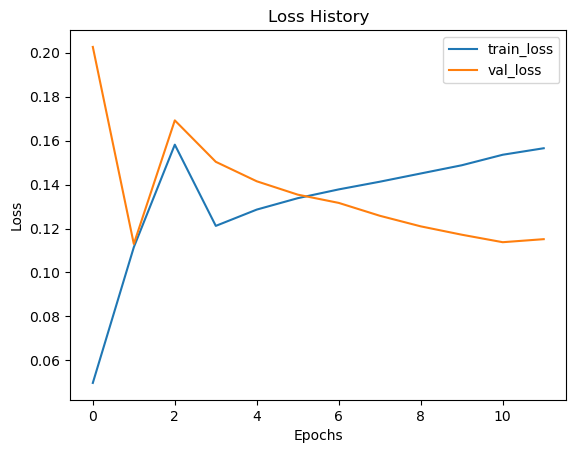

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

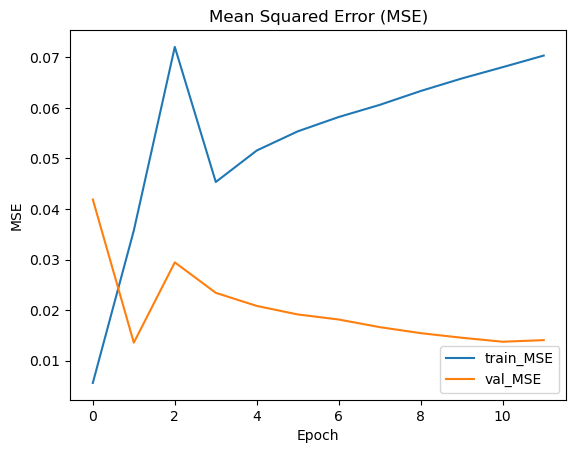

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

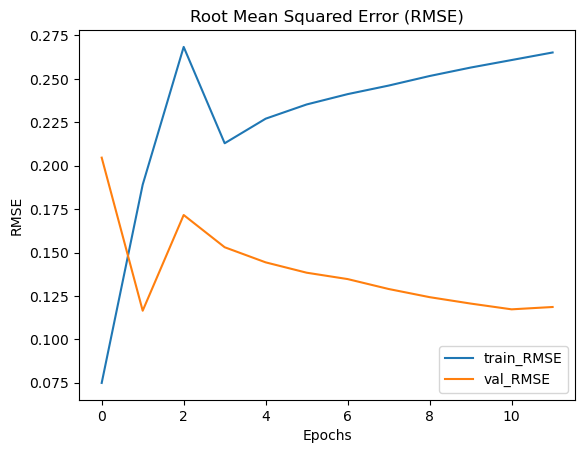

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

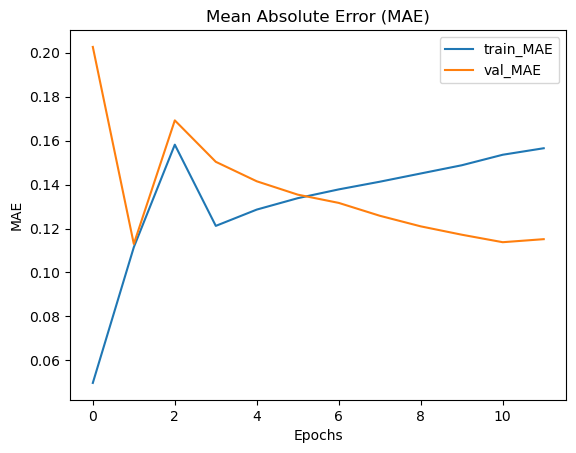

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

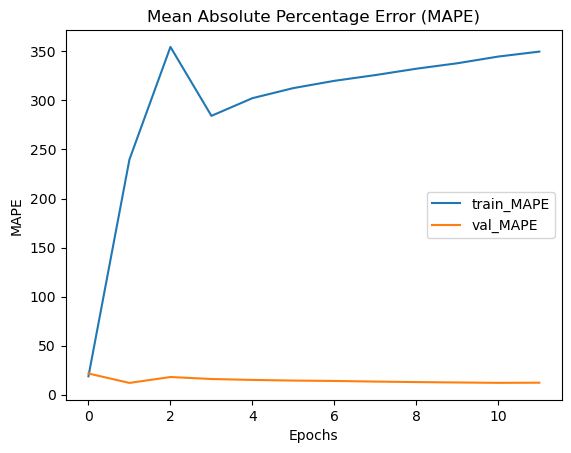

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 23:47:28.331639: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 5)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


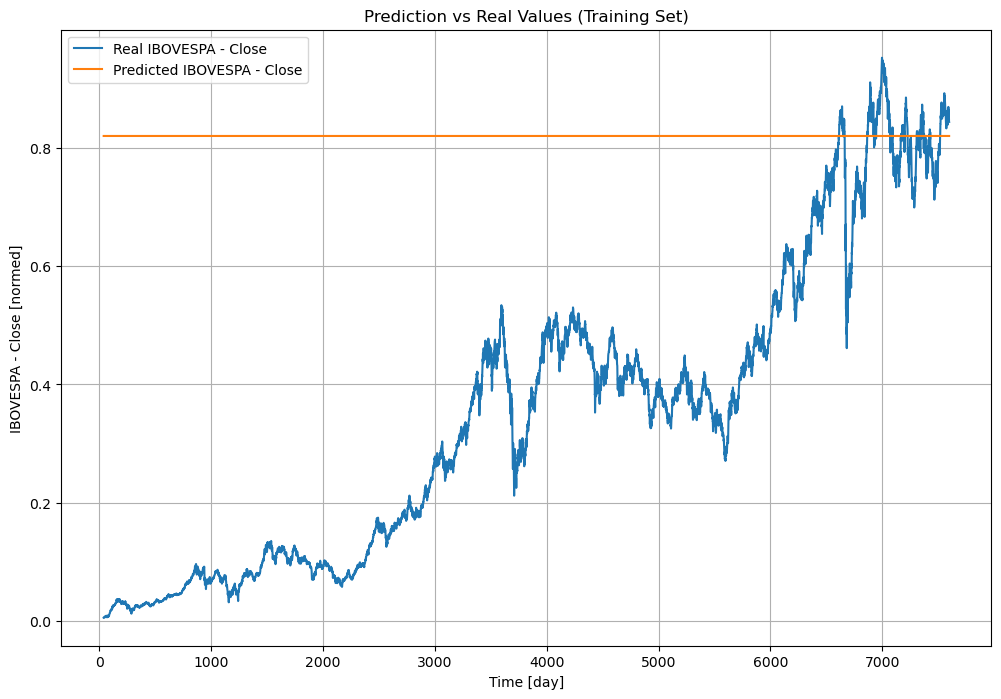

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 5)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


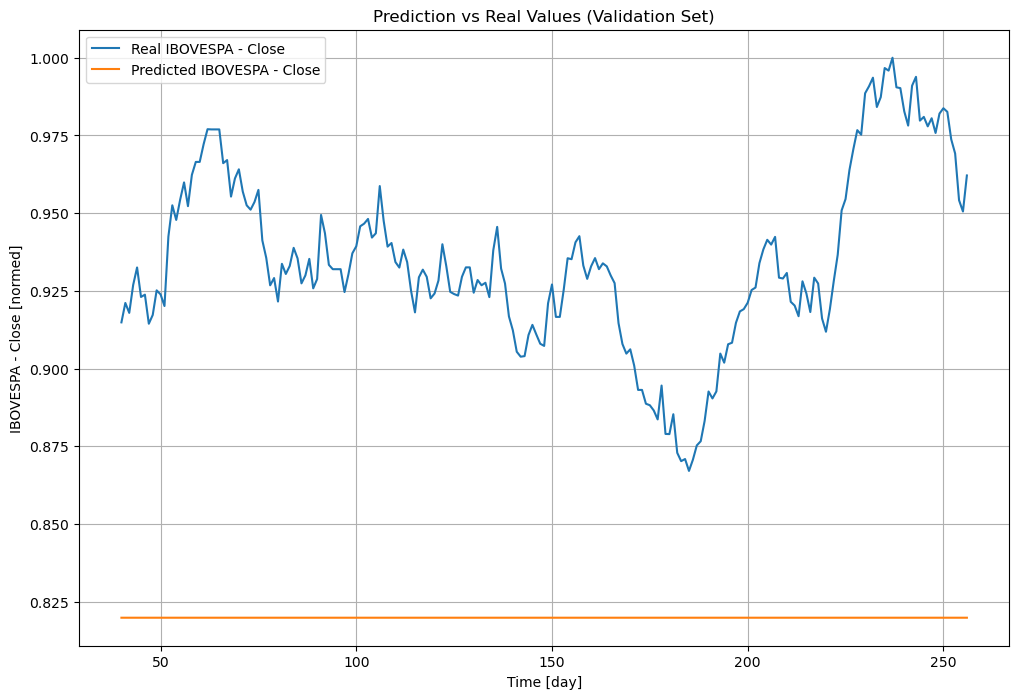

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 5)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


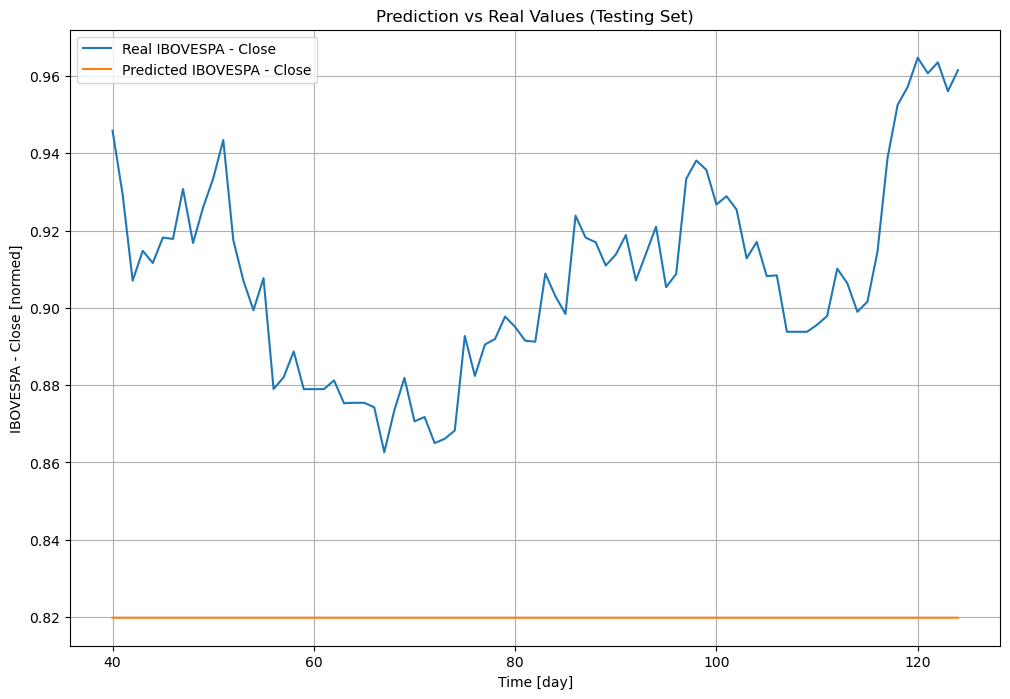

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

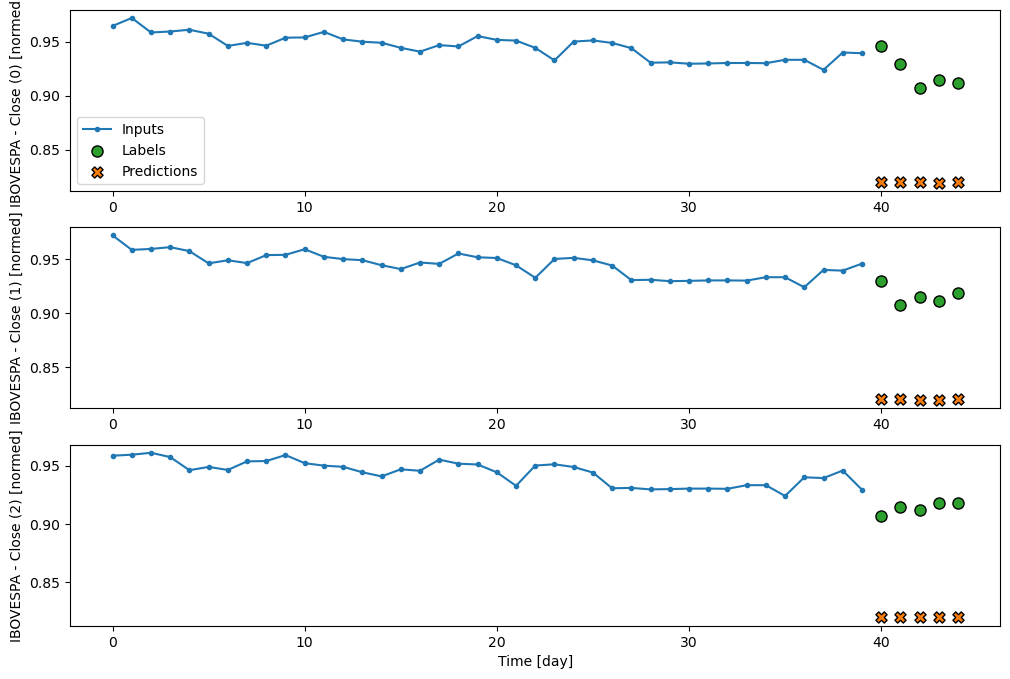

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:48s:751ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step


array([[[0.81984437, 0.81984437, 0.81984437, ..., 0.81984437,
         0.81984437, 0.81984437],
        [0.81988394, 0.81988394, 0.81988394, ..., 0.81988394,
         0.81988394, 0.81988394],
        [0.81948894, 0.81948894, 0.81948894, ..., 0.81948894,
         0.81948894, 0.81948894],
        [0.819258  , 0.819258  , 0.819258  , ..., 0.819258  ,
         0.819258  , 0.819258  ],
        [0.82003707, 0.82003707, 0.82003707, ..., 0.82003707,
         0.82003695, 0.82003695]],

       [[0.81984437, 0.81984437, 0.81984437, ..., 0.81984437,
         0.81984437, 0.81984437],
        [0.81988394, 0.81988394, 0.81988394, ..., 0.81988394,
         0.81988394, 0.81988394],
        [0.81948894, 0.81948894, 0.81948894, ..., 0.81948894,
         0.81948894, 0.81948894],
        [0.819258  , 0.819258  , 0.819258  , ..., 0.819258  ,
         0.819258  , 0.819258  ],
        [0.82003707, 0.82003707, 0.82003707, ..., 0.82003707,
         0.8200369 , 0.8200369 ]],

       [[0.81984437, 0.81984437, 0.8

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')